### Import packages

In [1]:
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import datetime
import matplotlib.dates as mdates
import scipy as scipy
from scipy import stats
import geopandas as gpd
import country_converter as coco
import folium
import plotly.graph_objects as go

### TEST AREA

In [174]:
df = pd.read_parquet(f'2019 - SAF50/20190428-summary.pq', engine = 'pyarrow')
a = [5,6,7,8,9,12,13,15,16,18,19,23,25,26,43]
df.iloc[:,a]


,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing
0,E75L,Jet,KHRL,Valley International Airport,US,US,2019-04-28 00:00:11,0.87,548.35,0.846109,1148.955015,CF34-8E5,32825.401786,2.785061e+14,0.000000e+00
1,A333,Jet,LTFM,İstanbul Airport,TR,SC,2019-04-28 00:00:43,6.72,5782.71,0.848104,34944.473572,CF6-80E1A2,182291.625838,2.489761e+14,-4.626191e+11
2,B789,Jet,MDLR,Casa De Campo International Airport,DO,JM,2019-04-28 00:01:05,1.16,945.18,0.819169,6862.261869,Trent 1000-J3,186805.375735,2.092423e+14,0.000000e+00
3,B738,Jet,ZHCC,Zhengzhou Xinzheng International Airport,CN,CN,2019-04-28 00:00:42,1.41,1102.04,0.815178,3383.600231,CFM56-7B26E,63647.754221,6.314700e+14,0.000000e+00
4,BE9L,Turboprop,,,,,2019-04-28 00:00:09,0.34,136.22,0.822367,80.081083,,3810.305310,5.597885e+14,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108159,B789,Jet,ZUCK,Chongqing Jiangbei International Airport,CN,CN,2019-04-28 23:50:51,1.38,1076.96,0.815178,6689.277890,GEnx-1B74/75/P2,183843.742766,2.573768e+13,0.000000e+00
108160,A333,Jet,ZUUU,Chengdu Shuangliu International Airport,CN,CN,2019-04-28 23:50:32,1.75,1402.78,0.815178,9397.140621,Trent 772,167941.942357,4.014196e+14,0.000000e+00
108161,B738,Jet,ZSHC,Hangzhou Xiaoshan International Airport,CN,CN,2019-04-28 23:56:53,2.05,1576.66,0.815178,5752.929916,CFM56-7B26E,65383.005592,7.169029e+14,0.000000e+00
108162,A320,Jet,ZSXZ,Xuzhou Guanyin International Airport,CN,CN,2019-04-28 23:51:16,1.86,1318.09,0.815178,4664.491632,CFM56-5B4/3,64477.529341,6.904132e+14,0.000000e+00


In [173]:
df.columns

Index(['flight_id', 'callsign', 'icao_address', 'flight_number', 'tail_number',
       'aircraft_type_icao', 'aircraft_engine_type', 'origin_airport',
       'origin_airport_name', 'origin_country', 'destination_airport',
       'destination_airport_name', 'destination_country',
       'first_waypoint_time', 'last_waypoint_time', 'flight_duration_h',
       'total_flight_distance_km', 'n_wypts', 'load_factor', 'total_fuel_burn',
       'mean_overall_propulsion_efficiency', 'bada_model', 'nvpm_data_source',
       'engine_name', 'engine_uid', 'mean_aircraft_mass', 'mean_nvpm_ei_n',
       'mean_sdr_flight_waypoints', 'mean_rsr_flight_waypoints',
       'mean_olr_flight_waypoints', 'total_contrail_length_sac_km',
       'total_persistent_contrail_length_km',
       'first_waypoint_time_initial_persistent',
       'last_waypoint_time_initial_persistent', 'mean_rhi_initial_persistent',
       'std_rhi_initial_persistent',
       'mean_sac_threshold_air_temperature_initial_persistent',
    

In [ ]:
for i in enumerate(range(0,len(apcode))):
    print(i)

### CODE BIN

In [ ]:
longmonth = [1,3,5,7,8,10,12]
shortmonth = [4,6,9,11]
dailysum = []
date = []
monthlysum = []
flights = []
a = 0

for i, month in enumerate(range(1,13)) :
    monthlysum.append(0)
    if month < 10 :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    dailytotal = df['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

                else :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    dailytotal = df['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1
                    
        elif month in shortmonth: 
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    dailytotal = df['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

                else :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    dailytotal = df['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1
        else :
            for j, day in enumerate(range(1,29)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    dailytotal = df['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

                else :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    dailytotal = df['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1
    else :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - Jet-A/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    dailytotal = df['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

                else :
                    df = pd.read_parquet(f'2019 - Jet-A/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    dailytotal = df['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

        else :
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - Jet-A/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    dailytotal = df['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

                else :
                    df = pd.read_parquet(f'2019 - Jet-A/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    dailytotal = df['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1


In [ ]:
longmonth = [1,3,5,7,8,10,12]
shortmonth = [4,6,9,11]
dailysum = []
date = []
monthlysum = []
flights = []
a = 0

for i, month in enumerate(range(1,13)) :
    monthlysum.append(0)
    if month < 10 :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    dfinter = df[df['origin_country'] == 'GB']
                    dailytotal = dfinter['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

                else :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    dfinter = df[df['origin_country'] == 'GB']
                    dailytotal = dfinter['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1
                    
        elif month in shortmonth: 
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    dfinter = df[df['origin_country'] == 'GB']
                    dailytotal = dfinter['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

                else :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    dfinter = df[df['origin_country'] == 'GB']
                    dailytotal = dfinter['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1
        else :
            for j, day in enumerate(range(1,29)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    dfinter = df[df['origin_country'] == 'GB']
                    dailytotal = dfinter['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

                else :
                    df = pd.read_parquet(f'2019 - Jet-A/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    dfinter = df[df['origin_country'] == 'GB']
                    dailytotal = dfinter['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1
    else :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - Jet-A/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    dfinter = df[df['origin_country'] == 'GB']
                    dailytotal = dfinter['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

                else :
                    df = pd.read_parquet(f'2019 - Jet-A/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    dfinter = df[df['origin_country'] == 'GB']
                    dailytotal = dfinter['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

        else :
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - Jet-A/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    dfinter = df[df['origin_country'] == 'GB']
                    dailytotal = dfinter['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1

                else :
                    df = pd.read_parquet(f'2019 - Jet-A/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    dfinter = df[df['origin_country'] == 'GB']
                    dailytotal = dfinter['total_fuel_burn'].sum()
                    dailysum.append(dailytotal)
                    monthlysum[-1] = monthlysum[-1] + dailytotal
                    date.append(datetime.date(2019,month,day))
                    flights.append(len(df.index))
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                    a = a + 1


In [ ]:
dailysum = []

for i in months:
    df = d[i]
    dailytotal = df['total_fuel_burn'].sum()
    dailysum.append(dailytotal)
    

In [ ]:
apcode = []
apname = []


df = d['Jan']
apcode = (list(df['origin_airport'].unique()))
df = d['Feb']
apcode.extend(list(df['origin_airport'].unique()))
set(apcode)

In [ ]:
longmonth = [1,3,5,7,8,10,12]
shortmonth = [4,6,9,11]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
saf50 = {}
a = 0

for i, month in enumerate(range(1,13)):
    flights = pd.DataFrame()
    if month < 10 :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
                    
        elif month in shortmonth: 
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,29)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    else :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF50/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF50/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    flights = flights.reset_index()
    flights = flights.drop(columns = ['index'])
    saf50[months[i]] = flights

In [ ]:
for i in months:
    jetadf = jeta[i]
    countryinter = jetadf[jetadf['origin_country'] == 'GB']
    jeta[i] = countryinter
    SAF50df = saf50[i]
    countryinter = SAF50df[SAF50df['origin_country'] == 'GB']
    saf50[i] = countryinter

# Data Analysis

### Run through files

In [2]:
longmonth = [1,3,5,7,8,10,12]
shortmonth = [4,6,9,11]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
jeta = {}
alljeta = pd.DataFrame()
col = [5,6,7,8,9,12,13,15,16,18,19,23,25,26,43]
a = 0

for i, month in enumerate(range(1,13)):
    jetflights = pd.DataFrame()
    if month < 10 :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    jetdf = pd.read_parquet(f'2019 - Jet-A/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    jetdf = jetdf.iloc[:,col]
                    jetdf = jetdf[jetdf['origin_country'] == 'GB']
                    jetflights = pd.concat([jetflights,jetdf])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    jetdf = pd.read_parquet(f'2019 - Jet-A/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    jetdf = jetdf.iloc[:,col]
                    jetdf = jetdf[jetdf['origin_country'] == 'GB']
                    jetflights = pd.concat([jetflights,jetdf])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
                    
        elif month in shortmonth: 
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    jetdf = pd.read_parquet(f'2019 - Jet-A/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    jetdf = jetdf.iloc[:,col]
                    jetdf = jetdf[jetdf['origin_country'] == 'GB']
                    jetflights = pd.concat([jetflights,jetdf])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    jetdf = pd.read_parquet(f'2019 - Jet-A/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    jetdf = jetdf.iloc[:,col]
                    jetdf = jetdf[jetdf['origin_country'] == 'GB']
                    jetflights = pd.concat([jetflights,jetdf])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,29)) :
                if day < 10 :
                    jetdf = pd.read_parquet(f'2019 - Jet-A/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    jetdf = jetdf.iloc[:,col]
                    jetdf = jetdf[jetdf['origin_country'] == 'GB']
                    jetflights = pd.concat([jetflights,jetdf])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    jetdf = pd.read_parquet(f'2019 - Jet-A/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    jetdf = jetdf.iloc[:,col]
                    jetdf = jetdf[jetdf['origin_country'] == 'GB']
                    jetflights = pd.concat([jetflights,jetdf])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    else :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    jetdf = pd.read_parquet(f'2019 - Jet-A/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    jetdf = jetdf.iloc[:,col]
                    jetdf = jetdf[jetdf['origin_country'] == 'GB']
                    jetflights = pd.concat([jetflights,jetdf])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    jetdf = pd.read_parquet(f'2019 - Jet-A/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    jetdf = jetdf.iloc[:,col]
                    jetdf = jetdf[jetdf['origin_country'] == 'GB']
                    jetflights = pd.concat([jetflights,jetdf])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    jetdf = pd.read_parquet(f'2019 - Jet-A/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    jetdf = jetdf.iloc[:,col]
                    jetdf = jetdf[jetdf['origin_country'] == 'GB']
                    jetflights = pd.concat([jetflights,jetdf])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    jetdf = pd.read_parquet(f'2019 - Jet-A/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    jetdf = jetdf.iloc[:,col]
                    jetdf = jetdf[jetdf['origin_country'] == 'GB']
                    jetflights = pd.concat([jetflights,jetdf])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    jetflights = jetflights.reset_index()
    jetflights = jetflights.drop(columns = ['index'])
    jeta[months[i]] = jetflights
    alljeta = pd.concat([alljeta,jetflights])
alljeta = alljeta.reset_index()
alljeta = alljeta.drop(columns = ['index'])

365/365 Fetching 31/12/2019 data ... 


In [20]:
alljeta['EF/fuel'] = alljeta['total_contrail_energy_forcing']/alljeta['total_fuel_burn']

In [24]:
for i in months:
    jeta[i]['Timestamp'] = pd.to_datetime(jeta[i]['first_waypoint_time']).values.astype(np.int64) // 10 ** 9

In [23]:
sun = pd.read_csv('Sun times.csv')

for i in sun.index:
    datetest = sun['Date'][i] + " " + sun['Sunrise'][i]
    element = datetime.strptime(datetest,'%Y-%m-%d %H:%M')
    sun['Sunrise'][i] = datetime.timestamp(element)
    datetest = sun['Date'][i] + " " + sun['Sunset'][i]
    element = datetime.strptime(datetest,'%Y-%m-%d %H:%M')
    sun['Sunset'][i] = datetime.timestamp(element)
    sun['Date'][i] = datetime.strptime(sun['Date'][i],'%Y-%m-%d')

In [163]:
sun = pd.read_csv('Sun times.csv')

for i in sun.index:
    datetest = sun['Date'][i] + " " + sun['Sunrise'][i]
    element = datetime.strptime(datetest,'%Y-%m-%d %H:%M')
    sun['Sunrise'][i] = element
    datetest = sun['Date'][i] + " " + sun['Sunset'][i]
    element = datetime.strptime(datetest,'%Y-%m-%d %H:%M')
    sun['Sunset'][i] = element
    sun['Date'][i] = datetime.strptime(sun['Date'][i],'%Y-%m-%d')
sun

,Date,Sunrise,Sunset,Daytime
0,2019-01-01 00:00:00,2019-01-01 08:06:00,2019-01-01 16:01:00,07:54
1,2019-01-02 00:00:00,2019-01-02 08:06:00,2019-01-02 16:02:00,07:55
2,2019-01-03 00:00:00,2019-01-03 08:06:00,2019-01-03 16:03:00,07:56
3,2019-01-04 00:00:00,2019-01-04 08:06:00,2019-01-04 16:04:00,07:58
4,2019-01-05 00:00:00,2019-01-05 08:06:00,2019-01-05 16:05:00,07:59
...,...,...,...,...
361,2019-12-28 00:00:00,2019-12-28 08:06:00,2019-12-28 15:57:00,07:50
362,2019-12-29 00:00:00,2019-12-29 08:06:00,2019-12-29 15:58:00,07:51
363,2019-12-30 00:00:00,2019-12-30 08:06:00,2019-12-30 15:59:00,07:52
364,2019-12-31 00:00:00,2019-12-31 08:06:00,2019-12-31 15:59:00,07:53


In [ ]:
sun = pd.read_csv('Sun times.csv')

In [924]:
jetadaily = alljeta.copy()
jetadaily = jetadaily.set_index(jetadaily['first_waypoint_time'].values)
count = jetadaily.resample('D').count()
mean = jetadaily.resample('D').mean()
jetadaily = jetadaily.resample('D', label = 'left').sum()
jetadaily['No. flights'] = count['aircraft_type_icao'].values
jetadaily['EF/fuel'] = mean['EF/fuel'].values
jetadaily

,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel,No. flights
2019-01-01,5747.80,4613049.06,1678.963475,2.678531e+07,1.853941e+08,3.250155e+18,3.928667e+16,7.767027e+08,2036
2019-01-02,6631.33,5218764.18,1996.629245,2.974489e+07,2.086981e+08,3.714767e+18,1.333943e+17,1.337321e+09,2422
2019-01-03,7016.93,5446013.93,2129.489818,3.116436e+07,2.198132e+08,3.904149e+18,2.014981e+17,3.336738e+09,2584
2019-01-04,6771.39,5187736.74,2132.097468,2.904350e+07,2.128211e+08,3.891622e+18,2.898327e+17,1.309221e+10,2588
2019-01-05,6565.81,5189857.95,1825.039284,2.996309e+07,1.999456e+08,3.384995e+18,1.162011e+17,2.618229e+09,2216
...,...,...,...,...,...,...,...,...,...
2019-12-27,6791.04,5257622.03,2247.765198,2.886765e+07,2.187637e+08,4.028010e+18,2.801305e+17,1.015641e+10,2662
2019-12-28,6615.28,5199281.83,2024.817558,2.901856e+07,2.070359e+08,3.659847e+18,3.071915e+17,1.773332e+10,2399
2019-12-29,6550.86,5077478.59,2120.965485,2.817243e+07,2.115727e+08,3.746782e+18,2.072367e+17,9.778405e+09,2514
2019-12-30,6339.81,4881797.83,2121.737056,2.681506e+07,2.065971e+08,3.636219e+18,1.502902e+17,2.507309e+09,2516


In [925]:
jetamonthly = alljeta.copy()
jetamonthly = jetamonthly.set_index(jetamonthly['first_waypoint_time'].values)
count = jetamonthly.resample('M').count()
mean = jetadaily.resample('M').mean()
jetamonthly = jetamonthly.resample('M', label = 'right').sum()
jetamonthly['No. flights'] = count['aircraft_type_icao'].values
jetamonthly['EF/fuel'] = mean['EF/fuel'].values
jetamonthly

,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel,No. flights
2019-01-31,195586.78,1.543361e+08,57991.083797,9.024994e+08,6.216130e+09,1.098540e+20,6.729758e+18,8.789049e+09,70439
2019-02-28,183564.28,1.429599e+08,56864.784451,8.244741e+08,5.807151e+09,1.060749e+20,5.932153e+18,9.743082e+09,68400
2019-03-31,209276.11,1.629247e+08,67170.638904,9.321861e+08,6.625685e+09,1.209887e+20,5.279200e+18,7.399370e+09,79692
2019-04-30,227767.29,1.751906e+08,76153.521957,9.629505e+08,7.114560e+09,1.333754e+20,2.736977e+18,2.540993e+09,89507
2019-05-31,246426.74,1.929914e+08,77173.688436,1.037324e+09,7.591532e+09,1.390107e+20,3.268986e+18,3.678566e+09,91187
2019-06-30,251953.95,1.936441e+08,80010.027872,1.040895e+09,7.591027e+09,1.402701e+20,2.512626e+18,2.687202e+09,92080
2019-07-31,260658.46,2.041462e+08,85221.662647,1.096219e+09,8.000903e+09,1.454602e+20,2.738179e+18,3.000242e+09,96591
2019-08-31,277903.54,2.196459e+08,84920.534987,1.215674e+09,8.488949e+09,1.429399e+20,3.202698e+18,3.367523e+09,96679
2019-09-30,266896.63,2.062668e+08,93715.370513,1.059525e+09,8.173519e+09,1.556257e+20,4.324326e+18,4.368027e+09,110349
2019-10-31,251261.06,1.924527e+08,89134.388462,1.007680e+09,7.859117e+09,1.518345e+20,6.175390e+18,7.450395e+09,105574


### Fuel Demand

##### Total demand

In [126]:
totalfuel = alljeta['total_fuel_burn'].sum()

##### Daily fuel demand

In [127]:
dailysum = []

for i in range(0,365):
    lb = sun['Date'][i]
    ub = sun['Date'][i+1]
    inter = alljeta.loc[alljeta['first_waypoint_time'] > lb]
    daydata = inter.loc[inter['first_waypoint_time'] < ub]
    dailyfuel = daydata['total_fuel_burn'].sum()
    dailysum.append(dailyfuel)

In [128]:
dailydf = pd.DataFrame(dailysum, index = sun['Date'][0:365], columns = ['Daily fuel consumption'])
dailydf.sort_values(by = ['Daily fuel consumption'], ascending = False)[0:20]

,Daily fuel consumption
Date,
2019-09-05,4.368458e+07
2019-10-05,4.335198e+07
2019-09-01,4.312041e+07
2019-09-07,4.290936e+07
2019-09-06,4.290124e+07
2019-09-08,4.222694e+07
2019-09-02,4.219680e+07
2019-08-16,4.202864e+07
2019-08-12,4.198354e+07


In [ ]:
plt.plot(date,dailysum)
plt.title("Daily UK Fuel consumption 2019")
plt.xlabel("Date")
plt.ylabel("Fuel consumption (kg)")

##### Monthly total demand

<BarContainer object of 12 artists>

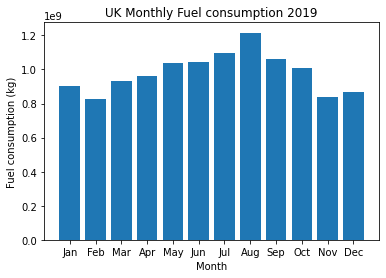

In [129]:
monthlysum = []

for i in months:
    df = jeta[i]
    monthlysum.append(df['total_fuel_burn'].sum())

monthnum = range(12)
plt.title("UK Monthly Fuel consumption 2019")
plt.xlabel("Month")
plt.ylabel("Fuel consumption (kg)")
plt.xticks(monthnum, months)
plt.bar(monthnum, monthlysum)

##### UK monthly demand

In [130]:
monthlysum = []

for i in months:
    df = jeta[i]
    monthlysum.append(df['total_fuel_burn'].sum())

monthlysum

[902499403.9087441,
 824474120.2419477,
 932186136.4951882,
 962950491.1830955,
 1037323739.2724802,
 1040894934.7783232,
 1096218566.1811578,
 1215674056.0013986,
 1059524704.697216,
 1007680038.0753632,
 841010706.2444075,
 866045704.8432792]

<BarContainer object of 12 artists>

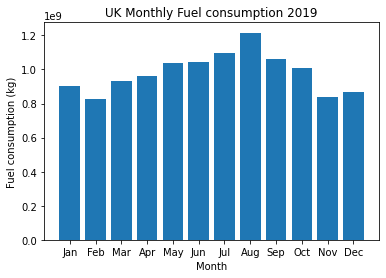

In [131]:
monthnum = range(12)
plt.title("UK Monthly Fuel consumption 2019")
plt.xlabel("Month")
plt.ylabel("Fuel consumption (kg)")
plt.xticks(monthnum, months)
plt.bar(monthnum, monthlysum)

In [947]:
jetamonthly['No. flights'].mean()

89031.5

<BarContainer object of 12 artists>

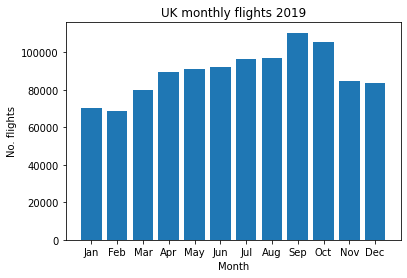

In [945]:
monthnum = range(12)
plt.title("UK monthly flights 2019")
plt.xlabel("Month")
plt.ylabel("No. flights")
plt.xticks(monthnum, months)
plt.bar(monthnum, jetamonthly['No. flights'])

##### Demand by airports

In [103]:
apcode = []
apname = []

for m in months:
    df = jeta[m]
    apcodeinter = list(df['origin_airport'].unique())
    apnameinter = list(df['origin_airport_name'].unique())
    for i in apcodeinter:
        if i not in apcode:
            apcode.append(i)
    for j in apnameinter:
        if j not in apname:
            apname.append(j)

aps = pd.DataFrame(apcode, index = apname, columns = ['Airport Code'])
#aps # Airport names

In [104]:
afd = {}
noflights = {}
afdist = {}
annoflights = {}
amass = {}

for i in apcode:
    afd[i] = []
    noflights[i] = []
    afdist[i] = []
    annoflights[i] = []
    amass[i] = []

for j in months:
    df  = jeta[j]
    for i in apcode:
        b = df[df['origin_airport'] == i]
        afd[i].append(b['total_fuel_burn'].sum())
        noflights[i].append(len(b.index))
        afdist[i].append(b['total_flight_distance_km'].sum())
        amass[i].append(b['mean_aircraft_mass'].sum())
    
#afd # Monthly airport fuel demand  
#noflights # number of flights per airport
#afdist # airport total flight distance   
#amass # airport total mass

In [105]:
for i in apcode:
    annoflights[i] = sum(noflights[i]) 
    
#annoflights #annual number of flights
aps['No. flights'] = annoflights.values()

In [ ]:
sum(annoflights.values())

In [460]:
alljeta

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.000000e+00


In [463]:
aefpf = {}

for i in apcode:
    b = df[df['origin_airport'] == i]
    aefpf[i] = b['EF/fuel'].mean()

aps['EF/fuel'] = aefpf.values()
aps

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,2.656712e+10
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,2.240668e+10
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,1.646906e+10
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,4.920888e+10
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,6.502078e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAF Shawbury,EGOS,4,8.218747e+02,0.000000e+00,0,0.000000e+00,NaN,0.000000e+00,0,0.000000e+00,NaN,0.000000,NaN
Fairoaks Airport,EGTF,2,4.314357e+02,0.000000e+00,0,0.000000e+00,NaN,0.000000e+00,0,0.000000e+00,NaN,0.000000,NaN
RAF Marham,EGYM,15,3.613719e+03,0.000000e+00,0,0.000000e+00,NaN,0.000000e+00,0,0.000000e+00,NaN,0.000000,NaN
Bicester Airfield,EGDD,1,5.690870e+03,0.000000e+00,0,0.000000e+00,NaN,4.794079e+13,1,5.690870e+03,8.424158e+09,100.000000,NaN


In [1147]:
af = aps.copy()
af.sort_values(by=['No. flights'], inplace = True, ascending=True)
aftop10 = af.tail(10)
aftop10

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10,11.123259,4.276552e+09,6.085028e+10,6.691964
London City Airport,EGLC,31585,6.752292e+07,5.070162e+16,348,1.126197e+06,1.456943e+14,1.095711e+17,2092,5.309836e+06,2.108178e+10,6.623397,1.370084e+09,5.166048e+10,1.101789
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,3.292883e+09,4.643022e+10,7.254897
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10,7.966643
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10,11.867102,4.247587e+09,5.439489e+10,7.338070
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10,10.733075
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127


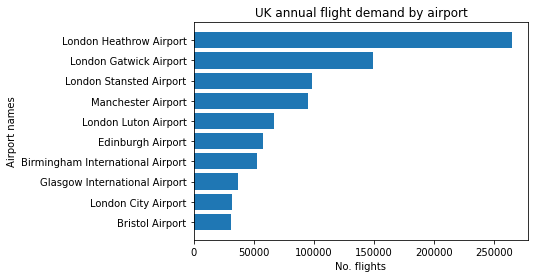

In [1148]:
plt.barh(aftop10.index,aftop10['No. flights'])
plt.title('UK annual flight demand by airport')
plt.ylabel('Airport names')
plt.xlabel('No. flights')
plt.show()

In [ ]:
monthnum = range(12)
plt.title("Heathrow airport Monthly Fuel consumption 2019")
plt.xlabel("Month")
plt.ylabel("Fuel consumption (kg)")
plt.xticks(monthnum, months)
plt.bar(monthnum, afd['EGLL'])

In [ ]:
monthnum = range(12)
plt.title("Gatwick airport Monthly Fuel consumption 2019")
plt.xlabel("Month")
plt.ylabel("Fuel consumption (kg)")
plt.xticks(monthnum, months)
plt.bar(monthnum, afd['EGKK'])

In [ ]:
monthnum = range(12)
plt.title("Stansted airport Monthly Fuel consumption 2019")
plt.xlabel("Month")
plt.ylabel("Fuel consumption (kg)")
plt.xticks(monthnum, months)
plt.bar(monthnum, afd['EGSS'])

##### Demand by destination

In [439]:
dname = list(alljeta['destination_country'].unique())
dname = list(filter(None, dname))
dnamed = pd.DataFrame(index = dname)

dnamenoflights = []

for i in dname:
    df = alljeta[alljeta['destination_country'] == i]
    dnamed.loc[i,'No. flights'] = len(df.index)
    dnamed.loc[i,'Annual fuel demand'] = df['total_fuel_burn'].sum()
    dnamed.loc[i,'Annual EF'] = df['total_contrail_energy_forcing'].sum()
    dnamed.loc[i,'EF/fuel'] = df['EF/fuel'].mean()

In [1061]:
dd = dnamed.copy()
dd.sort_values(by=['Annual fuel demand'], inplace = True, ascending=False)
dd.head(10)

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),ISO3
US,61420.0,3.383175e+09,1.364965e+19,4.082188e+09,23843.0,1.438041e+09,1.442720e+19,1.103035e+10,13805.0,7.886830e+08,1.244490e+19,1.676974e+10,22.476392,USA
ES,136328.0,8.319381e+08,4.841423e+18,6.246212e+09,16320.0,1.102189e+08,5.323729e+18,5.534284e+10,23274.0,1.467982e+08,5.673500e+18,4.184335e+10,17.072061,ESP
AE,12050.0,7.093414e+08,1.371235e+18,2.128364e+09,3018.0,1.779366e+08,1.336331e+18,8.263201e+09,1467.0,8.050813e+07,1.048430e+18,1.381990e+10,12.174274,ARE
SG,3159.0,4.155193e+08,1.351607e+18,3.323037e+09,2039.0,2.698398e+08,1.360206e+18,5.176423e+09,656.0,8.418039e+07,9.027646e+17,1.076383e+10,20.766065,SGP
CA,8766.0,3.762316e+08,1.022493e+18,2.715074e+09,2195.0,1.083048e+08,1.080178e+18,1.161376e+10,1309.0,5.915351e+07,9.227679e+17,1.729345e+10,14.932695,CAN
HK,3928.0,3.390291e+08,2.008648e+18,5.837906e+09,2556.0,2.292082e+08,2.015337e+18,8.988332e+09,1456.0,1.294806e+08,1.727301e+18,1.358027e+10,37.067210,HKG
IN,6116.0,2.978504e+08,1.058412e+18,3.231562e+09,1906.0,1.065365e+08,1.037658e+18,1.008000e+10,1118.0,6.164613e+07,8.945963e+17,1.493496e+10,18.279922,IND
CN,4679.0,2.906797e+08,1.880203e+18,6.409309e+09,2405.0,1.581176e+08,1.894568e+18,1.254082e+10,1505.0,9.652701e+07,1.697485e+18,1.811506e+10,32.164993,CHN
GB,183696.0,2.805953e+08,9.549837e+17,2.385907e+09,3846.0,8.931125e+06,8.286614e+17,9.560715e+10,10894.0,2.339659e+07,1.075946e+18,4.540592e+10,5.930450,GBR
ZA,3031.0,2.572994e+08,1.004180e+18,4.424414e+09,2013.0,1.672832e+08,9.902525e+17,6.556014e+09,862.0,6.495878e+07,7.023487e+17,1.137879e+10,28.439459,ZAF


In [1065]:
ddtop10 = dd.head(10)
alljeta['total_contrail_energy_forcing'].sum()

5.796171085789673e+19

In [1070]:
3383175000/11786482601 

0.28703856057217286

In [1066]:
dnamed['Annual EF'].sum()-ddtop10['Annual EF'].sum()

2.7631973803419464e+19

In [1054]:
dflights = dnamed.copy()
dflights.sort_values(by=['No. flights'], inplace = True, ascending=False)
dflights.head(10)

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),ISO3
GB,183696.0,2.805953e+08,9.549837e+17,2.385907e+09,3846.0,8.931125e+06,8.286614e+17,9.560715e+10,10894.0,2.339659e+07,1.075946e+18,4.540592e+10,5.930450,GBR
ES,136328.0,8.319381e+08,4.841423e+18,6.246212e+09,16320.0,1.102189e+08,5.323729e+18,5.534284e+10,23274.0,1.467982e+08,5.673500e+18,4.184335e+10,17.072061,ESP
DE,65804.0,1.881998e+08,1.439363e+18,7.547695e+09,4737.0,1.525641e+07,1.376599e+18,9.882930e+10,9586.0,2.859485e+07,1.565657e+18,5.666805e+10,14.567503,DEU
US,61420.0,3.383175e+09,1.364965e+19,4.082188e+09,23843.0,1.438041e+09,1.442720e+19,1.103035e+10,13805.0,7.886830e+08,1.244490e+19,1.676974e+10,22.476392,USA
IT,56357.0,2.367983e+08,1.752259e+18,7.534472e+09,5364.0,2.345014e+07,1.729823e+18,7.745404e+10,9310.0,3.934684e+07,1.908525e+18,4.963136e+10,16.519687,ITA
IE,55497.0,9.676532e+07,2.355516e+17,1.866948e+09,1052.0,2.507361e+06,1.758263e+17,7.184702e+10,3340.0,7.594764e+06,2.566261e+17,3.386603e+10,6.018343,IRL
FR,55424.0,1.453544e+08,6.549809e+17,3.799873e+09,2452.0,8.191194e+06,6.619189e+17,8.461446e+10,4998.0,1.560010e+07,7.613632e+17,4.892831e+10,9.017754,FRA
NL,43760.0,7.647102e+07,6.857112e+16,7.668762e+08,280.0,6.911344e+05,4.464178e+16,7.092636e+10,1519.0,3.125600e+06,8.326805e+16,2.663792e+10,3.471207,NLD
PT,28850.0,1.641782e+08,1.302321e+18,7.966225e+09,3804.0,2.254961e+07,1.390429e+18,6.370210e+10,5253.0,3.050804e+07,1.465599e+18,4.882112e+10,18.207972,PRT
CH,26305.0,7.300307e+07,5.080887e+17,6.965593e+09,1813.0,5.375495e+06,4.779147e+17,9.370185e+10,3916.0,1.113094e+07,5.605816e+17,5.159334e+10,14.886904,CHE


In [216]:
dnameef= dnamed.copy()
dnameef.sort_values(by=['Annual EF'], inplace = True, ascending=False)
dnameef.head(10)

,No. flights,Annual fuel demand,Annual EF
US,61420,3.383175e+09,1.364965e+19
ES,136328,8.319381e+08,4.841423e+18
TR,18767,1.894537e+08,2.376106e+18
HK,3928,3.390291e+08,2.008648e+18
CN,4679,2.906797e+08,1.880203e+18
IT,56357,2.367983e+08,1.752259e+18
PL,24468,1.098279e+08,1.589122e+18
DE,65804,1.881998e+08,1.439363e+18
RO,9682,6.196058e+07,1.405638e+18
AE,12050,7.093414e+08,1.371235e+18


In [1079]:
dnamed.sort_values(by=['EF/fuel'], inplace = False, ascending=False).head(20)


,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),ISO3
KY,5.0,7.159954e+04,6.886899e+15,9.300309e+10,2.0,2.958808e+04,6.886928e+15,2.325087e+11,2.0,2.958808e+04,6.886928e+15,2.325087e+11,40.000000,CYM
AL,630.0,3.680120e+06,1.113374e+17,3.008203e+10,195.0,1.154330e+06,1.148244e+17,1.003006e+11,236.0,1.390341e+06,1.169829e+17,8.447352e+10,37.460317,ALB
RU,4704.0,4.040189e+07,1.057921e+18,2.831490e+10,1579.0,1.414333e+07,1.072956e+18,8.497773e+10,1784.0,1.527410e+07,1.083470e+18,7.641165e+10,37.925170,RUS
VG,3.0,3.352961e+04,7.594657e+14,2.553817e+10,1.0,9.930785e+03,7.678840e+14,7.732359e+10,1.0,9.930785e+03,7.678840e+14,7.732359e+10,33.333333,VGB
LB,1154.0,1.597024e+07,3.306002e+17,2.531333e+10,459.0,5.611611e+06,3.276510e+17,6.311838e+10,463.0,5.530402e+06,3.275694e+17,6.268444e+10,40.121317,LBN
JO,782.0,1.201343e+07,2.380079e+17,2.429480e+10,236.0,2.975250e+06,2.356652e+17,7.979860e+10,241.0,3.021021e+06,2.359587e+17,7.828283e+10,30.818414,JOR
MD,587.0,3.871094e+06,8.835604e+16,2.296514e+10,193.0,1.293925e+06,8.931469e+16,7.068236e+10,226.0,1.508406e+06,9.119023e+16,6.164096e+10,38.500852,MDA
RO,9682.0,6.196058e+07,1.405638e+18,2.261110e+10,2568.0,1.678364e+07,1.410204e+18,8.551760e+10,3170.0,2.059094e+07,1.443519e+18,7.096450e+10,32.741169,ROU
GD,2.0,2.296936e+04,4.252050e+14,2.015516e+10,1.0,1.038012e+04,3.865732e+14,3.724168e+10,1.0,1.038012e+04,3.865732e+14,3.724168e+10,50.000000,GRD
CW,1.0,4.801227e+04,9.495953e+14,1.977818e+10,1.0,4.801227e+04,9.495953e+14,1.977818e+10,1.0,4.801227e+04,9.495953e+14,1.977818e+10,100.000000,CUW


In [768]:
diso3 = coco. CountryConverter().pandas_convert(series = pd.Series(dname), to='ISO3')
dnamed['ISO3'] = diso3.values

In [1040]:
fig = go.Figure(data=go.Choropleth(
    locations = dnamed['ISO3'],
    z = dnamed[dnamed['No. flights'] > 000]['No. flights'],
    text = dnamed['ISO3'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_ticksuffix = 'J',
    colorbar_title = 'No. flights',
))

fig.update_layout(
    title_text='2019 flights departing UK',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [1043]:
fig = go.Figure(data=go.Choropleth(
    locations = dnamed['ISO3'],
    z = dnamed[dnamed['No. flights'] > 000]['Annual EF'],
    text = dnamed['ISO3'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = 'J',
    colorbar_title = 'Energy forcing (J)',
))

fig.update_layout(
    title_text='2019 flights departing UK',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [1071]:
fig = go.Figure(data=go.Choropleth(
    locations = dnamed['ISO3'],
    z = dnamed[dnamed['No. flights'] > 000]['Annual fuel demand'],
    text = dnamed['ISO3'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = 'kg',
    colorbar_title = 'Fuel demand (kg)',
))

fig.update_layout(
    title_text='2019 flights departing UK',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [1073]:
fig = go.Figure(data=go.Choropleth(
    locations = dnamed['ISO3'],
    z = dnamed[dnamed['No. flights'] > 000]['EF/fuel'],
    text = dnamed['ISO3'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = 'J/kg',
    colorbar_title = 'Average EF/fuel (J/kg)',
))

fig.update_layout(
    title_text='2019 flights Average EF/fuel',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [942]:
dnamed1000 = dnamed[dnamed['No. flights'] > 1000]

In [1075]:
fig = go.Figure(data=go.Choropleth(
    locations = dnamed1000['ISO3'],
    z = dnamed1000['EF/fuel'],
    text = dnamed1000['ISO3'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = 'J/kg',
    colorbar_title = 'Average EF/fuel (J/kg)',
))

fig.update_layout(
    title_text='2019 flights (min. 1000 flights)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

##### Annual demand of airports

In [1140]:
adinter = {}

for i in apcode:
    adinter[i] = np.sum(afd[i])

aps['Annual fuel demand'] = adinter.values()
ad = aps.copy()
ad.sort_values(by=['Annual fuel demand'], inplace = True, ascending=True)
adtop10 = ad.tail(10)
adtop10['Annual fuel demand']

East Midlands Airport               1.280745e+08
Bristol Airport                     1.291653e+08
Glasgow International Airport       1.944832e+08
Edinburgh Airport                   2.622328e+08
London Luton Airport                3.119234e+08
Birmingham International Airport    3.319361e+08
London Stansted Airport             5.226892e+08
Manchester Airport                  9.657645e+08
London Gatwick Airport              1.554880e+09
London Heathrow Airport             6.780925e+09
Name: Annual fuel demand, dtype: float64

In [1141]:
annualsum = ad['Annual fuel demand'].sum()
adinter['EGLL']/annualsum

0.5753137269367791

In [1142]:
adinter['EGMC']/adinter['EGLL']

0.004045892132246637

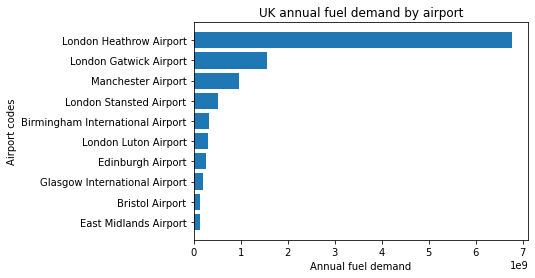

In [1143]:
plt.barh(adtop10.index,adtop10['Annual fuel demand'])
plt.title('UK annual fuel demand by airport')
plt.ylabel('Airport codes')
plt.xlabel('Annual fuel demand')
plt.show()

### No. of flights

In [922]:
jetadaily

,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel,No. flights
2019-01-01,5747.80,4613049.06,1678.963475,2.678531e+07,1.853941e+08,3.250155e+18,3.928667e+16,1.581367e+12,2036
2019-01-02,6631.33,5218764.18,1996.629245,2.974489e+07,2.086981e+08,3.714767e+18,1.333943e+17,3.238991e+12,2422
2019-01-03,7016.93,5446013.93,2129.489818,3.116436e+07,2.198132e+08,3.904149e+18,2.014981e+17,8.622132e+12,2584
2019-01-04,6771.39,5187736.74,2132.097468,2.904350e+07,2.128211e+08,3.891622e+18,2.898327e+17,3.388264e+13,2588
2019-01-05,6565.81,5189857.95,1825.039284,2.996309e+07,1.999456e+08,3.384995e+18,1.162011e+17,5.801995e+12,2216
...,...,...,...,...,...,...,...,...,...
2019-12-27,6791.04,5257622.03,2247.765198,2.886765e+07,2.187637e+08,4.028010e+18,2.801305e+17,2.703637e+13,2662
2019-12-28,6615.28,5199281.83,2024.817558,2.901856e+07,2.070359e+08,3.659847e+18,3.071915e+17,4.254225e+13,2399
2019-12-29,6550.86,5077478.59,2120.965485,2.817243e+07,2.115727e+08,3.746782e+18,2.072367e+17,2.458291e+13,2514
2019-12-30,6339.81,4881797.83,2121.737056,2.681506e+07,2.065971e+08,3.636219e+18,1.502902e+17,6.308390e+12,2516


Text(0, 0.5, 'No. flights')

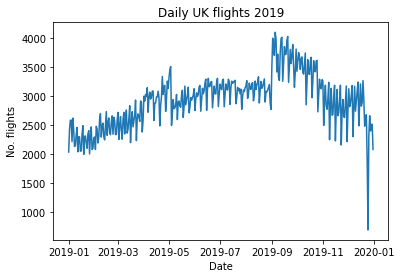

In [923]:
plt.plot(jetadaily.index,jetadaily['No. flights'])
plt.title("Daily UK flights 2019")
plt.xlabel("Date")
plt.ylabel("No. flights")

### Length of flight

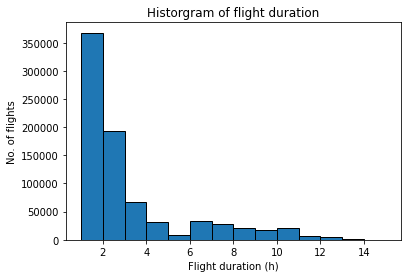

[3.67658e+05 1.92424e+05 6.79830e+04 3.21130e+04 9.16600e+03 3.41440e+04
 2.78420e+04 2.16660e+04 1.69600e+04 2.03280e+04 7.48600e+03 4.71800e+03
 1.43800e+03 1.83000e+02]


In [9]:
flightperd, bins, patches = plt.hist(alljeta['flight_duration_h'], bins=range(1,16), edgecolor="black")
plt.xlabel('Flight duration (h)')
plt.ylabel('No. of flights')
plt.title('Historgram of flight duration')
plt.show()
print(flightperd)

### Airport distance per flight

In [83]:
afdistinter = {}

for i in apcode:
    afdistinter[i] = np.sum(afdist[i])

aps['Total flight distance'] = afdistinter.values()

In [ ]:
avdist = aps.copy()
avdist['Distance per flight'] = aps['Total flight distance']/aps['No. flights']
avdist.sort_values(by=['Distance per flight'], inplace = True, ascending=True)
avdisttop10 = avdist.tail(15)

In [ ]:
plt.barh(avdisttop10.index,avdisttop10['Distance per flight'])
plt.title('UK distance per flight by airport')
plt.ylabel('Airport codes')
plt.xlabel('Distance per flight (km)')
plt.show()

In [ ]:
avdist = aps.copy()
avdist = avdist[avdist['No. flights'] >= 10000]
avdist['Distance per flight'] = aps['Total flight distance']/aps['No. flights']
avdist.sort_values(by=['Distance per flight'], inplace = True, ascending=True)
avdisttop10 = avdist.tail(10)

In [ ]:
plt.barh(avdisttop10.index,avdisttop10['Distance per flight'])
plt.title('UK distance per flight by airport')
plt.ylabel('Airport codes')
plt.xlabel('Distance per flight (km)')
plt.show()

### Relative fuel burn

In [84]:
amassinter = {}

for i in apcode:
    amassinter[i] = np.sum(amass[i])

aps['Total mass travelled'] = amassinter.values()

In [ ]:
aps['Fuel per mass (kgkg-1)'] = aps['Annual fuel demand']/aps['Total mass travelled']
rf = aps.copy()
rf = rf[rf['No. flights'] >= 10000]
rf.sort_values(by=['Fuel per mass (kgkg-1)'], inplace = True, ascending=True)
rftop10 = rf.tail(10)

In [ ]:
plt.barh(rftop10.index,rftop10['Fuel per mass (kgkg-1)'])
plt.title('UK annual relative fuel demand by airport')
plt.ylabel('Airport codes')
plt.xlabel('Annual relative fuel demand (kgkg-1)')
plt.show()

### Energy forcing

In [911]:
alljeta['total_contrail_energy_forcing'].sum()

5.796171085789673e+19

##### Daily energy forcing

In [918]:
jetadaily

,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel,No. flights
2019-01-01,5747.80,4613049.06,1678.963475,2.678531e+07,1.853941e+08,3.250155e+18,3.928667e+16,1.581367e+12,2036
2019-01-02,6631.33,5218764.18,1996.629245,2.974489e+07,2.086981e+08,3.714767e+18,1.333943e+17,3.238991e+12,2422
2019-01-03,7016.93,5446013.93,2129.489818,3.116436e+07,2.198132e+08,3.904149e+18,2.014981e+17,8.622132e+12,2584
2019-01-04,6771.39,5187736.74,2132.097468,2.904350e+07,2.128211e+08,3.891622e+18,2.898327e+17,3.388264e+13,2588
2019-01-05,6565.81,5189857.95,1825.039284,2.996309e+07,1.999456e+08,3.384995e+18,1.162011e+17,5.801995e+12,2216
...,...,...,...,...,...,...,...,...,...
2019-12-27,6791.04,5257622.03,2247.765198,2.886765e+07,2.187637e+08,4.028010e+18,2.801305e+17,2.703637e+13,2662
2019-12-28,6615.28,5199281.83,2024.817558,2.901856e+07,2.070359e+08,3.659847e+18,3.071915e+17,4.254225e+13,2399
2019-12-29,6550.86,5077478.59,2120.965485,2.817243e+07,2.115727e+08,3.746782e+18,2.072367e+17,2.458291e+13,2514
2019-12-30,6339.81,4881797.83,2121.737056,2.681506e+07,2.065971e+08,3.636219e+18,1.502902e+17,6.308390e+12,2516


Text(0, 0.5, 'Energy forcing (J)')

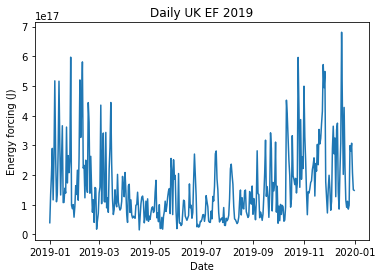

In [921]:
plt.plot(jetadaily.index,jetadaily['total_contrail_energy_forcing'])
plt.title("Daily UK EF 2019")
plt.xlabel("Date")
plt.ylabel("Energy forcing (J)")

##### Monthly energy forcing

In [149]:
monthlyef = []

for i in months:
    df = jeta[i]
    monthlyef.append(df['total_contrail_energy_forcing'].sum())

In [ ]:
plt.bar(months,monthlyef)
plt.xlabel('Month')
plt.title('UK Monthly net energy forcing')
plt.ylabel('Net Energy forcing (J)')
plt.show()

In [ ]:
safmonthlyef = []

for i in months:
    df = saf50[i]
    safmonthlyef.append(df['total_contrail_energy_forcing'].sum())

safmonthlyef

In [ ]:
plt.bar(months,safmonthlyef)
plt.xlabel('Month')
plt.title('UK Monthly net energy forcing with SAF50')
plt.ylabel('Net Energy forcing (J)')
plt.show()

In [ ]:
pms = np.array(monthlyef) - np.array(safmonthlyef) #potential monthly savings
pms

In [ ]:
plt.bar(months,pms)
plt.xlabel('Month')
plt.ylabel('Potential reduction (J) ')
plt.title('UK Monthly potential reduction in energy forcing')
plt.show()

##### To find the difference per airport

In [85]:
adiffef = {}
efjeta = {}
efsaf50 = {}

for i in apcode:
    adiffef[i] = []
    efjeta[i] = []
    efsaf50[i] = []

for j in months:
    jetdf = jeta[j]
    safdf = saf50[j]
    
    for i in apcode:
        b = jetdf[jetdf['origin_airport'] == i]
        bb = b['total_contrail_energy_forcing'].sum()
        efjeta[i].append(bb)
        c = safdf[safdf['origin_airport'] == i]
        cc = c['total_contrail_energy_forcing'].sum()
        efsaf50[i].append(cc)
        diff = bb - cc
        adiffef[i].append(diff)

#adiffef # Monthly airport energy forcing saving

In [ ]:
efjetainter = {}
efsaf50inter = {}

for i in apcode:
    efjetainter[i] = np.sum(efjeta[i])
    efsaf50inter[i] = np.sum(efsaf50[i])

aps['Jet-A Energy forcing'] = efjetainter.values()
aps['SAF50 Energy forcing'] = efsaf50inter.values()
aps['Diff'] = aps['Jet-A Energy forcing'] -aps['SAF50 Energy forcing']

In [ ]:
efpera = aps.copy()
efpera.sort_values(by=['Jet-A Energy forcing'], inplace = True, ascending=True)
efperatop10 = efpera.tail(10)

In [ ]:
plt.barh(efperatop10.index,efperatop10['Jet-A Energy forcing'])
plt.title('UK energy forcing by airport')
plt.ylabel('Airport codes')
plt.xlabel('Energy forcing (J)')
plt.show()

##### Energy forcing per distance

In [ ]:
efperdist = {}
safefperdist = {}

for i in apcode:
    efperdist[i] = []
    safefperdist[i] = []

for j in range(0,12):
    for i in apcode:
        aefinter = efjeta[i][j]
        asafefinter = efsaf50[i][j]
        afdistinter = afdist[i][j]
        efperdist[i].append(aefinter/afdistinter)
        safefperdist[i].append(asafefinter/afdistinter)

In [ ]:
efperdistinter = {}

for i in apcode:
    efperdistinter[i] = np.average(efperdist[i])

aps['Energy forcing per distance'] = efperdistinter.values()
efdist = aps.copy()
efdist = efdist[efdist['No. flights'] >= 10000]
efdist = efdist.dropna()
efdistaverage = np.average(efdist['Energy forcing per distance'])
efdist.sort_values(by=['Energy forcing per distance'], inplace = True, ascending=True)
efdisttop10 = efdist.tail(10)

In [ ]:
plt.barh(efdisttop10.index,efdisttop10['Energy forcing per distance'])
plt.title('UK energy forcing per distance by airport')
plt.ylabel('Airport codes')
plt.xlabel('Energy forcing per distance (km)')
plt.show()

In [ ]:
monthnum = range(12)
plt.title("Heathrow airport Energy forcing per flight distance 2019")
plt.xlabel("Month")
plt.ylabel("Energy forcing per flight distance (Jkm-1)")
plt.xticks(monthnum, months)
plt.bar(monthnum, efperdist['EGLL'])
plt.bar(monthnum, safefperdist['EGLL'])
plt.legend(['Jet-A','SAF50'])

In [ ]:
monthnum = range(12)
plt.title("Gatwick airport Energy forcing per flight distance 2019")
plt.xlabel("Month")
plt.ylabel("Energy forcing per flight distance (Jkm-1)")
plt.xticks(monthnum, months)
plt.bar(monthnum, efperdist['EGKK'])
plt.bar(monthnum, safefperdist['EGKK'])
plt.legend(['Jet-A','SAF50'])

In [ ]:
monthnum = range(12)
plt.title("Luton airport Energy forcing per flight distance 2019")
plt.xlabel("Month")
plt.ylabel("Energy forcing per flight distance (Jkm-1)")
plt.xticks(monthnum, months)
plt.bar(monthnum, efperdist['EGGW'])
plt.bar(monthnum, safefperdist['EGGW'])
plt.legend(['Jet-A','SAF50'])

##### Energy forcing per flight

In [ ]:
efperflight = {}

for i in apcode:
    efperflight[i] = []

for j in range(0,12):
    for i in apcode:
        aefinter = efjeta[i][j]
        noflightsinter = noflights[i][j]
        efperflight[i].append(aefinter/noflightsinter)

In [ ]:
monthnum = range(12)
plt.title("Heathrow airport Energy forcing per flight 2019")
plt.xlabel("Month")
plt.ylabel("Energy forcing per flight (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum, efperflight['EGLL'])

In [ ]:
monthnum = range(12)
plt.title("Gatwick airport Monthly Energy forcing per flight 2019")
plt.xlabel("Month")
plt.ylabel("Energy forcing pser flight (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum, efperflight['EGKK'])

##### Energy forcing per fuel burn

In [ ]:
efperfuel = {}
safefperfuel = {}

for i in apcode:
    efperfuel[i] = []
    safefperfuel[i] = []

for j in range(0,12):
    for i in apcode:
        aefinter = efjeta[i][j]
        asafefinter = efsaf50[i][j]
        afdinter = afd[i][j]
        efperfuel[i].append(aefinter/afdinter)
        safefperfuel[i].append(asafefinter/afdinter)

In [ ]:
efperfuelinter = {}

for i in apcode:
    efperfuelinter[i] = np.average(efperfuel[i])

aps['Energy forcing per fuel burn'] = efperfuelinter.values()
effuel = aps.copy()
effuel = effuel[effuel['No. flights'] >= 10000]
effuel = effuel.dropna()
effuelaverage = np.average(effuel['Energy forcing per fuel burn'])
effuel.sort_values(by=['Energy forcing per fuel burn'], inplace = True, ascending=True)
effueltop10 = effuel.tail(15)
effuelaverage

In [ ]:
effueltop10

In [ ]:
plt.barh(effueltop10.index,effueltop10['Energy forcing per fuel burn'])
plt.title('UK energy forcing per fuel burn by airport')
plt.ylabel('Airport codes')
plt.xlabel('Energy forcing per fuel burn (Jkg-1)')
plt.show()

##### Temporal distribution of energy forcing 

In [957]:
sun = pd.read_csv('Sun times.csv')

for i in sun.index:
    datetest = sun['Date'][i] + " " + sun['Sunrise'][i]
    element = datetime.strptime(datetest,'%Y-%m-%d %H:%M')
    sun['Sunrise'][i] = datetime.timestamp(element)
    datetest = sun['Date'][i] + " " + sun['Sunset'][i]
    element = datetime.strptime(datetest,'%Y-%m-%d %H:%M')
    sun['Sunset'][i] = datetime.timestamp(element)
    sun['Date'][i] = datetime.strptime(sun['Date'][i],'%Y-%m-%d')

In [958]:
nightflight = {}
dayflight = {}
for i in months:
    nightflight[i] = []
    dayflight[i] = []

dc = 0
for j in months:
    test = jeta[j]
    date = datetime.timestamp(sun['Date'][dc+1])
    sunrise = sun['Sunrise'][dc]
    sunset = sun['Sunset'][dc]
    for a, row in test.iterrows():
        i = row['Timestamp']
        if i > date:
            dc = dc + 1
            date = datetime.timestamp(sun['Date'][dc + 1])
            sunrise = sun['Sunrise'][dc]
            sunset = sun['Sunset'][dc]
            if i < sunrise:
                nightflight[j].append(row)
            elif i > sunset:
                nightflight[j].append(row)  
            else:
                dayflight[j].append(row)
        else:
            if i < sunrise:
                nightflight[j].append(row)
            elif i > sunset:
                nightflight[j].append(row)  
            else:
                dayflight[j].append(row)
    dc = dc + 1

In [959]:
dayfliind = {}
nigfliind = {}
for i in months:
    dayflight[i] = pd.DataFrame(dayflight[i])
    nightflight[i] = pd.DataFrame(nightflight[i])
    dayfliind[i] = dayflight[i].index
    nigfliind[i] = nightflight[i].index

In [960]:
saf50dayflight = {}
saf50nightflight = {}

for i in months:
    saf50dayflight[i] = saf50[i].loc[dayfliind[i]]
    saf50nightflight[i] = saf50[i].loc[nigfliind[i]]

In [979]:
monthlydef = []
monthlydefpf = []
safmonthlydef = []
monthlynef = []
monthlynefpf = []
safmonthlynef = []
daynoflights = []
nightnoflights = []
daydist = []
nightdist = []
dayfuel = []
nightfuel = []

for i in months:
    df = dayflight[i]
    df['EF/fuel'] = df['total_contrail_energy_forcing']/df['total_fuel_burn']
    monthlydef.append(df['total_contrail_energy_forcing'].sum())
    dfsaf = saf50dayflight[i]
    safmonthlydef.append(dfsaf['total_contrail_energy_forcing'].sum())
    daynoflights.append(len(df.index))
    daydist.append(df['total_flight_distance_km'].sum())
    dayfuel.append(df['total_fuel_burn'].sum())
    monthlydefpf.append(df['EF/fuel'].mean())
    
    dfn = nightflight[i]
    dfn['EF/fuel'] = dfn['total_contrail_energy_forcing']/dfn['total_fuel_burn']
    monthlynef.append(dfn['total_contrail_energy_forcing'].sum())
    dfsafn = saf50nightflight[i]
    safmonthlynef.append(dfsafn['total_contrail_energy_forcing'].sum())
    nightnoflights.append(len(dfn.index))
    nightdist.append(dfn['total_flight_distance_km'].sum())
    nightfuel.append(dfn['total_fuel_burn'].sum())
    monthlynefpf.append(dfn['EF/fuel'].mean())

In [962]:
monthlydefflight = []
monthlynefflight = []
monthlydefdist = []
monthlynefdist = []
monthlydeffuel =[]
monthlyneffuel = []

for j in range(0,12):
    monthlydefflight.append(monthlydef[j]/daynoflights[j])
    monthlynefflight.append(monthlynef[j]/nightnoflights[j])
    monthlydefdist.append(monthlydef[j]/daydist[j])
    monthlynefdist.append(monthlynef[j]/nightdist[j])
    monthlydeffuel.append(monthlydef[j]/dayfuel[j])
    monthlyneffuel.append(monthlynef[j]/nightfuel[j])

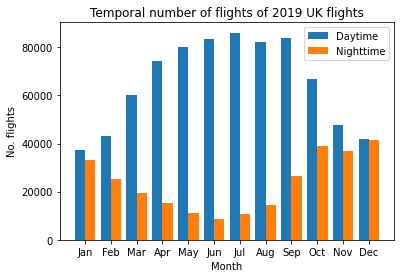

In [970]:
monthnum = np.arange(len(months))
plt.title("Temporal number of flights of 2019 UK flights")
plt.xlabel("Month")
plt.ylabel("No. flights")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, daynoflights, 0.4)
plt.bar(monthnum + 0.2, nightnoflights, 0.4)
plt.legend(['Daytime','Nighttime'])

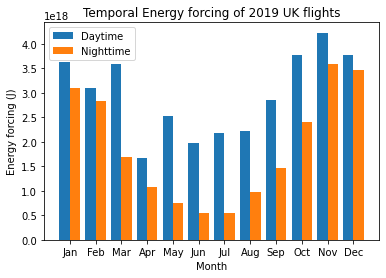

In [963]:
monthnum = np.arange(len(months))
plt.title("Temporal Energy forcing of 2019 UK flights")
plt.xlabel("Month")
plt.ylabel("Energy forcing (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, monthlydef, 0.4)
plt.bar(monthnum + 0.2, monthlynef, 0.4)
plt.legend(['Daytime','Nighttime'])

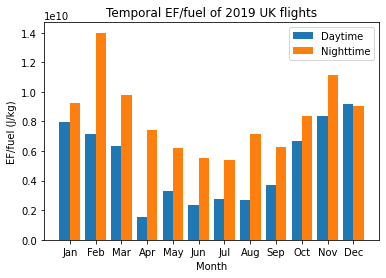

In [980]:
monthnum = np.arange(len(months))
plt.title("Temporal EF/fuel of 2019 UK flights")
plt.xlabel("Month")
plt.ylabel("EF/fuel (J/kg)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, monthlydefpf, 0.4)
plt.bar(monthnum + 0.2, monthlynefpf, 0.4)
plt.legend(['Daytime','Nighttime'])

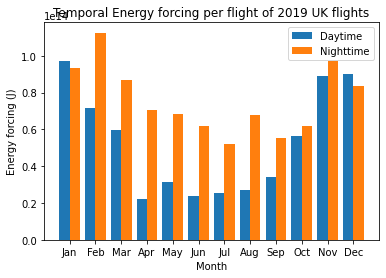

In [964]:
monthnum = np.arange(len(months))
plt.title("Temporal Energy forcing per flight of 2019 UK flights")
plt.xlabel("Month")
plt.ylabel("Energy forcing (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, monthlydefflight,0.4)
plt.bar(monthnum + 0.2, monthlynefflight,0.4)
plt.legend(['Daytime','Nighttime'])

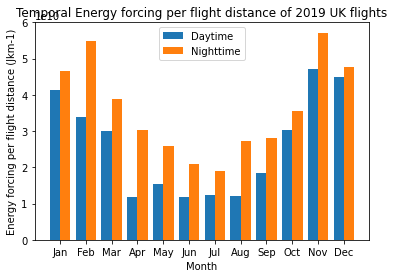

In [965]:
monthnum = np.arange(len(months))
plt.title("Temporal Energy forcing per flight distance of 2019 UK flights")
plt.xlabel("Month")
plt.ylabel("Energy forcing per flight distance (Jkm-1)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, monthlydefdist,0.4)
plt.bar(monthnum + 0.2, monthlynefdist,0.4)
plt.legend(['Daytime','Nighttime'])

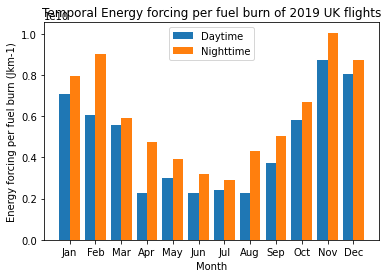

In [966]:
monthnum = np.arange(len(months))
plt.title("Temporal Energy forcing per fuel burn of 2019 UK flights")
plt.xlabel("Month")
plt.ylabel("Energy forcing per fuel burn (Jkm-1)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, monthlydeffuel,0.4)
plt.bar(monthnum + 0.2, monthlyneffuel,0.4)
plt.legend(['Daytime','Nighttime'])

### Temporal airport distribution

In [973]:
adef = {}
adefpf = {}
saf50adef = {}
adaydist = {}
adayflights = {}
adayfuel = {}
defperflight = {}
defperdist = {}
defperfuel = {}


for i in apcode:
    adef[i] = []
    adefpf[i] =[]
    saf50adef[i] = []
    adaydist[i] = []
    adayflights[i] = []
    adayfuel[i] = []
    defperflight[i] = []
    defperdist[i] = []
    defperfuel[i] = []

for j in months:
    jetdf = dayflight[j]
    safdf = saf50dayflight[j]
    for i in apcode:
        b = jetdf[jetdf['origin_airport'] == i]
        c = safdf[safdf['origin_airport'] == i]
        b['EF/fuel'] = b['total_contrail_energy_forcing']/b['total_fuel_burn']
        adef[i].append(b['total_contrail_energy_forcing'].sum())
        adefpf[i].append(b['EF/fuel'].mean())
        saf50adef[i].append(c['total_contrail_energy_forcing'].sum())
        adaydist[i].append(len(b.index))
        adayflights[i].append(b['total_flight_distance_km'].sum())
        adayfuel[i].append(b['total_fuel_burn'].sum())

#adef # Monthly airport daytime energy forcing

for j in range(0,12):
    for i in apcode:
        adefinter = adef[i][j]
        noflightsinter = adayflights[i][j]
        afdistinter = adaydist[i][j]
        afdinter = adayfuel[i][j]
        defperflight[i].append(adefinter/noflightsinter)
        defperdist[i].append(adefinter/afdistinter)
        defperfuel[i].append(adefinter/afdinter)

C:\Users\user\AppData\Local\Temp/ipykernel_44064/3694064745.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp/ipykernel_44064/3694064745.py:45: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\user\AppData\Local\Temp/ipykernel_44064/3694064745.py:46: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\user\AppData\Local\Temp/ipykernel_44064/3694064745.py:47: RuntimeWarning:

invalid value encountered in double_scalars



In [976]:
anef = {}
anefpf = {}
saf50anef = {}
anightdist = {}
anightflights = {}
anightfuel = {}
nefperflight = {}
nefperdist = {}
nefperfuel = {}

for i in apcode:
    anef[i] = []
    anefpf[i] = []
    saf50anef[i] = []
    anightdist[i] = []
    anightflights[i] = []
    anightfuel[i] = []
    nefperflight[i] = []
    nefperdist[i] = []
    nefperfuel[i] = []

for j in months:
    jetdf = nightflight[j]
    safdf = saf50nightflight[j]
    for i in apcode:
        b = jetdf[jetdf['origin_airport'] == i]
        c = safdf[safdf['origin_airport'] == i]
        b['EF/fuel'] = b['total_contrail_energy_forcing']/b['total_fuel_burn']
        anef[i].append(b['total_contrail_energy_forcing'].sum())
        anefpf[i].append(b['EF/fuel'].mean())
        saf50anef[i].append(c['total_contrail_energy_forcing'].sum())
        anightdist[i].append(len(b.index))
        anightflights[i].append(b['total_flight_distance_km'].sum())
        anightfuel[i].append(b['total_fuel_burn'].sum())


#anef # Monthly airport nighttime energy forcing

for j in range(0,12):
    for i in apcode:
        anefinter = anef[i][j]
        noflightsinter = noflights[i][j]
        afdistinter = anightdist[i][j]
        afdinter = anightfuel[i][j]
        nefperflight[i].append(anefinter/noflightsinter)
        nefperdist[i].append(anefinter/afdistinter)
        nefperfuel[i].append(anefinter/afdinter)

C:\Users\user\AppData\Local\Temp/ipykernel_44064/2850934448.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp/ipykernel_44064/2850934448.py:46: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\user\AppData\Local\Temp/ipykernel_44064/2850934448.py:47: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\user\AppData\Local\Temp/ipykernel_44064/2850934448.py:45: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
pmsday = np.array(monthlydef) - np.array(safmonthlydef) #potential monthly savings
pmsday

In [ ]:
plt.barh(months,pmsday)
plt.ylabel('Month')
plt.xlabel('Potential savings (J) ')
plt.show()

In [ ]:
monthnum = range(12)
plt.title("Heathrow Energy forcing per flight distance 2019")
plt.xlabel("Month")
plt.ylabel("Energy forcing per flight distance (Jkm-1)")
plt.xticks(monthnum, months)
plt.bar(monthnum, defperdist['EGLL'])
plt.bar(monthnum, nefperdist['EGLL'])
plt.legend(['Daytime','Nighttime'])

In [ ]:
monthnum = range(12)
plt.title("Gatwick Energy forcing per flight distance 2019")
plt.xlabel("Month")
plt.ylabel("Energy forcing per flight distance (Jkm-1)")
plt.xticks(monthnum, months)
plt.bar(monthnum, defperdist['EGKK'])
plt.bar(monthnum, nefperdist['EGKK'])
plt.legend(['Daytime','Nighttime'])

In [ ]:
monthnum = range(12)
plt.title("Luton Energy forcing per flight distance 2019")
plt.xlabel("Month")
plt.ylabel("Energy forcing per flight distance (Jkm-1)")
plt.xticks(monthnum, months)
plt.bar(monthnum, defperdist['EGGW'])
plt.bar(monthnum, nefperdist['EGGW'])
plt.legend(['Daytime','Nighttime'])

In [ ]:
monthnum = range(12)
plt.title("Stansted Energy forcing per flight distance 2019")
plt.xlabel("Month")
plt.ylabel("Energy forcing per flight distance (Jkm-1)")
plt.xticks(monthnum, months)
plt.bar(monthnum, defperdist['EGSS'])
plt.bar(monthnum, nefperdist['EGSS'])
plt.legend(['Daytime','Nighttime'])

In [ ]:
monthnum = np.arange(len(months))
plt.title("Luton Energy forcing per fuel burn 2019")
plt.xlabel("Month")
plt.ylabel("Energy forcing per fuel burn (Jkg-1)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, defperfuel['EGGW'],0.4)
plt.bar(monthnum + 0.2, nefperfuel['EGGW'],0.4)
plt.legend(['Daytime','Nighttime'])

##### Isolating 15:00 - 04:00 UTC flights

In [142]:
jetahourly = alljeta.copy()
jetahourly = jetahourly.set_index(jetahourly['first_waypoint_time'].values)
count = jetahourly.resample('H').count()
mean = jetahourly.resample('H').mean()
jetahourly = jetahourly.resample('H', label = 'left').sum()
jetahourly['No. flights'] = count['aircraft_type_icao'].values
jetahourly['EF/fuel'] = mean['EF/fuel'].values
jetahourly

,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel,No. flights
2019-01-01 00:00:00,37.60,33729.90,3.298553,258854.803895,9.745523e+05,2.324569e+15,1.650239e+14,5.860888e+08,4
2019-01-01 01:00:00,17.21,15168.93,1.649276,107110.571617,4.390437e+05,1.108311e+15,8.967493e+14,1.000736e+10,2
2019-01-01 02:00:00,35.62,31920.17,3.298553,193029.702840,7.899910e+05,2.485146e+15,3.987818e+14,2.164641e+09,4
2019-01-01 03:00:00,16.35,14504.79,0.824638,87556.215439,2.032425e+05,2.286210e+12,2.659810e+13,3.037831e+08,1
2019-01-01 04:00:00,0.00,0.00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,213.39,168718.10,72.492302,713215.424763,8.140907e+06,1.827552e+17,1.121642e+15,3.824837e+08,86
2019-12-31 20:00:00,262.33,216894.75,64.062965,790303.821074,8.910055e+06,1.262992e+17,1.057044e+15,5.019695e+08,76
2019-12-31 21:00:00,274.81,234241.40,50.576025,643536.622693,8.406854e+06,1.005790e+17,1.579101e+14,1.319896e+08,60
2019-12-31 22:00:00,277.39,239811.55,38.774952,412848.037722,7.314506e+06,5.439284e+16,6.446763e+12,1.277850e+07,46


In [143]:
hours = np.arange(0,24)
jetahourlydata = pd.DataFrame(index = hours, columns = jetahourly.columns)

for i in hours:
    jetahourlydata.iloc[i,:] = jetahourly[jetahourly.index.hour == i].sum()
    jetahourlydata.loc[i,'EF/fuel'] = jetahourly[jetahourly.index.hour == i].mean()['EF/fuel']

jetahourlydata

,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel,No. flights
0,5133.09,3922517.77,1984.337412,21579382.891762,186131342.973671,3165110899499810816.0,139278860179489504.0,6919371586.253956,2331.0
1,3776.6,2741357.34,1724.477996,14338747.497941,161952328.661604,2406868634255002112.0,72095484313858240.0,4361197390.349227,2031.0
2,3683.45,2844994.22,1233.209114,16052979.433423,136034720.504352,1733125645119259648.0,61407251536023800.0,4233524225.248741,1455.0
3,3978.45,3022572.16,1409.685927,17558002.784985,163437827.893335,2242433395064519680.0,61698182186796864.0,2599000813.799024,1654.0
4,11480.65,8591521.83,4320.110188,40176479.780362,411301139.543726,6384739682117786624.0,37638459844449824.0,1245948270.211989,5039.0
5,97129.64,72084982.35,39498.585381,240905929.468502,2971448304.898255,56644749359149694976.0,26259330865666336.0,1570144729.456696,45965.0
6,139551.57,101983682.13,61708.154475,336823440.448086,4443678860.593554,110147742591458770944.0,276914234475936160.0,1015112102.934579,72283.0
7,140281.01,102648614.26,62580.343549,378883111.466177,4625867869.951923,123313285574250954752.0,412712182862869888.0,842709805.89164,73517.0
8,151281.95,112846094.09,59678.325639,507558957.440549,4807620209.091465,115718139916781092864.0,697756467034619136.0,1239537268.211171,70142.0
9,196513.78,153758151.88,56159.331322,895969549.242956,5727350404.960683,94560312958740889600.0,1406033221911107584.0,1640718207.147373,66074.0


<BarContainer object of 24 artists>

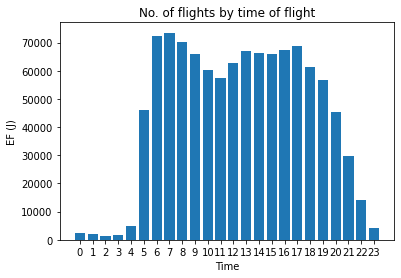

In [910]:
hournum = range(24)
plt.title("No. of flights by time of flight")
plt.xlabel("Time")
plt.ylabel("EF (J)")
plt.xticks(hournum, hours)
plt.bar(hournum, jetahourlydata['No. flights'])

<BarContainer object of 24 artists>

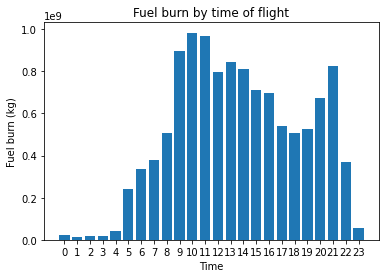

In [928]:
hournum = range(24)
plt.title("Fuel burn by time of flight")
plt.xlabel("Time")
plt.ylabel("Fuel burn (kg)")
plt.xticks(hournum, hours)
plt.bar(hournum, jetahourlydata['total_fuel_burn'])

<BarContainer object of 24 artists>

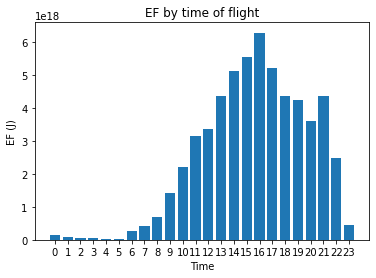

In [144]:
hournum = range(24)
plt.title("EF by time of flight")
plt.xlabel("Time")
plt.ylabel("EF (J)")
plt.xticks(hournum, hours)
plt.bar(hournum, jetahourlydata['total_contrail_energy_forcing'])

<BarContainer object of 24 artists>

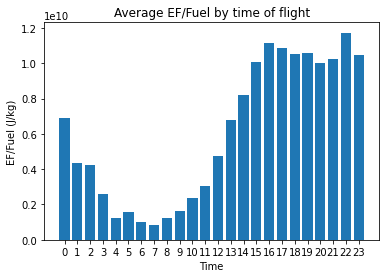

In [145]:
hournum = range(24)
plt.title("Average EF/Fuel by time of flight")
plt.xlabel("Time")
plt.ylabel("EF/Fuel (J/kg)")
plt.xticks(hournum, hours)
plt.bar(hournum, jetahourlydata['EF/fuel'])

##### Monthly temporal data

In [256]:
monthhourflights = pd.DataFrame(index = hours,columns = months)
monthhourfuel = pd.DataFrame(index = hours,columns = months)
monthhouref = pd.DataFrame(index = hours,columns = months)
monthhourefpf = pd.DataFrame(index = hours,columns = months)

for i in np.arange(0,12):
    dfm = alljeta[alljeta['first_waypoint_time'].dt.month == i+1]
    for j in hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        monthhourflights.iloc[j,i] = len(dfh.index)
        monthhourfuel.iloc[j,i] = dfh['total_fuel_burn'].sum()
        monthhouref.iloc[j,i] = dfh['total_contrail_energy_forcing'].sum()
        monthhourefpf.iloc[j,i] = dfh['EF/fuel'].mean()

Text(0.5, 1.0, 'Fuel burn (kg)')

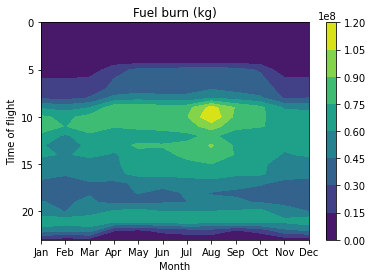

In [929]:
plt.contourf(monthhourfuel.columns,monthhourfuel.index,monthhourfuel.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('Fuel burn (kg)')

Text(0.5, 1.0, 'No. flights')

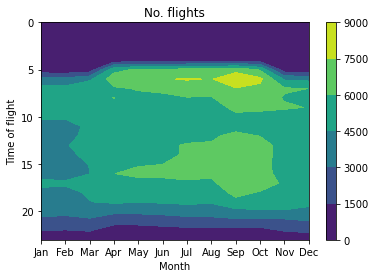

In [930]:
plt.contourf(monthhourflights.columns,monthhourflights.index,monthhourflights.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('No. flights')

Text(0.5, 1.0, 'EF')

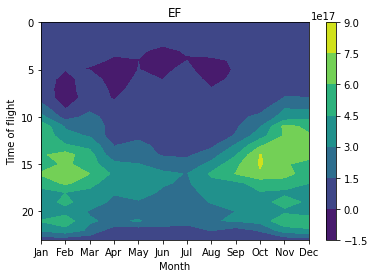

In [259]:
plt.contourf(monthhouref.columns,monthhouref.index,monthhouref.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('EF')

Text(0.5, 1.0, 'EF/fuel')

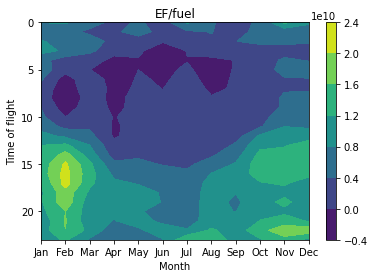

In [258]:
plt.contourf(monthhourefpf.columns,monthhourefpf.index,monthhourefpf.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('EF/fuel')

### Engine type

##### Energy forcing

In [ ]:
engine = []

for m in months:
    df = jeta[m]
    engineinter = list(df['engine_name'].unique())
    for i in engineinter:
        if i not in engine:
            engine.append(i)
            
engine = list(filter(None, engine))
#engine # engine names

In [ ]:
enginecount = {}

for i in engine:
    enginecount[i] = []

enginef = []
enginedist = []
engineef = []
enginemass = []

for i in engine:
    b = alljeta[alljeta['engine_name'] == i]
    enginef.append(b['total_fuel_burn'].sum())
    enginecount[i].append(len(b.index))
    enginedist.append(b['total_flight_distance_km'].sum())
    engineef.append(b['total_contrail_energy_forcing'].sum())
    enginemass.append(b['mean_aircraft_mass'].sum())
    
ec = pd.DataFrame(enginecount.values(), index = engine, columns = ['No. of flights'])
#ec # No. flights with the engine type
ec['Total fuel burn'] = enginef
ec['Total flight distance'] = enginedist
ec['Energy forcing'] = engineef
ec['Total mass flown'] = enginemass
ec['Energy per fuel burn'] = ec['Energy forcing']/ec['Total fuel burn']
ec['Energy per flight distance'] = ec['Energy forcing']/ec['Total flight distance']
ec

In [ ]:
ec['No. of flights'].sum()

In [ ]:
noflightsort = ec.copy()
noflightsort.sort_values(by = ['No. of flights'], inplace = True, ascending = True)
nfstop10 = noflightsort.tail(10)
nfstop10

In [ ]:
plt.barh(nfstop10.index,nfstop10['No. of flights'])
plt.title('Number of flights per engine model')
plt.ylabel('Engine model')
plt.xlabel('No. of flights')
plt.show()

In [ ]:
epfbsort = ec.copy()
epfbsort = epfbsort[epfbsort['No. of flights'] >= 10000]
epfbsort.sort_values(by = ['Energy per fuel burn'], inplace = True, ascending = True)
epfbtop10 = epfbsort.tail(10)
epfbtop10

In [ ]:
plt.barh(epfbtop10.index,epfbtop10['Energy per fuel burn'])
plt.title('Engine models energy forcing per fuel burn')
plt.ylabel('Engine type')
plt.xlabel('Energy forcing per unit of fuel (Jkg-1)')
plt.show()

In [ ]:
epfdsort = ec.copy()
epfdsort = epfdsort[epfdsort['No. of flights'] >= 10000]
epfdsort.sort_values(by = ['Energy per flight distance'], inplace = True, ascending = True)
epfdtop10 = epfdsort.tail(20)
epfdtop10

In [ ]:
plt.barh(epfdtop10.index,epfdtop10['Energy per flight distance'])
plt.title('UK energy forcing per flight distance')
plt.ylabel('Engine type')
plt.xlabel('Energy forcing per flight distance (Jkm-1)')
plt.show()

In [ ]:
fdpfsort = ec.copy()
fdpfsort = fdpfsort[fdpfsort['No. of flights'] >= 10000]
fdpfsort['Flight distance per flight'] = fdpfsort['Total flight distance']/fdpfsort['No. of flights']
fdpfsort.sort_values(by = ['Flight distance per flight'], inplace = True, ascending = True)
fdpftop10 = fdpfsort.tail(20)

In [ ]:
plt.barh(fdpftop10.index,fdpftop10['Flight distance per flight'])
plt.title('Flight distance per flight by engine')
plt.ylabel('Engine type')
plt.xlabel('Flight distance per flight (km)')
plt.show()

In [ ]:
fdpfbsort = ec.copy()
fdpfbsort = fdpfbsort[fdpfbsort['No. of flights'] >= 10000]
fdpfbsort['Flight distance per fuel burn'] = fdpfbsort['Total flight distance']/fdpfbsort['Total fuel burn']
fdpfbsort.sort_values(by = ['Flight distance per fuel burn'], inplace = True, ascending = True)
fdpfbtop10 = fdpfbsort.tail(10)
fdpfbtop10

In [ ]:
plt.barh(fdpfbtop10.index,fdpfbtop10['Flight distance per fuel burn'])
plt.title('Flight distance per fuel burn by engine')
plt.ylabel('Engine type')
plt.xlabel('Flight distance per fuel burn (kmkg-1)')
plt.show()

In [ ]:
fdpfbsort = ec.copy()
fdpfbsort = fdpfbsort[fdpfbsort['No. of flights'] >= 10000]
fdpfbsort['Flight distance per fuel burn'] = fdpfbsort['Total flight distance']/fdpfbsort['Total fuel burn']*fdpfbsort['Total mass flown']
fdpfbsort.sort_values(by = ['Flight distance per fuel burn'], inplace = True, ascending = True)
fdpfbtop10 = fdpfbsort.tail(10)
fdpfbtop10

##### nvPM

In [ ]:
enginenvpm = []
for i in engine:
    b = alljeta[alljeta['engine_name'] == i]
    enginenvpm.append(b['mean_nvpm_ei_n'].sum())

ec['nvPM EI'] = enginenvpm

In [ ]:
nvpmfbsort = ec.copy()
nvpmfbsort = nvpmfbsort[nvpmfbsort['No. of flights'] >= 10000]
nvpmfbsort['nvPM EI per fuel burn'] = nvpmfbsort['nvPM EI']/nvpmfbsort['Total fuel burn']
nvpmfbsort.sort_values(by = ['nvPM EI per fuel burn'], inplace = True, ascending = True)
nvpmfbtop10 = nvpmfbsort.tail(10)
nvpmfbtop10

In [ ]:
nvpmdsort = ec.copy()
nvpmdsort = nvpmdsort[nvpmdsort['No. of flights'] >= 10000]
nvpmdsort['nvPM EI per flight distance'] = nvpmdsort['nvPM EI']/nvpmdsort['Total flight distance']
nvpmdsort.sort_values(by = ['nvPM EI per flight distance'], inplace = True, ascending = True)
nvpmdtop10 = nvpmdsort.tail(10)
nvpmdtop10

In [ ]:
nvpmflsort = ec.copy()
nvpmflsort = nvpmdsort[nvpmdsort['No. of flights'] >= 10000]
nvpmflsort['nvPM EI per flight'] = nvpmflsort['nvPM EI']/nvpmflsort['No. of flights']
nvpmflsort.sort_values(by = ['nvPM EI per flight'], inplace = True, ascending = True)
nvpmfltop10 = nvpmflsort.tail(10)
nvpmfltop10

In [ ]:
enginemonthnvpm={}
enginemonthf = {}
enginemonthfb = {}

for i in engine:
    enginenvpm[i] = []
    enginemonthf[i] = []
    enginefb[i] = []
    for j in months:
        df = jeta[j]
        df = df[df['engine_name'] == i]
        enginemonthnvpm[i].append(df['mean_nvpm_ei_n'].sum())
        enginemonthf[i].append(len(df.index))
        enginemonthfb[i].append(df['total_fuel_burn'].sum())

In [ ]:
enginemonthnvpmfli = {}
enginemonthnvpmfb = {}

for i in engine:
    enginenvpmfli[i] = []
    enginenvpmfb[i] = []
    for j in range(0,12):
        a = enginemonthnvpm[i][j]
        b = enginemonthf[i][j]
        c = enginemonthfb[i][j]
        enginemonthnvpmfli[i].append(a/b)
        enginemonthnvpmfb[i].append(a/c)

enginenvpmfb

### EF/fuel

Text(0, 0.5, 'EF/fuel (J/kg)')

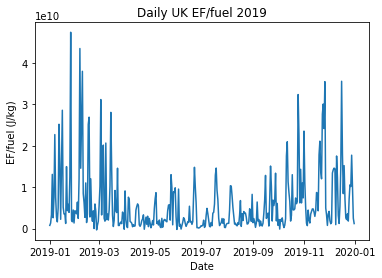

In [927]:
plt.plot(jetadaily.index,jetadaily['EF/fuel'])
plt.title("Daily UK EF/fuel 2019")
plt.xlabel("Date")
plt.ylabel("EF/fuel (J/kg)")

Text(0, 0.5, 'EF/fuel (J/kg)')

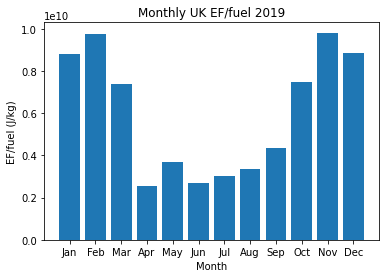

In [950]:
plt.bar(months,jetamonthly['EF/fuel'])
plt.title("Monthly UK EF/fuel 2019")
plt.xlabel("Month")
plt.ylabel("EF/fuel (J/kg)")

In [983]:
aefpf = {}

for i in apcode:
    df = alljeta[alljeta['origin_airport'] == i]
    aefpf[i] = df['EF/fuel'].mean()

In [989]:
aps['EF/fuel'] = aefpf.values()

In [992]:
aefpftop10 = aps.sort_values(by=['EF/fuel'], ascending=True).tail(10)
aefpftop10

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel
RAF Lakenheath,EGUL,10,7.216124e+05,4.042041e+15,4,2.999495e+05,1.010510e+15,4.042041e+15,4,2.999495e+05,1.354328e+10,40.000000,5.563156e+09
Glasgow Prestwick Airport,EGPK,2341,2.214612e+07,1.124729e+17,346,3.053729e+06,3.250660e+14,1.171720e+17,437,3.466706e+06,3.622117e+10,18.667236,6.198675e+09
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09
Liverpool John Lennon Airport,EGGP,16461,6.542151e+07,5.704021e+17,1499,8.854844e+06,3.805218e+14,6.065807e+17,2249,1.228660e+07,5.061274e+10,13.662596,6.562204e+09
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09
Bicester Airfield,EGDD,1,5.690870e+03,0.000000e+00,0,0.000000e+00,NaN,4.794079e+13,1,5.690870e+03,8.424158e+09,100.000000,8.424158e+09
Blackpool International Airport,EGNH,98,1.271146e+05,1.412513e+15,6,1.039001e+04,2.354189e+14,1.562366e+15,12,2.342194e+04,7.875353e+10,12.244898,9.812349e+09
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10
Robin Hood Doncaster Sheffield Airport,EGCN,4477,2.631744e+07,3.932263e+17,780,5.767772e+06,5.041362e+14,4.038943e+17,1026,6.627825e+06,6.921057e+10,22.917132,1.550062e+10


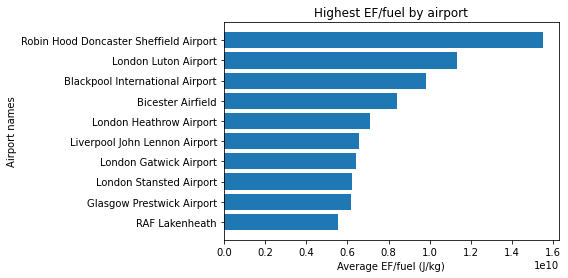

In [993]:
plt.barh(aefpftop10.index,aefpftop10['EF/fuel'])
plt.title('Highest EF/fuel by airport')
plt.ylabel('Airport names')
plt.xlabel('Average EF/fuel (J/kg)')
plt.show()

In [1002]:
aefpf10000top10 = aps[aps['No. flights'] > 10000].sort_values(by=['EF/fuel'], ascending=True).tail(20)
aefpf10000top10

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel
George Best Belfast City Airport,EGAC,10274,1.440693e+07,2.240235e+16,125,3.266444e+05,1.792188e+14,3.088129e+16,367,8.133130e+05,4.055807e+10,3.572124,1.063804e+09
London City Airport,EGLC,31585,6.752292e+07,5.070162e+16,348,1.126197e+06,1.456943e+14,1.095711e+17,2092,5.309836e+06,2.108178e+10,6.623397,1.370084e+09
Belfast International Airport,EGAA,24917,7.994740e+07,3.718859e+17,1230,9.497807e+06,3.023462e+14,4.113641e+17,2219,1.165111e+07,3.693338e+10,8.905566,2.984632e+09
Aberdeen Dyce Airport,EGPD,13836,2.543262e+07,1.294435e+17,411,1.619992e+06,3.149477e+14,1.533781e+17,1126,3.196672e+06,4.648126e+10,8.138190,3.283657e+09
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,3.292883e+09
Leeds Bradford Airport,EGNM,13738,7.155316e+07,3.390697e+17,1199,9.663691e+06,2.827937e+14,3.621799e+17,1662,1.222094e+07,3.188484e+10,12.097831,3.448736e+09
East Midlands Airport,EGNX,20948,1.280745e+08,7.163839e+17,2216,3.100627e+07,3.232779e+14,7.346856e+17,2921,2.907607e+07,3.226842e+10,13.944052,4.065776e+09
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10,11.867102,4.247587e+09
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10,11.123259,4.276552e+09


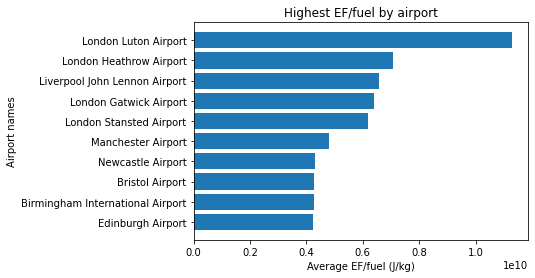

In [999]:
plt.barh(aefpf10000top10.index,aefpf10000top10['EF/fuel'])
plt.title('Highest EF/fuel by airport')
plt.ylabel('Airport names')
plt.xlabel('Average EF/fuel (J/kg)')
plt.show()

### Luton airport

In [1034]:
luton = alljeta[alljeta['origin_airport'] == 'EGGW']
b = luton['destination_country'].value_counts()
b.head(11)

ES    7274
RO    5288
PL    5117
      5062
GB    4930
FR    4892
IT    3675
NL    3014
PT    2465
IE    2407
CH    2308
Name: destination_country, dtype: int64

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
11,B752,Jet,EGGW,London Luton Airport,GB,DE,2019-01-01 05:34:20.021,1.30,941.27,0.824638,3697.297081,RB211-535E4,85050.617820,1.124716e+15,0.000000e+00,0.000000e+00
30,A319,Jet,EGGW,London Luton Airport,GB,IT,2019-01-01 06:40:27.747,1.55,1130.59,0.824638,3167.972902,CFM56-5B5/3,58054.640715,9.894166e+14,0.000000e+00,0.000000e+00
49,A320,Jet,EGGW,London Luton Airport,GB,CH,2019-01-01 06:21:16.666,1.24,864.35,0.824638,2985.537290,CFM56-5B4/3,63839.980211,8.783747e+14,0.000000e+00,0.000000e+00
54,A320,Jet,EGGW,London Luton Airport,GB,IT,2019-01-01 06:28:24.818,2.24,1818.46,0.824638,5074.410030,V2527-A5,63403.639614,4.371340e+15,-3.361604e+10,-6.624621e+06
55,A320,Jet,EGGW,London Luton Airport,GB,LT,2019-01-01 06:03:17.000,2.01,1704.82,0.824638,4671.923074,V2527-A5,63236.237936,4.081579e+15,2.669607e+13,5.714150e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068293,A21N,Jet,EGGW,London Luton Airport,GB,HU,2019-12-31 21:41:00.772,2.13,1551.66,0.842934,4620.849086,PW1133GA-JM,77226.410625,3.703599e+15,1.032444e+12,2.234316e+08
1068297,A320,Jet,EGGW,London Luton Airport,GB,HU,2019-12-31 21:30:38.601,2.28,1680.42,0.842934,5149.801631,V2527-A5,63659.738692,4.383189e+15,0.000000e+00,0.000000e+00
1068298,A320,Jet,EGGW,London Luton Airport,GB,,2019-12-31 21:15:49.000,2.07,1571.84,0.842934,4576.300207,V2527-A5,63069.702917,4.679507e+15,0.000000e+00,0.000000e+00
1068347,A321,Jet,EGGW,London Luton Airport,GB,RU,2019-12-31 22:27:09.309,3.02,2124.30,0.842934,4528.134238,V2533-A5,72337.958242,3.286506e+15,0.000000e+00,0.000000e+00


In [1088]:
for i in b.index:
    dnamed.loc[i,'Luton flights'] = b.loc[i]
    dnamed.loc[i,'Luton EF/fuel'] = luton[luton['destination_country'] == i]['EF/fuel'].mean()
dnamed

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),ISO3,Luton flights,Luton EF/fuel
US,61420.0,3.383175e+09,1.364965e+19,4.082188e+09,23843.0,1.438041e+09,1.442720e+19,1.103035e+10,13805.0,7.886830e+08,1.244490e+19,1.676974e+10,22.476392,USA,1002.0,5.203324e+09
SG,3159.0,4.155193e+08,1.351607e+18,3.323037e+09,2039.0,2.698398e+08,1.360206e+18,5.176423e+09,656.0,8.418039e+07,9.027646e+17,1.076383e+10,20.766065,SGP,1.0,-1.091206e+09
KR,1402.0,9.548339e+07,3.388512e+17,3.830452e+09,504.0,3.501152e+07,3.382096e+17,1.065525e+10,288.0,1.877277e+07,2.932176e+17,1.648638e+10,20.542083,KOR,NaN,NaN
PK,1240.0,5.732011e+07,3.747006e+17,6.422828e+09,577.0,2.742937e+07,3.688901e+17,1.357261e+10,376.0,1.792489e+07,3.369275e+17,1.902550e+10,30.322581,PAK,1.0,0.000000e+00
CN,4679.0,2.906797e+08,1.880203e+18,6.409309e+09,2405.0,1.581176e+08,1.894568e+18,1.254082e+10,1505.0,9.652701e+07,1.697485e+18,1.811506e+10,32.164993,CHN,12.0,1.792982e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CW,1.0,4.801227e+04,9.495953e+14,1.977818e+10,1.0,4.801227e+04,9.495953e+14,1.977818e+10,1.0,4.801227e+04,9.495953e+14,1.977818e+10,100.000000,CUW,NaN,NaN
CI,2.0,1.369196e+04,1.102562e+14,9.311802e+09,1.0,5.917183e+03,1.100180e+14,1.859297e+10,1.0,5.917183e+03,1.100180e+14,1.859297e+10,50.000000,CIV,1.0,1.859297e+10
MM,2.0,3.135156e+04,8.846253e+13,2.822304e+09,0.0,0.000000e+00,0.000000e+00,NaN,0.0,0.000000e+00,0.000000e+00,NaN,0.000000,MMR,NaN,NaN
VI,1.0,9.405514e+03,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,NaN,0.0,0.000000e+00,0.000000e+00,NaN,0.000000,VIR,NaN,NaN


In [1086]:
fig = go.Figure(data=go.Choropleth(
    locations = dnamed['ISO3'],
    z = dnamed['Luton flights'],
    text = dnamed['ISO3'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_ticksuffix = '%',
    colorbar_title = 'No. Luton flights',
))

fig.update_layout(
    title_text='2019 Luton flights',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [1090]:
fig = go.Figure(data=go.Choropleth(
    locations = dnamed['ISO3'],
    z = dnamed['Luton EF/fuel'],
    text = dnamed['ISO3'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = 'J/kg',
    colorbar_title = 'Average EF/fuel (J/kg)',
))

fig.update_layout(
    title_text='2019 Luton flights EF/fuel',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

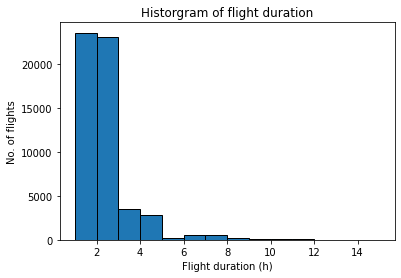

In [1019]:
plt.hist(luton['flight_duration_h'], bins=range(1,16), edgecolor="black")
plt.xlabel('Flight duration (h)')
plt.ylabel('No. of flights')
plt.title('Historgram of flight duration')
plt.show()

Text(0.5, 1.0, 'Luton No. flights')

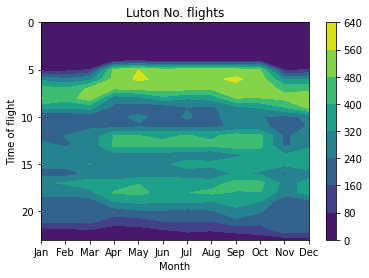

In [1022]:
lutonflights = pd.DataFrame(index = hours,columns = months)

for i in np.arange(0,12):
    dfm = luton[luton['first_waypoint_time'].dt.month == i+1]
    for j in hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        lutonflights.iloc[j,i] = len(dfh.index)

plt.contourf(lutonflights.columns,lutonflights.index,lutonflights.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('Luton No. flights')

### Largest energy forcing flights 

#### High EF

##### Fuel burn-EF CDF plot

In [27]:
efsort = alljeta.copy()
efsort.sort_values(by = ['total_contrail_energy_forcing'], inplace = True, ascending = True)
efsort

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
260340,A320,Jet,EGLL,London Heathrow Airport,GB,GI,2019-04-15 06:44:54.853,2.48,1794.79,0.853914,6391.050310,V2527-A5,65031.068277,4.227499e+15,-2.838520e+15,-4.441398e+11
284095,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-04-23 08:50:56.000,10.09,8816.01,0.850339,114756.968157,CF6-80C2B1F,309810.118385,7.363019e+14,-2.191132e+15,-1.909368e+10
276392,A321,Jet,EGNT,Newcastle Airport,GB,ES,2019-04-20 13:08:06.235,4.20,3355.71,0.851679,11385.217013,V2533-A5,75188.809631,4.150544e+15,-2.188881e+15,-1.922564e+11
276274,B744,Jet,EGKK,London Gatwick Airport,GB,US,2019-04-20 12:28:26.000,8.36,7686.05,0.851679,99139.033260,CF6-80C2B1F,305149.725004,8.114185e+14,-2.029000e+15,-2.046620e+10
693404,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-09-03 09:59:40.138,8.20,7183.76,0.859802,106919.972045,CF6-80C2B1F,310660.494737,8.271588e+14,-1.845482e+15,-1.726040e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18610,B744,Jet,EGLL,London Heathrow Airport,GB,CA,2019-01-08 18:35:08.000,10.37,8475.68,0.822775,96280.857866,CF6-80C2B1F,294034.782944,8.274401e+14,6.891590e+15,7.157799e+10
47718,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-21 18:51:19.000,7.96,7105.12,0.822908,73691.322451,CF6-80C2B1F,280392.168396,7.815525e+14,7.240956e+15,9.826063e+10
47056,GLF5,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-21 13:35:00.000,7.54,5784.52,0.822908,9808.854845,BR700-710C4-11,30450.174413,7.926962e+15,7.477953e+15,7.623676e+11
919517,B772,Jet,EGLL,London Heathrow Airport,GB,BS,2019-11-07 13:06:36.000,7.92,6972.69,0.838777,55733.461183,Trent 892,220030.812141,8.473263e+14,8.433759e+15,1.513231e+11


In [ ]:
efsort['total_fuel_burn'].cumsum()
data = efsort['total_fuel_burn']
totalfuel = data.sum()
x = data.cumsum()/totalfuel
y = efsort['total_contrail_energy_forcing']

In [ ]:
plt.plot(x, y)
plt.xlabel('Percentage of total fuel demand')
plt.ylabel('EF')
plt.grid()
plt.xticks(np.arange(0, 1.1, 0.1))

In [ ]:
a = abs(x-0.8)
x[a == a.min()]

80th percentile = 698084

In [ ]:
twentypercentfuel = efsort.loc[698084:]

In [28]:
b = efsort.loc[698084]['total_contrail_energy_forcing']
percentile = stats.percentileofscore(efsort['total_contrail_energy_forcing'], b)
percentile

94.21178646509007

20% fuel demand is at 94.21178646509007 percentile of EF

##### Percentile

12 used from article as threshold

In [29]:
twelvepercent = alljeta['total_contrail_energy_forcing'].quantile(0.88)
highef = alljeta[alljeta['total_contrail_energy_forcing'] > twelvepercent]

In [ ]:
highef['total_fuel_burn'].sum()


In [1110]:
highefinter = {}
highefflight = {}
higheffuel = {}
highefpfa = {}

for i in apcode:
    df = highef[highef['origin_airport'] == i]
    highefinter[i] = df['total_contrail_energy_forcing'].sum()
    highefflight[i] = len(df.index)
    higheffuel[i] = df['total_fuel_burn'].sum()
    highefpfa[i] = df['EF/fuel'].mean()

aps['High EF flights EF'] = highefinter.values()
aps['High EF flights'] = highefflight.values()
aps['High EF fuel']  = higheffuel.values()
aps['High EF flights EF/fuel'] = highefpfa.values()

In [1113]:
aps['Proportion of flights in High EF(%)'] = aps['High EF flights']/aps['No. flights']*100

##### Number of flights

In [1111]:
ahigheff = aps.copy()
ahigheff = ahigheff.dropna()
ahigheff.sort_values(by=['High EF flights'], inplace = True, ascending=True)
ahighefftop10 = ahigheff.tail(10)
ahighefftop10 

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10,11.123259,4.276552e+09,6.085028e+10
East Midlands Airport,EGNX,20948,1.280745e+08,7.163839e+17,2216,3.100627e+07,3.232779e+14,7.346856e+17,2921,2.907607e+07,3.226842e+10,13.944052,4.065776e+09,3.856864e+10
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,3.292883e+09,4.643022e+10
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10,11.867102,4.247587e+09,5.439489e+10
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10


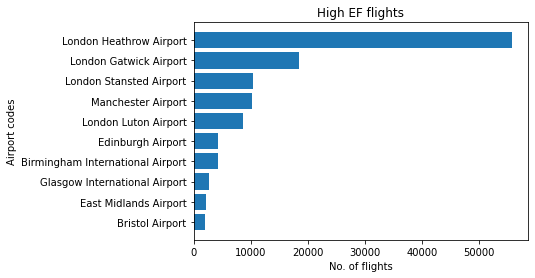

In [1124]:
plt.barh(ahighefftop10.index,ahighefftop10['High EF flights'])
plt.title('High EF flights')
plt.ylabel('Airport codes')
plt.xlabel('No. of flights')
plt.show()

In [1119]:
ahigheffpro = aps.copy()
ahigheffpro = ahigheffpro.dropna()
ahigheffpro = ahigheffpro[ahigheffpro['No. flights']>10000]
ahigheffpro.sort_values(by=['Proportion of flights in High EF(%)'], inplace = True, ascending=True)
ahigheffprotop10 = ahigheffpro.tail(10)
ahigheffprotop10 

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10,7.966643
Leeds Bradford Airport,EGNM,13738,7.155316e+07,3.390697e+17,1199,9.663691e+06,2.827937e+14,3.621799e+17,1662,1.222094e+07,3.188484e+10,12.097831,3.448736e+09,4.030090e+10,8.727617
Liverpool John Lennon Airport,EGGP,16461,6.542151e+07,5.704021e+17,1499,8.854844e+06,3.805218e+14,6.065807e+17,2249,1.228660e+07,5.061274e+10,13.662596,6.562204e+09,7.004618e+10,9.106373
Newcastle Airport,EGNT,18967,1.056958e+08,6.177634e+17,1780,2.118002e+07,3.470581e+14,6.406324e+17,2456,2.093872e+07,3.676572e+10,12.948806,4.323392e+09,4.503002e+10,9.384721
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
East Midlands Airport,EGNX,20948,1.280745e+08,7.163839e+17,2216,3.100627e+07,3.232779e+14,7.346856e+17,2921,2.907607e+07,3.226842e+10,13.944052,4.065776e+09,3.856864e+10,10.578576
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10,10.733075
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127


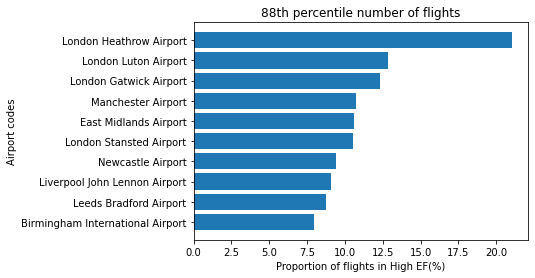

In [1120]:
plt.barh(ahigheffprotop10.index,ahigheffprotop10['Proportion of flights in High EF(%)'])
plt.title('88th percentile number of flights')
plt.ylabel('Airport codes')
plt.xlabel('Proportion of flights in High EF(%)')
plt.show()

##### Energy forcing by airport

In [1127]:
ahighef = aps.copy()
ahighef.sort_values(by=['High EF flights EF'], inplace = True, ascending=True)
ahigheftop10 = ahighef.tail(10)
ahigheftop10 

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10,11.123259,4.276552e+09,6.085028e+10,6.691964
East Midlands Airport,EGNX,20948,1.280745e+08,7.163839e+17,2216,3.100627e+07,3.232779e+14,7.346856e+17,2921,2.907607e+07,3.226842e+10,13.944052,4.065776e+09,3.856864e+10,10.578576
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,3.292883e+09,4.643022e+10,7.254897
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10,11.867102,4.247587e+09,5.439489e+10,7.338070
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10,7.966643
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10,10.733075
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127


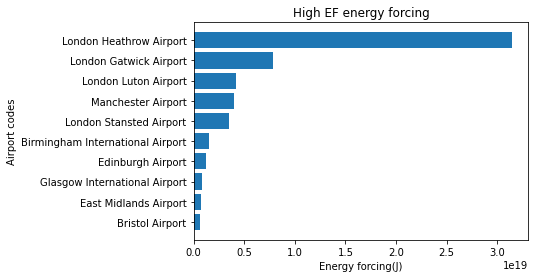

In [1129]:
plt.barh(ahigheftop10.index,ahigheftop10['High EF flights EF'])
plt.title('High EF energy forcing')
plt.ylabel('Airport codes')
plt.xlabel('Energy forcing(J)')
plt.show()

In [1181]:
ahighefefpf = aps.copy()
ahighefefpf = ahighefefpf[ahighefefpf['No. flights']>10000]
ahighefefpf.sort_values(by=['High EF flights EF/fuel'], inplace = True, ascending=False)
ahighefefpftop10 = ahighefefpf.head(10)
ahighefefpftop10 

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
Aberdeen Dyce Airport,EGPD,13836,2.543262e+07,1.294435e+17,411,1.619992e+06,3.149477e+14,1.533781e+17,1126,3.196672e+06,4.648126e+10,8.138190,3.283657e+09,9.703685e+10,2.970512
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
George Best Belfast City Airport,EGAC,10274,1.440693e+07,2.240235e+16,125,3.266444e+05,1.792188e+14,3.088129e+16,367,8.133130e+05,4.055807e+10,3.572124,1.063804e+09,8.168661e+10,1.216663
Liverpool John Lennon Airport,EGGP,16461,6.542151e+07,5.704021e+17,1499,8.854844e+06,3.805218e+14,6.065807e+17,2249,1.228660e+07,5.061274e+10,13.662596,6.562204e+09,7.004618e+10,9.106373
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10,11.123259,4.276552e+09,6.085028e+10,6.691964
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10,11.867102,4.247587e+09,5.439489e+10,7.338070
Belfast International Airport,EGAA,24917,7.994740e+07,3.718859e+17,1230,9.497807e+06,3.023462e+14,4.113641e+17,2219,1.165111e+07,3.693338e+10,8.905566,2.984632e+09,5.412399e+10,4.936389
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10,7.966643
London City Airport,EGLC,31585,6.752292e+07,5.070162e+16,348,1.126197e+06,1.456943e+14,1.095711e+17,2092,5.309836e+06,2.108178e+10,6.623397,1.370084e+09,5.166048e+10,1.101789


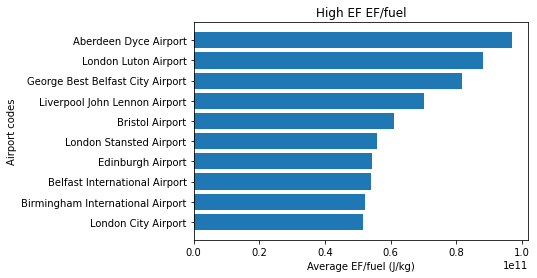

In [1182]:
plt.barh(ahighefefpftop10.index,ahighefefpftop10['High EF flights EF/fuel'])
plt.title('High EF EF/fuel')
plt.gca().invert_yaxis()
plt.ylabel('Airport codes')
plt.xlabel('Average EF/fuel (J/kg)')
plt.show()

##### Energy forcing per flight

In [1164]:
ahighefpf = aps.copy()
ahighefpf = ahighefpf.dropna()
ahighefpf = ahighefpf[ahighefpf['No. flights'] >= 10000]
ahighefpf.sort_values(by=['High EF flights EF/flight'], inplace = True, ascending=True)
ahighefpftop10 = ahighefpf.tail(10)
ahighefpftop10 

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
East Midlands Airport,EGNX,20948,1.280745e+08,7.163839e+17,2216,3.100627e+07,3.232779e+14,7.346856e+17,2921,2.907607e+07,3.226842e+10,13.944052,4.065776e+09,3.856864e+10,10.578576
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,3.292883e+09,4.643022e+10,7.254897
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
Newcastle Airport,EGNT,18967,1.056958e+08,6.177634e+17,1780,2.118002e+07,3.470581e+14,6.406324e+17,2456,2.093872e+07,3.676572e+10,12.948806,4.323392e+09,4.503002e+10,9.384721
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10,7.966643
Liverpool John Lennon Airport,EGGP,16461,6.542151e+07,5.704021e+17,1499,8.854844e+06,3.805218e+14,6.065807e+17,2249,1.228660e+07,5.061274e+10,13.662596,6.562204e+09,7.004618e+10,9.106373
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10,10.733075
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127


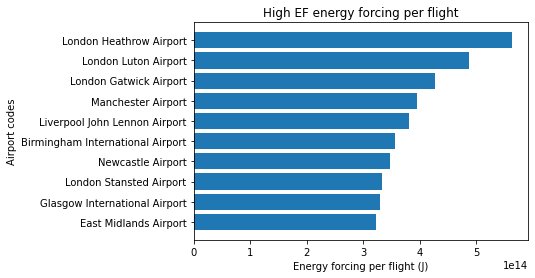

In [1168]:
plt.barh(ahighefpftop10.index,ahighefpftop10['High EF flights EF/flight'])
plt.title('High EF energy forcing per flight')
plt.ylabel('Airport codes')
plt.xlabel('Energy forcing per flight (J)')
plt.show()

##### Fuel demand

In [1166]:
ahigheffuel = aps.copy()
ahigheffuel = ahigheffuel.dropna()
ahigheffuel.sort_values(by=['High EF fuel'], inplace = True, ascending=True)
ahigheffueltop10 = ahigheffuel.tail(10)
ahigheffueltop10 

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
Newcastle Airport,EGNT,18967,1.056958e+08,6.177634e+17,1780,2.118002e+07,3.470581e+14,6.406324e+17,2456,2.093872e+07,3.676572e+10,12.948806,4.323392e+09,4.503002e+10,9.384721
East Midlands Airport,EGNX,20948,1.280745e+08,7.163839e+17,2216,3.100627e+07,3.232779e+14,7.346856e+17,2921,2.907607e+07,3.226842e+10,13.944052,4.065776e+09,3.856864e+10,10.578576
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10,11.867102,4.247587e+09,5.439489e+10,7.338070
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,3.292883e+09,4.643022e+10,7.254897
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10,7.966643
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10,10.733075
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127


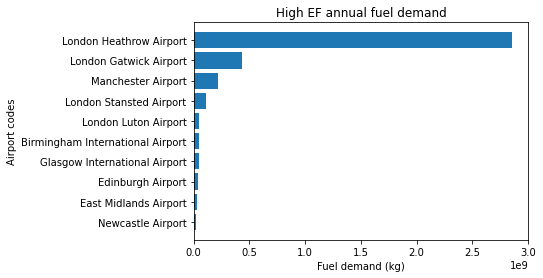

In [1167]:
plt.barh(ahigheffueltop10.index,ahigheffueltop10['High EF fuel'])
plt.title('High EF annual fuel demand')
plt.ylabel('Airport codes')
plt.xlabel('Fuel demand (kg)')
plt.show()

##### Flight duration

In [ ]:
highefflightperd, bins, patches = plt.hist(highef['flight_duration_h'], bins=range(1,15), edgecolor="black")
plt.xlabel('Flight duration (h)')
plt.ylabel('No. of flights')
plt.title('Historgram of high EF flight duration')
plt.show()

In [ ]:
highefflightperd = np.append(highefflightperd,0)
bins = np.append(bins, 15)
flighperdpro = highefflightperd/flightperd*100

binnum = range(14)
plt.title("High EF flights")
plt.xlabel("Flight duration (h)")
plt.ylabel("Proportion of flights (%)")
plt.bar(binnum, flighperdpro)

Over 50% of long haul flights contribute to high EF

##### Daily data

In [1092]:
sun = pd.read_csv('Sun times.csv')

for i in sun.index:
    datetest = sun['Date'][i] + " " + sun['Sunrise'][i]
    element = datetime.strptime(datetest,'%Y-%m-%d %H:%M')
    sun['Sunrise'][i] = element
    datetest = sun['Date'][i] + " " + sun['Sunset'][i]
    element = datetime.strptime(datetest,'%Y-%m-%d %H:%M')
    sun['Sunset'][i] = element
    sun['Date'][i] = datetime.strptime(sun['Date'][i],'%Y-%m-%d')
sun

,Date,Sunrise,Sunset,Daytime
0,2019-01-01 00:00:00,2019-01-01 08:06:00,2019-01-01 16:01:00,07:54
1,2019-01-02 00:00:00,2019-01-02 08:06:00,2019-01-02 16:02:00,07:55
2,2019-01-03 00:00:00,2019-01-03 08:06:00,2019-01-03 16:03:00,07:56
3,2019-01-04 00:00:00,2019-01-04 08:06:00,2019-01-04 16:04:00,07:58
4,2019-01-05 00:00:00,2019-01-05 08:06:00,2019-01-05 16:05:00,07:59
...,...,...,...,...
361,2019-12-28 00:00:00,2019-12-28 08:06:00,2019-12-28 15:57:00,07:50
362,2019-12-29 00:00:00,2019-12-29 08:06:00,2019-12-29 15:58:00,07:51
363,2019-12-30 00:00:00,2019-12-30 08:06:00,2019-12-30 15:59:00,07:52
364,2019-12-31 00:00:00,2019-12-31 08:06:00,2019-12-31 15:59:00,07:53


In [1095]:
df = highef.copy()

dateindex = []

data = {}
daydata = {}
nightdata = {}

thighefflights = []
thigheffuel = []
thighefef = []
thighefpf = []

dhighefflights = []
dhigheffuel = []
dhighefef = []
dhighefpf = []

nhighefflights = []
nhigheffuel = []
nhighefef = []
nhighefpf = []

for i in range(0,365):
    startday = sun.loc[i,'Date']
    endday = sun.loc[i+1,'Date']
    sunrise = sun.loc[i,'Sunrise']
    sunset = sun.loc[i,'Sunset']

    dateindex.append(startday)

    data = df[(df['first_waypoint_time'] < endday) & (df['first_waypoint_time'] > startday)]
    daydata = data[(data['first_waypoint_time'] < sunset) & (data['first_waypoint_time'] > sunrise)]
    nightdata = data[(data['first_waypoint_time'] > sunset) | (data['first_waypoint_time'] < sunrise)]

    thighefflights.append(len(data.index))
    thigheffuel.append(data['total_fuel_burn'].sum())
    thighefef.append(data['total_contrail_energy_forcing'].sum())
    thighefpf.append(data['EF/fuel'].mean())

    dhighefflights.append(len(daydata.index))
    dhigheffuel.append(daydata['total_fuel_burn'].sum())
    dhighefef.append(daydata['total_contrail_energy_forcing'].sum())
    dhighefpf.append(daydata['EF/fuel'].mean())    

    nhighefflights.append(len(nightdata.index))
    nhigheffuel.append(nightdata['total_fuel_burn'].sum())
    nhighefef.append(nightdata['total_contrail_energy_forcing'].sum())
    nhighefpf.append(nightdata['EF/fuel'].mean())

In [1100]:
highefdaily = pd.DataFrame(thighefflights, index = dateindex, columns = ['Total flights'])
highefdaily['Total fuel burn'] = thigheffuel
highefdaily['Total energy forcing'] = thighefef
highefdaily['Total EF/fuel'] = thighefpf

highefdaily['Daytime flights'] = dhighefflights
highefdaily['Daytime fuel burn'] = dhigheffuel
highefdaily['Daytime energy forcing'] = dhighefef
highefdaily['Daytime EF/fuel'] = dhighefpf

highefdaily['Nighttime flights'] = nhighefflights
highefdaily['Nighttime fuel burn'] = nhigheffuel
highefdaily['Nighttime energy forcing'] = nhighefef
highefdaily['Nighttime EF/fuel'] = nhighefpf

highefdaily

,Total flights,Total fuel burn,Total energy forcing,Total EF/fuel,Daytime flights,Daytime fuel burn,Daytime energy forcing,Daytime EF/fuel,Nighttime flights,Nighttime fuel burn,Nighttime energy forcing,Nighttime EF/fuel
2019-01-01,91,5.510996e+06,3.794830e+16,1.322837e+10,52,3.126534e+06,1.849494e+16,9.490456e+09,39,2.384462e+06,1.945336e+16,1.821226e+10
2019-01-02,205,1.233479e+07,1.317836e+17,1.303833e+10,118,6.927190e+06,7.638501e+16,1.204391e+10,87,5.407600e+06,5.539860e+16,1.438708e+10
2019-01-03,262,1.322410e+07,1.990993e+17,3.132469e+10,148,7.741998e+06,1.308505e+17,2.985393e+10,114,5.482105e+06,6.824882e+16,3.323409e+10
2019-01-04,659,1.790274e+07,2.900453e+17,5.048895e+10,379,9.995337e+06,1.816055e+17,5.753026e+10,280,7.907408e+06,1.084398e+17,4.095802e+10
2019-01-05,185,8.580241e+06,1.090202e+17,2.423665e+10,114,4.842923e+06,7.402213e+16,2.564161e+10,71,3.737318e+06,3.499803e+16,2.198079e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,502,1.385356e+07,2.656011e+17,4.467541e+10,287,8.651879e+06,1.605635e+17,3.903990e+10,215,5.201677e+06,1.050377e+17,5.219816e+10
2019-12-28,749,1.660733e+07,3.003361e+17,5.367288e+10,422,9.529668e+06,1.900510e+17,6.089939e+10,327,7.077665e+06,1.102851e+17,4.434693e+10
2019-12-29,540,1.344944e+07,2.177991e+17,4.921017e+10,248,7.533894e+06,9.906756e+16,3.598625e+10,292,5.915543e+06,1.187315e+17,6.044145e+10
2019-12-30,253,1.241823e+07,1.472074e+17,2.093959e+10,144,7.240877e+06,6.951814e+16,1.642418e+10,109,5.177357e+06,7.768926e+16,2.690490e+10


##### Monthly data

In [1101]:
highefmonthly = highefdaily.copy()
highefmonthly = highefmonthly.resample('M', label = 'right').sum()
highefmonthly

,Total flights,Total fuel burn,Total energy forcing,Total EF/fuel,Daytime flights,Daytime fuel burn,Daytime energy forcing,Daytime EF/fuel,Nighttime flights,Nighttime fuel burn,Nighttime energy forcing,Nighttime EF/fuel
2019-01-31,11509,3.935332e+08,6.554873e+18,1.168479e+12,6106,2.119671e+08,3.576882e+18,1.102706e+12,5403,1.815661e+08,2.977991e+18,1.207594e+12
2019-02-28,11641,3.600026e+08,6.390048e+18,1.369912e+12,6358,1.900325e+08,3.574230e+18,1.300431e+12,5283,1.699701e+08,2.815819e+18,1.430819e+12
2019-03-31,11043,3.455546e+08,5.320233e+18,1.221752e+12,7713,2.162325e+08,3.706270e+18,1.213991e+12,3329,1.293180e+08,1.613870e+18,1.217071e+12
2019-04-30,6796,2.555019e+08,3.190878e+18,1.031393e+12,5492,1.946604e+08,2.566673e+18,1.061033e+12,1304,6.084159e+07,6.242045e+17,9.066515e+11
2019-05-31,9460,2.928189e+08,3.436359e+18,9.410001e+11,8452,2.440784e+08,3.000375e+18,9.717284e+11,1008,4.874053e+07,4.359846e+17,7.524001e+11
2019-06-30,8224,2.670466e+08,2.694369e+18,7.114451e+11,7540,2.380643e+08,2.415778e+18,7.013518e+11,684,2.898232e+07,2.785910e+17,8.005202e+11
2019-07-31,8706,2.788016e+08,2.682748e+18,7.311204e+11,7900,2.480835e+08,2.371585e+18,7.099839e+11,806,3.071805e+07,3.111629e+17,8.378661e+11
2019-08-31,10652,3.111523e+08,3.470313e+18,8.737040e+11,9026,2.528723e+08,2.814492e+18,8.422381e+11,1626,5.828005e+07,6.558212e+17,1.028377e+12
2019-09-30,11509,3.198514e+08,4.484334e+18,1.051014e+12,8894,2.385591e+08,3.413640e+18,1.031676e+12,2615,8.129237e+07,1.070695e+18,1.086398e+12
2019-10-31,13983,3.467918e+08,6.217140e+18,1.336205e+12,9568,2.282128e+08,4.240682e+18,1.316813e+12,4415,1.185790e+08,1.976458e+18,1.365078e+12


<BarContainer object of 12 artists>

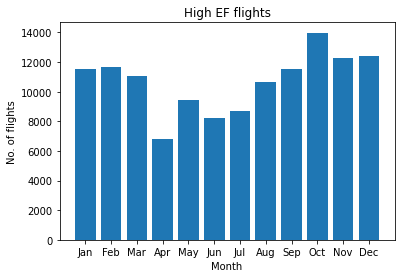

In [1152]:
monthnum = range(12)
plt.title("High EF flights")
plt.xlabel("Month")
plt.ylabel("No. of flights")
plt.xticks(monthnum, months)
plt.bar(monthnum, highefmonthly['Total flights'])

<BarContainer object of 12 artists>

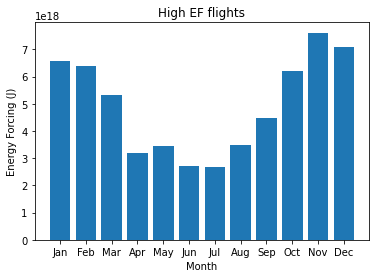

In [1158]:
monthnum = range(12)
plt.title("High EF flights")
plt.xlabel("Month")
plt.ylabel("Energy Forcing (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum, highefmonthly['Total energy forcing'])

##### Temporal differences

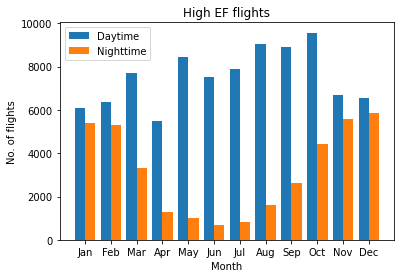

In [1151]:
monthnum = np.arange(len(months))
plt.title("High EF flights")
plt.xlabel("Month")
plt.ylabel("No. of flights")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, highefmonthly['Daytime flights'],0.4)
plt.bar(monthnum + 0.2, highefmonthly['Nighttime flights'],0.4)
plt.legend(['Daytime','Nighttime'])

<BarContainer object of 12 artists>

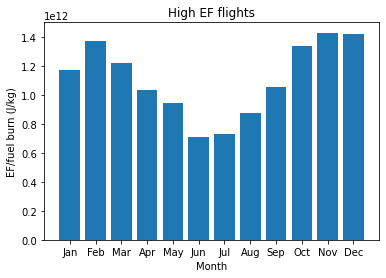

In [1155]:
monthnum = range(12)
plt.title("High EF flights")
plt.xlabel("Month")
plt.ylabel("EF/fuel burn (J/kg)")
plt.xticks(monthnum, months)
plt.bar(monthnum, highefmonthly['Total EF/fuel'])

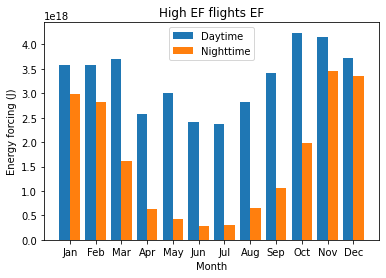

In [1131]:
monthnum = np.arange(len(months))
plt.title("High EF flights EF")
plt.xlabel("Month")
plt.ylabel("Energy forcing (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, highefmonthly['Daytime energy forcing'],0.4)
plt.bar(monthnum + 0.2, highefmonthly['Nighttime energy forcing'],0.4)
plt.legend(['Daytime','Nighttime'])

In [1134]:
highefmonthhourflights = pd.DataFrame(index = hours,columns = months)
highefmonthhouref = pd.DataFrame(index = hours,columns = months)
highefmonthhourefpf = pd.DataFrame(index = hours,columns = months)

for i in np.arange(0,12):
    dfm = highef[highef['first_waypoint_time'].dt.month == i+1]
    for j in hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        highefmonthhourflights.iloc[j,i] = len(dfh.index)
        highefmonthhouref.iloc[j,i] = dfh['total_contrail_energy_forcing'].sum()
        highefmonthhourefpf.iloc[j,i] = dfh['EF/fuel'].mean()

Text(0.5, 1.0, 'No. flights')

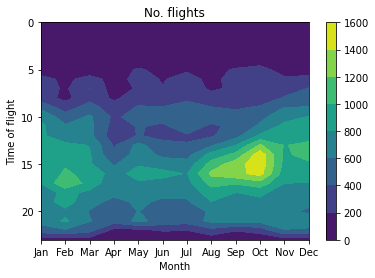

In [1123]:
plt.contourf(highefmonthhourflights.columns,highefmonthhourflights.index,highefmonthhourflights.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('No. flights')

Text(0.5, 1.0, 'Energy forcing (J)')

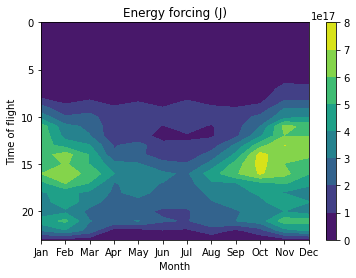

In [1133]:
plt.contourf(highefmonthhouref.columns,highefmonthhouref.index,highefmonthhouref.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('Energy forcing (J)')

Text(0.5, 1.0, 'EF/fuel (J/kg)')

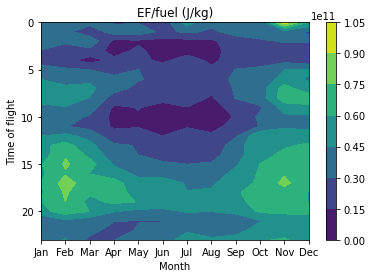

In [1135]:
plt.contourf(highefmonthhourefpf.columns,highefmonthhourefpf.index,highefmonthhourefpf.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('EF/fuel (J/kg)')

##### Proportion of High EF flights

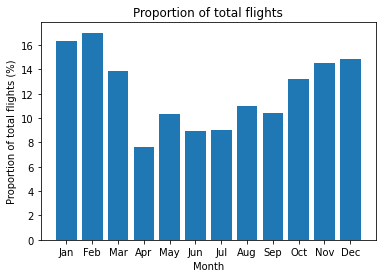

In [1106]:
highefmonthly['Proportion of total flights (%)'] = highefmonthly['Total flights']/jetamonthly['No. flights']*100

monthnum = range(12)
plt.title("Proportion of total flights")
plt.xlabel("Month")
plt.ylabel("Proportion of total flights (%)")
plt.xticks(monthnum, months)
plt.bar(monthnum, highefmonthly['Proportion of total flights (%)'])
monthnum = np.arange(len(months))

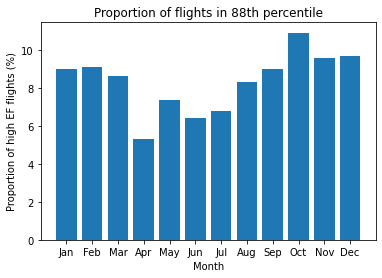

In [1105]:
highefmonthly['Proportion of high EF flights (%)'] = highefmonthly['Total flights']/highefmonthly['Total flights'].sum()*100

monthnum = range(12)
plt.title("Proportion of flights in 88th percentile")
plt.xlabel("Month")
plt.ylabel("Proportion of high EF flights (%)")
plt.xticks(monthnum, months)
plt.bar(monthnum, highefmonthly['Proportion of high EF flights (%)'])
monthnum = np.arange(len(months))

##### Destination distribution

In [440]:
for i in dname:
    df = highef[highef['destination_country'] == i]
    dnamed.loc[i,'High EF flights'] = len(df.index)
    dnamed.loc[i,'High EF fuel'] = df['total_fuel_burn'].sum()
    dnamed.loc[i,'High EF EF'] = df['total_contrail_energy_forcing'].sum()
    dnamed.loc[i,'High EF average EF/fuel'] = df['EF/fuel'].mean()

dnamed

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel
US,61420.0,3.383175e+09,1.364965e+19,4.082188e+09,23843.0,1.438041e+09,1.442720e+19,1.103035e+10
SG,3159.0,4.155193e+08,1.351607e+18,3.323037e+09,2039.0,2.698398e+08,1.360206e+18,5.176423e+09
KR,1402.0,9.548339e+07,3.388512e+17,3.830452e+09,504.0,3.501152e+07,3.382096e+17,1.065525e+10
PK,1240.0,5.732011e+07,3.747006e+17,6.422828e+09,577.0,2.742937e+07,3.688901e+17,1.357261e+10
CN,4679.0,2.906797e+08,1.880203e+18,6.409309e+09,2405.0,1.581176e+08,1.894568e+18,1.254082e+10
...,...,...,...,...,...,...,...,...
ML,1.0,1.453404e+04,6.725588e+12,4.627473e+08,0.0,0.000000e+00,0.000000e+00,NaN
CW,1.0,4.801227e+04,9.495953e+14,1.977818e+10,1.0,4.801227e+04,9.495953e+14,1.977818e+10
CI,2.0,1.369196e+04,1.102562e+14,9.311802e+09,1.0,5.917183e+03,1.100180e+14,1.859297e+10
MM,2.0,3.135156e+04,8.846253e+13,2.822304e+09,0.0,0.000000e+00,0.000000e+00,NaN


In [266]:
dhigheff = dnamed.copy()
dhigheff = dhigheff.dropna()
dhigheff.sort_values(by=['High EF flights'], inplace = True, ascending=True)
dhighefftop10 = dhigheff.tail(10)
dhighefftop10

,No. flights,Annual fuel demand,Annual EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel
AE,12050.0,7.093414e+08,1.371235e+18,1467.0,8.050813e+07,1.048430e+18,1.381990e+10,3018.0,1.779366e+08,1.336331e+18,8.263201e+09
PL,24468.0,1.098279e+08,1.589122e+18,5076.0,2.300743e+07,1.661683e+18,7.259389e+10,3461.0,1.590505e+07,1.584723e+18,1.012989e+11
GR,21907.0,1.748606e+08,1.308185e+18,4247.0,3.553128e+07,1.379926e+18,3.948887e+10,3472.0,2.947055e+07,1.333346e+18,4.654344e+10
PT,28850.0,1.641782e+08,1.302321e+18,5253.0,3.050804e+07,1.465599e+18,4.882112e+10,3804.0,2.254961e+07,1.390429e+18,6.370210e+10
GB,183696.0,2.805953e+08,9.549837e+17,10894.0,2.339659e+07,1.075946e+18,4.540592e+10,3846.0,8.931125e+06,8.286614e+17,9.560715e+10
DE,65804.0,1.881998e+08,1.439363e+18,9586.0,2.859485e+07,1.565657e+18,5.666805e+10,4737.0,1.525641e+07,1.376599e+18,9.882930e+10
TR,18767.0,1.894537e+08,2.376106e+18,5687.0,5.618524e+07,2.406563e+18,4.526972e+10,5139.0,5.203689e+07,2.374001e+18,4.929453e+10
IT,56357.0,2.367983e+08,1.752259e+18,9310.0,3.934684e+07,1.908525e+18,4.963136e+10,5364.0,2.345014e+07,1.729823e+18,7.745404e+10
ES,136328.0,8.319381e+08,4.841423e+18,23274.0,1.467982e+08,5.673500e+18,4.184335e+10,16320.0,1.102189e+08,5.323729e+18,5.534284e+10
US,61420.0,3.383175e+09,1.364965e+19,13805.0,7.886830e+08,1.244490e+19,1.676974e+10,23843.0,1.438041e+09,1.442720e+19,1.103035e+10


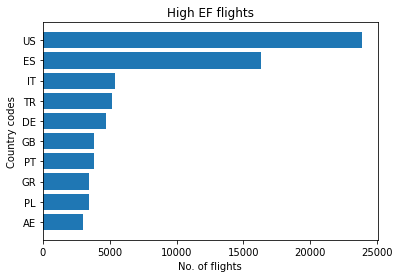

In [267]:
plt.barh(dhighefftop10.index,dhighefftop10['High EF flights'])
plt.title('High EF flights')
plt.ylabel('Country codes')
plt.xlabel('No. of flights')
plt.show()

In [1162]:
dhighefef = dnamed.copy()
dhighefef = dhighefef.dropna()
dhighefef.sort_values(by=['High EF EF'], inplace = True, ascending=True)
dhighefeftop10 = dhighefef.tail(10)
dhighefeftop10

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),ISO3,Luton flights,Luton EF/fuel
DE,65804.0,1.881998e+08,1.439363e+18,7.547695e+09,4737.0,1.525641e+07,1.376599e+18,9.882930e+10,9586.0,2.859485e+07,1.565657e+18,5.666805e+10,14.567503,DEU,2189.0,6.104969e+09
PT,28850.0,1.641782e+08,1.302321e+18,7.966225e+09,3804.0,2.254961e+07,1.390429e+18,6.370210e+10,5253.0,3.050804e+07,1.465599e+18,4.882112e+10,18.207972,PRT,2465.0,1.167301e+10
RO,9682.0,6.196058e+07,1.405638e+18,2.261110e+10,2568.0,1.678364e+07,1.410204e+18,8.551760e+10,3170.0,2.059094e+07,1.443519e+18,7.096450e+10,32.741169,ROU,5288.0,2.369875e+10
PL,24468.0,1.098279e+08,1.589122e+18,1.440368e+10,3461.0,1.590505e+07,1.584723e+18,1.012989e+11,5076.0,2.300743e+07,1.661683e+18,7.259389e+10,20.745463,POL,5117.0,2.485258e+10
IT,56357.0,2.367983e+08,1.752259e+18,7.534472e+09,5364.0,2.345014e+07,1.729823e+18,7.745404e+10,9310.0,3.934684e+07,1.908525e+18,4.963136e+10,16.519687,ITA,3675.0,6.260292e+09
CN,4679.0,2.906797e+08,1.880203e+18,6.409309e+09,2405.0,1.581176e+08,1.894568e+18,1.254082e+10,1505.0,9.652701e+07,1.697485e+18,1.811506e+10,32.164993,CHN,12.0,1.792982e+08
HK,3928.0,3.390291e+08,2.008648e+18,5.837906e+09,2556.0,2.292082e+08,2.015337e+18,8.988332e+09,1456.0,1.294806e+08,1.727301e+18,1.358027e+10,37.067210,HKG,28.0,3.461375e+09
TR,18767.0,1.894537e+08,2.376106e+18,1.350584e+10,5139.0,5.203689e+07,2.374001e+18,4.929453e+10,5687.0,5.618524e+07,2.406563e+18,4.526972e+10,30.303192,TUR,507.0,5.138031e+09
ES,136328.0,8.319381e+08,4.841423e+18,6.246212e+09,16320.0,1.102189e+08,5.323729e+18,5.534284e+10,23274.0,1.467982e+08,5.673500e+18,4.184335e+10,17.072061,ESP,7274.0,5.937399e+09
US,61420.0,3.383175e+09,1.364965e+19,4.082188e+09,23843.0,1.438041e+09,1.442720e+19,1.103035e+10,13805.0,7.886830e+08,1.244490e+19,1.676974e+10,22.476392,USA,1002.0,5.203324e+09


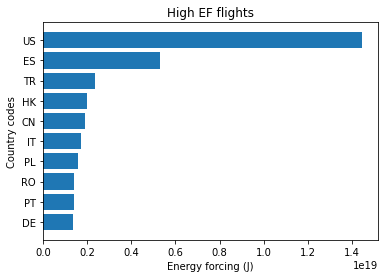

In [1163]:
plt.barh(dhighefeftop10.index,dhighefeftop10['High EF EF'])
plt.title('High EF flights')
plt.ylabel('Country codes')
plt.xlabel('Energy forcing (J)')
plt.show()

In [1171]:
dhighefefpf = dnamed.copy()
dhighefefpf = dhighefefpf.dropna()
dhighefefpf = dhighefefpf[dhighefefpf['High EF flights'] > 1000]
dhighefefpf.sort_values(by=['High EF average EF/fuel'], inplace = True, ascending=True)
dhighefefpftop10 = dhighefefpf.tail(10)
dhighefefpftop10 

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),ISO3,Luton flights,Luton EF/fuel
IT,56357.0,2.367983e+08,1.752259e+18,7.534472e+09,5364.0,2.345014e+07,1.729823e+18,7.745404e+10,9310.0,3.934684e+07,1.908525e+18,4.963136e+10,16.519687,ITA,3675.0,6.260292e+09
FR,55424.0,1.453544e+08,6.549809e+17,3.799873e+09,2452.0,8.191194e+06,6.619189e+17,8.461446e+10,4998.0,1.560010e+07,7.613632e+17,4.892831e+10,9.017754,FRA,4892.0,3.268561e+09
RU,4704.0,4.040189e+07,1.057921e+18,2.831490e+10,1579.0,1.414333e+07,1.072956e+18,8.497773e+10,1784.0,1.527410e+07,1.083470e+18,7.641165e+10,37.925170,RUS,515.0,4.920888e+10
RO,9682.0,6.196058e+07,1.405638e+18,2.261110e+10,2568.0,1.678364e+07,1.410204e+18,8.551760e+10,3170.0,2.059094e+07,1.443519e+18,7.096450e+10,32.741169,ROU,5288.0,2.369875e+10
CH,26305.0,7.300307e+07,5.080887e+17,6.965593e+09,1813.0,5.375495e+06,4.779147e+17,9.370185e+10,3916.0,1.113094e+07,5.605816e+17,5.159334e+10,14.886904,CHE,2308.0,6.452350e+09
GB,183696.0,2.805953e+08,9.549837e+17,2.385907e+09,3846.0,8.931125e+06,8.286614e+17,9.560715e+10,10894.0,2.339659e+07,1.075946e+18,4.540592e+10,5.930450,GBR,4930.0,3.014339e+09
HU,7901.0,3.773690e+07,7.195242e+17,1.879173e+10,1527.0,7.509466e+06,7.121019e+17,9.604101e+10,2127.0,1.035960e+07,7.411381e+17,7.187365e+10,26.920643,HUN,1785.0,3.078260e+10
AT,8823.0,3.466363e+07,4.141228e+17,1.202450e+10,1083.0,4.423468e+06,4.098833e+17,9.674305e+10,1830.0,7.289844e+06,4.431414e+17,6.211745e+10,20.741244,AUT,371.0,7.370138e+09
DE,65804.0,1.881998e+08,1.439363e+18,7.547695e+09,4737.0,1.525641e+07,1.376599e+18,9.882930e+10,9586.0,2.859485e+07,1.565657e+18,5.666805e+10,14.567503,DEU,2189.0,6.104969e+09
PL,24468.0,1.098279e+08,1.589122e+18,1.440368e+10,3461.0,1.590505e+07,1.584723e+18,1.012989e+11,5076.0,2.300743e+07,1.661683e+18,7.259389e+10,20.745463,POL,5117.0,2.485258e+10


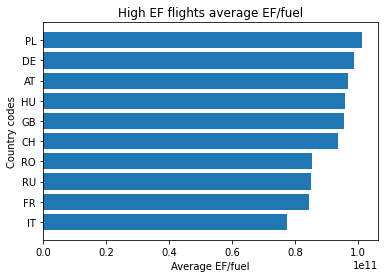

In [1172]:
plt.barh(dhighefefpftop10.index,dhighefefpftop10['High EF average EF/fuel'])
plt.title('High EF flights average EF/fuel')
plt.ylabel('Country codes')
plt.xlabel('Average EF/fuel')
plt.show()

#### High EF/fuel

##### Fuel burn-EF CDF plot

In [ ]:
efpfsort = alljeta.copy()
efpfsort.sort_values(by = ['EF/fuel'], inplace = True, ascending = True)
efpfsort = efpfsort[efpfsort['EF/fuel'].notna()]
efpfsort

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
260340,A320,Jet,EGLL,London Heathrow Airport,GB,GI,2019-04-15 06:44:54.853,2.48,1794.79,0.853914,6391.050310,V2527-A5,65031.068277,4.227499e+15,-2.838520e+15,-4.441398e+11
268945,A320,Jet,EGKK,London Gatwick Airport,GB,ES,2019-04-18 05:53:05.000,1.55,1001.99,0.852573,3413.362691,V2527-A5,63022.452747,4.803446e+15,-1.476306e+15,-4.325078e+11
34834,A319,Jet,EGLL,London Heathrow Airport,GB,IT,2019-01-16 07:42:42.000,1.52,1118.95,0.821245,3276.579472,V2522-A5,58299.069862,5.060597e+15,-1.215287e+15,-3.709011e+11
109251,A319,Jet,EGLL,London Heathrow Airport,GB,DE,2019-02-17 08:17:35.000,1.02,765.47,0.832036,2419.554713,V2522-A5,58454.121527,5.009078e+15,-8.844257e+14,-3.655324e+11
109357,A321,Jet,EGBB,Birmingham International Airport,GB,PL,2019-02-17 08:35:06.575,1.98,1574.02,0.832036,5342.893639,V2533-A5,71882.188037,4.083774e+15,-1.750496e+15,-3.276306e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883461,GLEX,Jet,EGGW,London Luton Airport,GB,RU,2019-10-26 12:50:15.871,2.79,2565.36,0.842370,4197.727904,BR700-710A2-20,29053.992022,7.781037e+15,5.648098e+15,1.345513e+12
880728,CL60,Jet,EGGW,London Luton Airport,GB,RU,2019-10-25 15:51:37.546,3.07,2597.90,0.842669,2651.080068,CF34-3B,13512.033079,4.395755e+15,3.599446e+15,1.357728e+12
838504,CL60,Jet,EGGW,London Luton Airport,GB,RU,2019-10-13 12:13:14.000,2.95,2598.77,0.845595,2758.473136,CF34-3B,13671.406194,4.297773e+15,3.942273e+15,1.429150e+12
1031449,A321,Jet,EGKK,London Gatwick Airport,GB,PL,2019-12-16 21:35:23.103,1.62,1372.13,0.848393,4370.265140,V2533-A5,71779.444616,4.320647e+15,6.248954e+15,1.429880e+12


In [122]:
efpfsort['total_fuel_burn'].cumsum()
data = efpfsort['total_fuel_burn']
totalfuel = data.sum()
x = data.cumsum()/totalfuel
y = efpfsort['EF/fuel']

In [ ]:
plt.plot(x, y)
plt.xlabel('Percentage of total fuel demand')
plt.ylabel('EF/fuel')
plt.grid()
plt.xticks(np.arange(0, 1.1, 0.1))

In [ ]:
a = abs(x-0.8)
x[a == a.min()]

80th percentile = 238320

In [120]:
twentypercentfuel = efpfsort.loc[238320:]

In [121]:
b = efpfsort.loc[238320]['EF/fuel']
percentile = stats.percentileofscore(efpfsort['EF/fuel'], b)
percentile

86.14070179609556

20% fuel demand is at 86.14070179609556 percentile

##### Percentile

In [1264]:
fourteenpercent = alljeta['EF/fuel'].quantile(0.86)
highefpf = alljeta[alljeta['EF/fuel'] > fourteenpercent]

In [89]:
highefpf['total_fuel_burn'].sum()

2396938960.368633

##### Flight duration

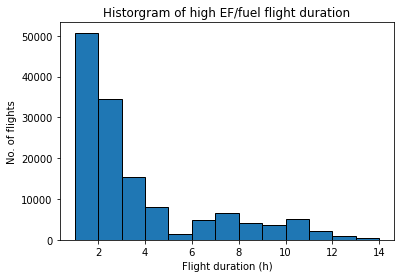

In [68]:
highefpfflightperd, bins, patches = plt.hist(highefpf['flight_duration_h'], bins=range(1,15), edgecolor="black")
plt.xlabel('Flight duration (h)')
plt.ylabel('No. of flights')
plt.title('Historgram of high EF/fuel flight duration')
plt.show()

<BarContainer object of 14 artists>

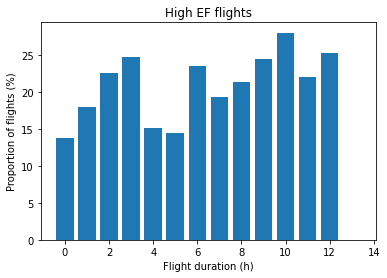

In [69]:
highefpfflightperd = np.append(highefpfflightperd,0)
bins = np.append(bins, 15)
flighperdpro = highefpfflightperd/flightperd*100

binnum = range(14)
plt.title("High EF flights")
plt.xlabel("Flight duration (h)")
plt.ylabel("Proportion of flights (%)")
plt.bar(binnum, flighperdpro)

##### Airports with the most high EF/fuel flights

In [109]:
highefpfinter = {}
highefpfflight = {}
highefpffuel = {}
highefpfefpf = {}

for i in apcode:
    df = highefpf[highefpf['origin_airport'] == i]
    highefpfinter[i] = df['total_contrail_energy_forcing'].sum()
    highefpfflight[i] = len(df.index)
    highefpffuel[i] = df['total_fuel_burn'].sum()
    highefpfefpf[i] = df['EF/fuel'].mean()

aps['High EF/fuel EF'] = highefpfinter.values()
aps['High EF/fuel flights'] = highefpfflight.values()
aps['High EF/fuel fuel'] = highefpffuel.values()
aps['High EF/fuel average EF/fuel'] = highefpfefpf.values()

In [1225]:
aps['Proportion of flights in High EF/fuel (%)'] = aps['High EF/fuel flights']/aps['No. flights']*100

In [111]:
ahighefpff = aps.copy()
ahighefpff = ahighefpff.dropna()
ahighefpff.sort_values(by=['High EF/fuel flights'], inplace = True, ascending=True)
ahighefpfftop10 = ahighefpff.tail(10)
ahighefpfftop10 

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel
East Midlands Airport,EGNX,20948,1.280745e+08,7.163839e+17,2216,3.100627e+07,3.232779e+14,7.346856e+17,2921,2.907607e+07,3.226842e+10
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10


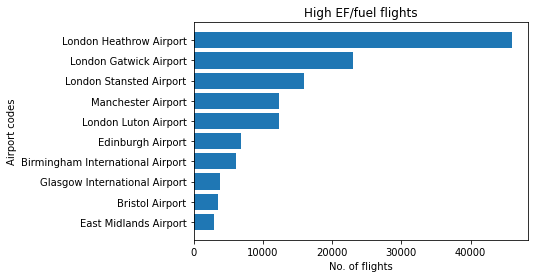

In [112]:
plt.barh(ahighefpfftop10.index,ahighefpfftop10['High EF/fuel flights'])
plt.title('High EF/fuel flights')
plt.ylabel('Airport codes')
plt.xlabel('No. of flights')
plt.show()

In [1494]:
ahighefpfef = aps.copy()
ahighefpfef = ahighefpfef.dropna()
ahighefpfef.sort_values(by=['High EF/fuel EF'], inplace = True, ascending=True)
ahighefpfeftop10 = ahighefpfef.tail(10)
ahighefpfeftop10 

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10,11.123259,4.276552e+09,6.085028e+10,6.691964
East Midlands Airport,EGNX,20948,1.280745e+08,7.163839e+17,2216,3.100627e+07,3.232779e+14,7.346856e+17,2921,2.907607e+07,3.226842e+10,13.944052,4.065776e+09,3.856864e+10,10.578576
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,3.292883e+09,4.643022e+10,7.254897
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10,11.867102,4.247587e+09,5.439489e+10,7.338070
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10,7.966643
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10,10.733075
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127


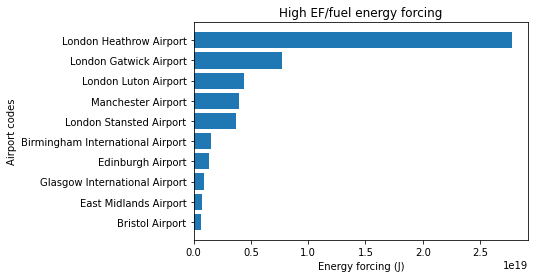

In [1495]:
plt.barh(ahighefpfeftop10.index,ahighefpfeftop10['High EF/fuel EF'])
plt.title('High EF/fuel energy forcing')
plt.ylabel('Airport codes')
plt.xlabel('Energy forcing (J)')
plt.show()

In [1194]:
ahighefpfefpf = aps.copy()
ahighefpfefpf = ahighefpfefpf.dropna()
ahighefpfefpf = ahighefpfefpf[ahighefpfefpf['No. flights'] > 1000]
ahighefpfefpf.sort_values(by=['High EF/fuel average EF/fuel'], inplace = True, ascending=True)
ahighefpfefpftop10 = ahighefpfefpf.tail(10)
ahighefpfefpftop10 

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10,11.123259,4.276552e+09,6.085028e+10,6.691964
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127
Teesside International Airport,EGNV,1655,1.847785e+06,7.573287e+15,16,8.829492e+04,4.733304e+14,9.511004e+15,100,1.978162e+05,4.470544e+10,6.042296,2.444833e+09,1.718459e+11,0.966767
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
Humberside Airport,EGNJ,1626,1.726265e+06,6.988136e+15,8,6.640034e+04,8.735169e+14,7.575247e+15,31,1.010845e+05,4.530576e+10,1.906519,8.138932e+08,9.986050e+10,0.492005
Aberdeen Dyce Airport,EGPD,13836,2.543262e+07,1.294435e+17,411,1.619992e+06,3.149477e+14,1.533781e+17,1126,3.196672e+06,4.648126e+10,8.138190,3.283657e+09,9.703685e+10,2.970512
Newquay Cornwall Airport,EGHQ,2550,2.500845e+06,9.336828e+15,29,1.295535e+05,3.219596e+14,1.000804e+16,50,1.990792e+05,4.652159e+10,1.960784,8.951743e+08,7.163126e+10,1.137255
Liverpool John Lennon Airport,EGGP,16461,6.542151e+07,5.704021e+17,1499,8.854844e+06,3.805218e+14,6.065807e+17,2249,1.228660e+07,5.061274e+10,13.662596,6.562204e+09,7.004618e+10,9.106373
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
Robin Hood Doncaster Sheffield Airport,EGCN,4477,2.631744e+07,3.932263e+17,780,5.767772e+06,5.041362e+14,4.038943e+17,1026,6.627825e+06,6.921057e+10,22.917132,1.550062e+10,8.734982e+10,17.422381


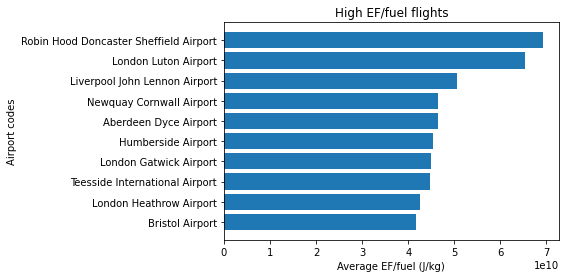

In [1195]:
plt.barh(ahighefpfefpftop10.index,ahighefpfefpftop10['High EF/fuel average EF/fuel'])
plt.title('High EF/fuel flights')
plt.ylabel('Airport codes')
plt.xlabel('Average EF/fuel (J/kg)')
plt.show()

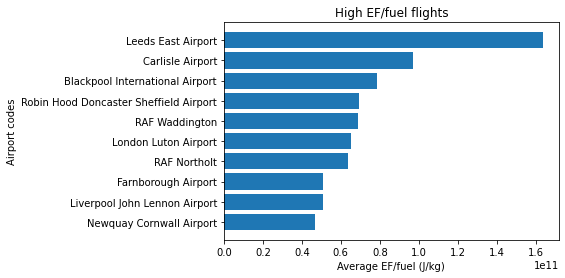

In [117]:
plt.barh(ahighefpfefpftop10.index,ahighefpfefpftop10['High EF/fuel average EF/fuel'])
plt.title('High EF/fuel flights')
plt.ylabel('Airport codes')
plt.xlabel('Average EF/fuel (J/kg)')
plt.show()

In [1190]:
ahighefpfpro = aps.copy()
ahighefpfpro = ahighefpfpro.dropna()
ahighefpfpro = ahighefpfpro[ahighefpfpro['No. flights'] > 1000]
ahighefpfpro.sort_values(by=['Proportion of flights in High EF/fuel (%)'], inplace = True, ascending=True)
ahighefpfprotop10 = ahighefpfpro.tail(10)
ahighefpfprotop10 

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
Newcastle Airport,EGNT,18967,1.056958e+08,6.177634e+17,1780,2.118002e+07,3.470581e+14,6.406324e+17,2456,2.093872e+07,3.676572e+10,12.948806,4.323392e+09,4.503002e+10,9.384721
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10,10.733075
Liverpool John Lennon Airport,EGGP,16461,6.542151e+07,5.704021e+17,1499,8.854844e+06,3.805218e+14,6.065807e+17,2249,1.228660e+07,5.061274e+10,13.662596,6.562204e+09,7.004618e+10,9.106373
East Midlands Airport,EGNX,20948,1.280745e+08,7.163839e+17,2216,3.100627e+07,3.232779e+14,7.346856e+17,2921,2.907607e+07,3.226842e+10,13.944052,4.065776e+09,3.856864e+10,10.578576
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
Glasgow Prestwick Airport,EGPK,2341,2.214612e+07,1.124729e+17,346,3.053729e+06,3.250660e+14,1.171720e+17,437,3.466706e+06,3.622117e+10,18.667236,6.198675e+09,4.335532e+10,14.780009
Robin Hood Doncaster Sheffield Airport,EGCN,4477,2.631744e+07,3.932263e+17,780,5.767772e+06,5.041362e+14,4.038943e+17,1026,6.627825e+06,6.921057e+10,22.917132,1.550062e+10,8.734982e+10,17.422381


In [ ]:
ahighefpfpro = aps.copy()
ahighefpfpro = ahighefpfpro.dropna()
ahighefpfpro = ahighefpfpro[ahighefpfpro['No. flights'] > 1000]
ahighefpfpro.sort_values(by=['Proportion of flights in High EF/fuel (%)'], inplace = True, ascending=True)
ahighefpfprotop10 = ahighefpfpro.tail(10)
ahighefpfprotop10 

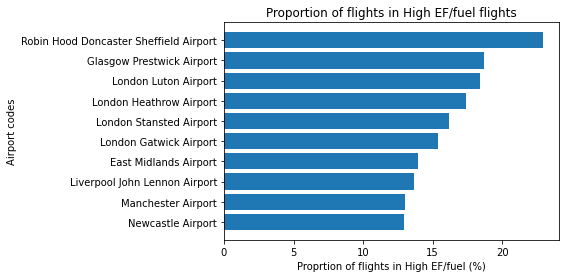

In [122]:
plt.barh(ahighefpfprotop10.index,ahighefpfprotop10['Proportion of flights in High EF/fuel (%)'])
plt.title('Proportion of flights in High EF/fuel flights')
plt.ylabel('Airport codes')
plt.xlabel('Proprtion of flights in High EF/fuel (%)')
plt.show()

In [113]:
heathrowhourly = highefpf.copy()
heathrowhourly = heathrowhourly[heathrowhourly['origin_airport'] == 'EGLL']
heathrowhourly = heathrowhourly.set_index(heathrowhourly['first_waypoint_time'].values)
count = heathrowhourly.resample('H').count()
mean = heathrowhourly.resample('H').mean()
heathrowhourly = heathrowhourly.resample('H', label = 'left').sum()
heathrowhourly['No. flights'] = count['aircraft_type_icao'].values
heathrowhourly['EF/fuel'] = mean['EF/fuel'].values

hours = np.arange(0,24)
heathrowhourlydata = pd.DataFrame(index = hours, columns = heathrowhourly.columns)

for i in hours:
    heathrowhourlydata.iloc[i,:] = heathrowhourly[heathrowhourly.index.hour == i].sum()
    heathrowhourlydata.loc[i,'EF/fuel'] = heathrowhourly[heathrowhourly.index.hour == i].mean()['EF/fuel']

<BarContainer object of 24 artists>

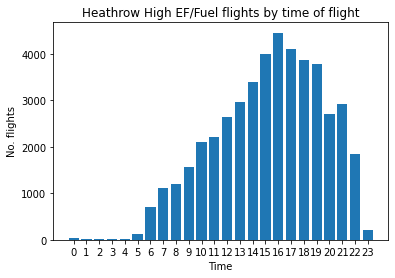

In [114]:
hournum = range(24)
plt.title("Heathrow High EF/Fuel flights by time of flight")
plt.xlabel("Time")
plt.ylabel("No. flights")
plt.xticks(hournum, hours)
plt.bar(hournum, heathrowhourlydata['No. flights'])

<BarContainer object of 24 artists>

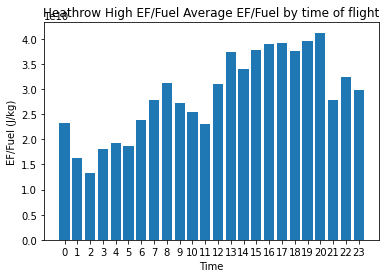

In [46]:
hournum = range(24)
plt.title("Heathrow High EF/Fuel Average EF/Fuel by time of flight")
plt.xlabel("Time")
plt.ylabel("EF/Fuel (J/kg)")
plt.xticks(hournum, hours)  
plt.bar(hournum, heathrowhourlydata['EF/fuel'])

In [ ]:
gatwickhourly = highefpf.copy()
gatwickhourly = gatwickhourly[gatwickhourly['origin_airport'] == 'EGKK']
gatwickhourly = gatwickhourly.set_index(gatwickhourly['first_waypoint_time'].values)
count = gatwickhourly.resample('H').count()
mean = gatwickhourly.resample('H').mean()
gatwickhourly = gatwickhourly.resample('H', label = 'left').sum()
gatwickhourly['No. flights'] = count['aircraft_type_icao'].values
gatwickhourly['EF/fuel'] = mean['EF/fuel'].values

hours = np.arange(0,24)
gatwickhourlydata = pd.DataFrame(index = hours, columns = gatwickhourly.columns)

for i in hours:
    gatwickhourlydata.iloc[i,:] = gatwickhourly[gatwickhourly.index.hour == i].sum()
    gatwickhourlydata.loc[i,'EF/fuel'] = gatwickhourly[gatwickhourly.index.hour == i].mean()['EF/fuel']

In [ ]:
hournum = range(24)
plt.title("Gatwick High EF/Fuel flights by time of flight")
plt.xlabel("Time")
plt.ylabel("No. flights")
plt.xticks(hournum, hours)
plt.bar(hournum, gatwickhourlydata['No. flights'])

In [ ]:
hournum = range(24)
plt.title("Gatwick High EF/Fuel Average EF/Fuel by time of flight")
plt.xlabel("Time")
plt.ylabel("EF/Fuel (J/kg)")
plt.xticks(hournum, hours)  
plt.bar(hournum, gatwickhourlydata['EF/fuel'])

##### Daily distribution of high EF/fuel flights

In [164]:
df = highefpf.copy()

dateindex = []

data = {}
daydata = {}
nightdata = {}

thighefpfflights = []
thighefpffuel = []
thighefpfef = []

dhighefpfflights = []
dhighefpffuel = []
dhighefpfef = []

nhighefpfflights = []
nhighefpffuel = []
nhighefpfef = []

for i in range(0,365):
    startday = sun.loc[i,'Date']
    endday = sun.loc[i+1,'Date']
    sunrise = sun.loc[i,'Sunrise']
    sunset = sun.loc[i,'Sunset']

    dateindex.append(startday)

    data = df[(df['first_waypoint_time'] < endday) & (df['first_waypoint_time'] > startday)]
    daydata = data[(data['first_waypoint_time'] < sunset) & (data['first_waypoint_time'] > sunrise)]
    nightdata = data[(data['first_waypoint_time'] > sunset) | (data['first_waypoint_time'] < sunrise)]

    thighefpfflights.append(len(data.index))
    thighefpffuel.append(data['total_fuel_burn'].sum())
    thighefpfef.append(data['total_contrail_energy_forcing'].sum())

    dhighefpfflights.append(len(daydata.index))
    dhighefpffuel.append(daydata['total_fuel_burn'].sum())
    dhighefpfef.append(daydata['total_contrail_energy_forcing'].sum())
    
    nhighefpfflights.append(len(nightdata.index))
    nhighefpffuel.append(nightdata['total_fuel_burn'].sum())
    nhighefpfef.append(nightdata['total_contrail_energy_forcing'].sum())

In [165]:
highefpf

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
5,B772,Jet,EGLL,London Heathrow Airport,GB,PK,2019-01-01 01:27:00.000,7.18,6311.47,0.824638,44804.577011,Trent 892,214075.385882,7.146511e+14,8.967543e+14,2.001479e+10
20,A20N,Jet,EGLL,London Heathrow Airport,GB,DE,2019-01-01 06:38:29.000,1.04,711.54,0.824638,2053.948309,PW1127G-JM,64764.089313,4.709739e+15,2.322391e+13,1.130696e+10
29,A319,Jet,EGPH,Edinburgh Airport,GB,GB,2019-01-01 06:12:39.429,1.00,682.94,0.824638,2203.239988,V2522-A5,58022.676500,5.439984e+15,7.891259e+13,3.581661e+10
31,A319,Jet,EGAA,Belfast International Airport,GB,GB,2019-01-01 06:26:25.000,0.83,560.67,0.824638,1657.567396,CFM56-5B5/3,57517.313315,8.136169e+14,1.816549e+13,1.095913e+10
48,A320,Jet,EGPF,Glasgow International Airport,GB,GB,2019-01-01 06:14:40.000,1.04,686.75,0.824638,2245.808443,V2527-A5,62041.035670,5.407058e+15,8.707846e+13,3.877377e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068103,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-12-31 19:40:03.753,6.48,5554.55,0.842934,36019.861307,Trent 892,216452.812328,1.097198e+15,8.319425e+14,2.309677e+10
1068150,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-12-31 19:29:47.665,6.96,5314.66,0.842934,31472.376821,Trent 892,209990.440163,7.772167e+14,2.468386e+14,7.843023e+09
1068189,DC10,Jet,EGPF,Glasgow International Airport,GB,US,2019-12-31 20:07:25.000,10.02,8095.96,0.842934,30018.461273,CF6-50C2,186677.491831,9.876947e+14,4.454020e+14,1.483760e+10
1068201,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-12-31 20:04:54.770,7.34,5732.52,0.842934,38206.010477,CF6-80C2B1F,266826.702952,7.294897e+14,3.293989e+14,8.621652e+09


In [168]:
highefpfdaily = pd.DataFrame(thighefpfflights, index = dateindex, columns = ['Total flights'])
highefpfdaily['Total fuel burn'] = thighefpffuel
highefpfdaily['Total energy forcing'] = thighefpfef

highefpfdaily['Daytime flights'] = dhighefpfflights
highefpfdaily['Daytime fuel burn'] = dhighefpffuel
highefpfdaily['Daytime energy forcing'] = dhighefpfef

highefpfdaily['Nighttime flights'] = nhighefpfflights
highefpfdaily['Nighttime fuel burn'] = nhighefpffuel
highefpfdaily['Nighttime energy forcing'] = nhighefpfef

In [169]:
highefpfdaily

,Total flights,Total fuel burn,Total energy forcing,Daytime flights,Daytime fuel burn,Daytime energy forcing,Nighttime flights,Nighttime fuel burn,Nighttime energy forcing
2019-01-01,67,2.038527e+06,2.840435e+16,36,9.837215e+05,1.257878e+16,31,1.054806e+06,1.582557e+16
2019-01-02,189,8.816435e+06,1.238562e+17,92,5.069191e+06,7.152012e+16,97,3.747244e+06,5.233609e+16
2019-01-03,248,9.863697e+06,1.899113e+17,137,6.444340e+06,1.268555e+17,111,3.419357e+06,6.305585e+16
2019-01-04,886,1.405574e+07,2.877212e+17,443,8.286988e+06,1.794462e+17,443,5.768748e+06,1.082749e+17
2019-01-05,223,4.866044e+06,1.001742e+17,111,3.026289e+06,6.842697e+16,112,1.839756e+06,3.174725e+16
...,...,...,...,...,...,...,...,...,...
2019-12-27,757,1.241263e+07,2.701670e+17,427,7.902791e+06,1.631180e+17,330,4.509837e+06,1.070489e+17
2019-12-28,964,1.306967e+07,2.986353e+17,480,7.559359e+06,1.870058e+17,484,5.510314e+06,1.116295e+17
2019-12-29,632,8.483535e+06,2.086505e+17,281,4.248612e+06,9.223166e+16,351,4.234922e+06,1.164188e+17
2019-12-30,235,7.441132e+06,1.338095e+17,94,3.950772e+06,6.019106e+16,141,3.490360e+06,7.361848e+16


##### Monthly distribution of high EF/fuel flights

In [170]:
highefpfmonthly = highefpfdaily.copy()
highefpfmonthly = highefpfmonthly.resample('M', label = 'right').sum()
highefpfmonthly

,Total flights,Total fuel burn,Total energy forcing,Daytime flights,Daytime fuel burn,Daytime energy forcing,Nighttime flights,Nighttime fuel burn,Nighttime energy forcing
2019-01-31,14402,2.811582e+08,6.361544e+18,7010,1.528983e+08,3.454878e+18,7392,1.282600e+08,2.906667e+18
2019-02-28,13490,2.459902e+08,6.151366e+18,7037,1.308761e+08,3.443705e+18,6453,1.151141e+08,2.707662e+18
2019-03-31,13230,2.147770e+08,5.059054e+18,9336,1.444562e+08,3.573851e+18,3893,7.031660e+07,1.485109e+18
2019-04-30,8141,1.448440e+08,2.963472e+18,6722,1.136211e+08,2.404949e+18,1419,3.122295e+07,5.585220e+17
2019-05-31,10737,1.518548e+08,3.138045e+18,9863,1.319939e+08,2.778166e+18,874,1.986088e+07,3.598797e+17
2019-06-30,8295,1.154682e+08,2.352199e+18,7739,1.044809e+08,2.118679e+18,556,1.098731e+07,2.335203e+17
2019-07-31,9586,1.219865e+08,2.347244e+18,8884,1.105697e+08,2.083949e+18,702,1.141680e+07,2.632950e+17
2019-08-31,11534,1.588627e+08,3.151322e+18,9958,1.324483e+08,2.566558e+18,1576,2.641434e+07,5.847638e+17
2019-09-30,12865,1.841004e+08,4.193623e+18,9863,1.405763e+08,3.201529e+18,3002,4.352408e+07,9.920943e+17
2019-10-31,16533,2.274230e+08,6.004564e+18,10859,1.536558e+08,4.096596e+18,5674,7.376716e+07,1.907967e+18


In [174]:
highefpfmonthly['Total EF/fuel'] = highefpfmonthly['Total energy forcing']/highefpfmonthly['Total fuel burn']
highefpfmonthly['Daytime EF/fuel'] = highefpfmonthly['Daytime energy forcing']/highefpfmonthly['Daytime fuel burn']
highefpfmonthly['Nighttime EF/fuel'] = highefpfmonthly['Nighttime energy forcing']/highefpfmonthly['Nighttime fuel burn']

highefpfmonthly['Proportion of flights in High EF/fuel (%)'] = highefpfmonthly['Total flights']/jetamonthly['No. flights']*100

In [175]:
highefpfmonthly

,Total flights,Total fuel burn,Total energy forcing,Daytime flights,Daytime fuel burn,Daytime energy forcing,Nighttime flights,Nighttime fuel burn,Nighttime energy forcing,Total EF/fuel,Daytime EF/fuel,Nighttime EF/fuel,Proportion of flights in High EF/fuel (%)
2019-01-31,14402,2.811582e+08,6.361544e+18,7010,1.528983e+08,3.454878e+18,7392,1.282600e+08,2.906667e+18,2.262621e+10,2.259592e+10,2.266231e+10,20.446060
2019-02-28,13490,2.459902e+08,6.151366e+18,7037,1.308761e+08,3.443705e+18,6453,1.151141e+08,2.707662e+18,2.500655e+10,2.631271e+10,2.352154e+10,19.722222
2019-03-31,13230,2.147770e+08,5.059054e+18,9336,1.444562e+08,3.573851e+18,3893,7.031660e+07,1.485109e+18,2.355492e+10,2.474003e+10,2.112031e+10,16.601415
2019-04-30,8141,1.448440e+08,2.963472e+18,6722,1.136211e+08,2.404949e+18,1419,3.122295e+07,5.585220e+17,2.045974e+10,2.116640e+10,1.788819e+10,9.095378
2019-05-31,10737,1.518548e+08,3.138045e+18,9863,1.319939e+08,2.778166e+18,874,1.986088e+07,3.598797e+17,2.066478e+10,2.104768e+10,1.812003e+10,11.774705
2019-06-30,8295,1.154682e+08,2.352199e+18,7739,1.044809e+08,2.118679e+18,556,1.098731e+07,2.335203e+17,2.037096e+10,2.027814e+10,2.125363e+10,9.008471
2019-07-31,9586,1.219865e+08,2.347244e+18,8884,1.105697e+08,2.083949e+18,702,1.141680e+07,2.632950e+17,1.924183e+10,1.884737e+10,2.306207e+10,9.924320
2019-08-31,11534,1.588627e+08,3.151322e+18,9958,1.324483e+08,2.566558e+18,1576,2.641434e+07,5.847638e+17,1.983676e+10,1.937780e+10,2.213812e+10,11.930202
2019-09-30,12865,1.841004e+08,4.193623e+18,9863,1.405763e+08,3.201529e+18,3002,4.352408e+07,9.920943e+17,2.277900e+10,2.277431e+10,2.279415e+10,11.658465
2019-10-31,16533,2.274230e+08,6.004564e+18,10859,1.536558e+08,4.096596e+18,5674,7.376716e+07,1.907967e+18,2.640262e+10,2.666086e+10,2.586472e+10,15.660106


<BarContainer object of 12 artists>

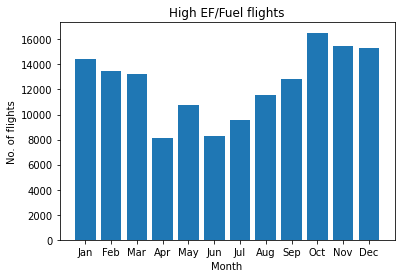

In [172]:
monthnum = range(12)
plt.title("High EF/Fuel flights")
plt.xlabel("Month")
plt.ylabel("No. of flights")
plt.xticks(monthnum, months)
plt.bar(monthnum, highefpfmonthly['Total flights'])

<BarContainer object of 12 artists>

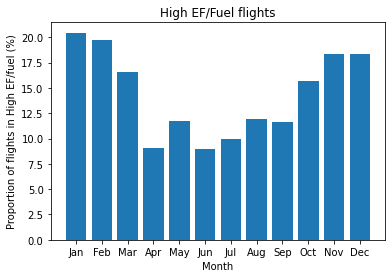

In [176]:
monthnum = range(12)
plt.title("High EF/Fuel flights")
plt.xlabel("Month")
plt.ylabel("Proportion of flights in High EF/fuel (%)")
plt.xticks(monthnum, months)
plt.bar(monthnum, highefpfmonthly['Proportion of flights in High EF/fuel (%)'])

##### Temporal effects

In [ ]:
monthnum = np.arange(len(months))
plt.title("High EF/Fuel flights")
plt.xlabel("Month")
plt.ylabel("No. of flights")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, highefpfmonthly['Daytime flights'],0.4)
plt.bar(monthnum + 0.2, highefpfmonthly['Nighttime flights'],0.4)
plt.legend(['Daytime','Nighttime'])

In [ ]:
highefpfmonthly['Proportion of daytime flights (%)'] = highefpfmonthly['Daytime flights']/daynoflights*100
highefpfmonthly['Proportion of nighttime flights (%)'] = highefpfmonthly['Nighttime flights']/nightnoflights*100
highefpfmonthly

In [ ]:
monthnum = np.arange(len(months))
plt.title("Proportion of flights")
plt.xlabel("Month")
plt.ylabel("Proportion of flights (%)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, highefpfmonthly['Proportion of daytime flights (%)'],0.4)
plt.bar(monthnum + 0.2, highefpfmonthly['Proportion of nighttime flights (%)'],0.4)
plt.legend(['Daytime','Nighttime'])

In [ ]:
monthnum = np.arange(len(months))
plt.title("High EF flights EF/fuel burn")
plt.xlabel("Month")
plt.ylabel("EF/fuel burn (J/kg)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, highefpfmonthly['Daytime EF/fuel'],0.4)
plt.bar(monthnum + 0.2, highefpfmonthly['Nighttime EF/fuel'],0.4)
plt.legend(['Daytime','Nighttime'])

In [203]:
highefpfhourly = highefpf.copy()
highefpfhourly = highefpfhourly.set_index(highefpfhourly['first_waypoint_time'].values)
count = highefpfhourly.resample('H').count()
mean = highefpfhourly.resample('H').mean()
highefpfhourly = highefpfhourly.resample('H', label = 'left').sum()
highefpfhourly['No. flights'] = count['aircraft_type_icao'].values
highefpfhourly['EF/fuel'] = mean['EF/fuel'].values

hours = np.arange(0,24)
highefpfhourlydata = pd.DataFrame(index = hours, columns = jetahourly.columns)

for i in hours:
    highefpfhourlydata.iloc[i,:] = highefpfhourly[highefpfhourly.index.hour == i].sum()
    highefpfhourlydata.loc[i,'EF/fuel'] = highefpfhourly[highefpfhourly.index.hour == i].mean()['EF/fuel']

highefpfhourlydata['Proportion of flights in High EF/fuel (%)'] = highefpfhourlydata['No. flights']/jetahourlydata['No. flights']*100
highefpfhourlydata

,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel,No. flights,Proportion of flights in High EF/fuel (%)
0,1176.9,948594.28,294.89916,4909242.291487,32564070.77212,659475946446482304.0,127939613355180096.0,37508099358.752884,348.0,14.929215
1,741.87,565300.52,255.903674,3057102.458742,28261015.432299,366208415694686848.0,65676059959074800.0,24654655294.446201,302.0,14.869522
2,796.55,625393.05,225.690372,3362332.456354,26592813.352403,300367476048702848.0,55821858792364720.0,21205921815.317917,267.0,18.350515
3,741.87,585581.92,166.304495,3503568.428962,22071800.595086,244080679325056672.0,58740825288556888.0,20202121039.830284,197.0,11.91052
4,1076.56,838497.52,304.46935,4240776.600254,31647919.535712,498292113205735808.0,61925620042989976.0,16930999935.581923,358.0,7.104584
5,6932.42,5234799.56,2418.680306,17985881.974275,191444733.97276,4114402420544300032.0,335734234142597440.0,19767408447.882648,2829.0,6.154683
6,12980.69,9772659.53,4860.229048,33401643.058404,374828975.589628,9916133524340410368.0,734492156794298112.0,20070322963.241573,5732.0,7.929942
7,12699.51,9596381.57,4699.160974,34786529.105199,368624216.063268,11496399396458708992.0,844074499825301888.0,23623603133.580311,5546.0,7.543833
8,13441.66,10340688.47,4375.080895,44076480.836081,379409128.254157,11064871295449960448.0,1030309049931802368.0,24676313899.346653,5152.0,7.3451
9,20065.25,15910815.04,4752.347559,90938597.413178,533760117.475309,9998542724895174656.0,1665675763687903744.0,24086098440.565445,5608.0,8.487453


<BarContainer object of 24 artists>

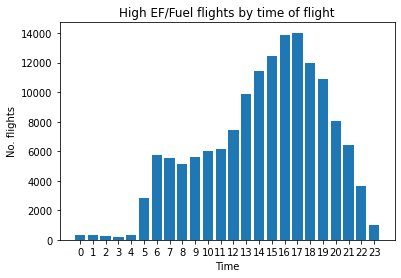

In [178]:
hournum = range(24)
plt.title("High EF/Fuel flights by time of flight")
plt.xlabel("Time")
plt.ylabel("No. flights")
plt.xticks(hournum, hours)
plt.bar(hournum, highefpfhourlydata['No. flights'])

In [182]:
highefpfhourlydata.sort_values(by = ['EF/fuel'],ascending = False).head(5).index

Int64Index([20, 17, 19, 16, 18], dtype='int64')

<BarContainer object of 24 artists>

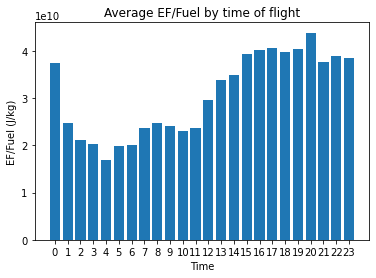

In [179]:
hournum = range(24)
plt.title("Average EF/Fuel by time of flight")
plt.xlabel("Time")
plt.ylabel("EF/Fuel (J/kg)")
plt.xticks(hournum, hours)  
plt.bar(hournum, highefpfhourlydata['EF/fuel'])

<BarContainer object of 24 artists>

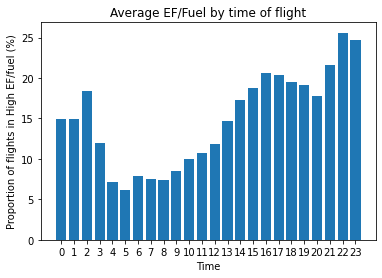

In [204]:
hournum = range(24)
plt.title("Average EF/Fuel by time of flight")
plt.xlabel("Time")
plt.ylabel("Proportion of flights in High EF/fuel (%)")
plt.xticks(hournum, hours)  
plt.bar(hournum, highefpfhourlydata['Proportion of flights in High EF/fuel (%)'])

##### Monthly temporal distribution

In [262]:
highefpfmonthhourflights = pd.DataFrame(index = hours,columns = months)
highefpfmonthhourfuel = pd.DataFrame(index = hours,columns = months)
highefpfmonthhouref = pd.DataFrame(index = hours,columns = months)
highefpfmonthhourefpf = pd.DataFrame(index = hours,columns = months)

for i in np.arange(0,12):
    dfm = highefpf[highefpf['first_waypoint_time'].dt.month == i+1]
    for j in hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        highefpfmonthhourflights.iloc[j,i] = len(dfh.index)
        highefpfmonthhourfuel.iloc[j,i] = dfh['total_fuel_burn'].sum()
        highefpfmonthhouref.iloc[j,i] = dfh['total_contrail_energy_forcing'].sum()
        highefpfmonthhourefpf.iloc[j,i] = dfh['EF/fuel'].mean()

highefpfmonthhourpro = highefpfmonthhourflights.div(monthhourflights).multiply(100)
highefpfmonthhourpro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,25.165563,25.503356,21.590909,11.22449,15.243902,6.586826,13.22314,13.114754,8.93617,11.458333,17.514124,17.241379
1,16.216216,21.472393,16.374269,13.131313,20.27027,11.023622,12.195122,16.666667,7.471264,11.707317,15.510204,16.049383
2,23.870968,19.858156,23.308271,17.948718,10.144928,12.857143,11.711712,21.428571,15.384615,21.09375,17.964072,16.915423
3,30.769231,31.818182,20.909091,6.25,6.766917,2.898551,2.158273,10.857143,8.368201,11.219512,11.428571,17.647059
4,26.315789,14.018692,8.849558,2.017937,4.918033,2.535658,3.900156,5.954198,5.851064,12.602291,17.857143,18.131868
5,20.491803,17.152104,7.344633,2.8034,6.422751,3.701309,5.442492,4.024052,5.998579,11.533196,19.206681,16.299559
6,19.520925,8.926001,13.818616,2.795351,6.752185,4.386203,6.508332,4.35486,5.623674,8.446378,12.797203,15.502555
7,13.275409,7.037944,12.286398,2.511612,6.158647,4.534491,7.280283,4.363189,5.296496,6.871407,9.586589,13.234312
8,10.072963,5.409904,9.283217,3.32668,7.008936,5.651872,8.119012,5.851425,5.540286,6.93565,10.468085,11.10726
9,12.719649,7.03157,11.237728,4.226898,7.183908,5.716636,8.638132,6.684044,5.601136,7.769304,12.217924,12.177868


Text(0.5, 1.0, 'High EF/fuel flights')

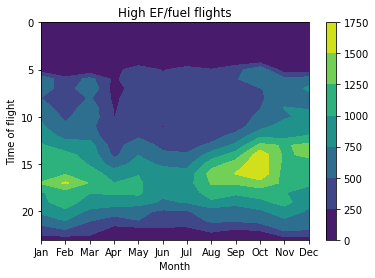

In [1170]:
plt.contourf(highefpfmonthhourflights.columns,highefpfmonthhourflights.index,highefpfmonthhourflights.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('High EF/fuel flights')

Text(0.5, 1.0, 'Energy forcing (J)')

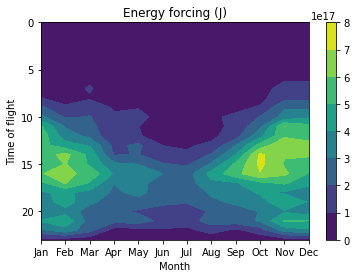

In [1493]:
plt.contourf(highefpfmonthhouref.columns,highefpfmonthhouref.index,highefpfmonthhouref.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('Energy forcing (J)')

Text(0.5, 1.0, 'High EF/fuel EF/fuel (J/kg)')

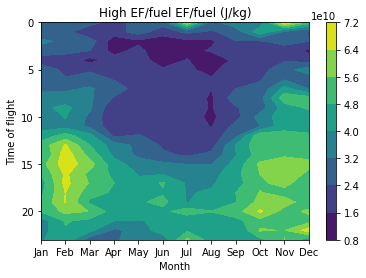

In [1169]:
plt.contourf(highefpfmonthhourefpf.columns,highefpfmonthhourefpf.index,highefpfmonthhourefpf.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('High EF/fuel EF/fuel (J/kg)')

In [296]:
maxhighefpfprotime = pd.DataFrame(columns = months)
maxhighefpfpro = pd.DataFrame(columns = months)

for i in months:
    df = highefpfmonthhourpro.sort_values(by = i,ascending = False).head(6)
    maxhighefpfprotime.loc[:,i] = df.index
    maxhighefpfpro.loc[:,i] = df[i].values

maxhighefpfpro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,30.769231,32.623626,25.306122,18.950651,23.059042,21.492205,26.666667,31.25,24.222222,25.19685,32.523364,26.493363
1,27.924051,32.521739,24.692463,18.884394,21.081081,21.256039,17.191977,27.497621,22.711864,24.924012,26.457229,25.258918
2,26.315789,32.371525,24.361371,18.848921,20.27027,15.928039,16.105569,22.208632,20.543848,24.691358,25.282167,24.761905
3,26.044884,32.184211,23.308271,18.450747,20.123839,15.836402,15.98799,21.708527,19.548023,24.536293,23.651369,23.790542
4,25.748885,31.818182,22.671094,17.948718,19.575028,15.18797,15.407127,21.65127,19.027162,24.166904,22.640439,23.636745
5,25.165563,29.697901,21.590909,17.604643,19.426194,14.630682,14.733039,21.428571,18.285878,22.256689,22.507974,22.898729


In [ ]:
maxhighefpfpro 

In [297]:
maxhighefpfprotime

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,3,22,23,18,21,22,23,23,22,22,22,22
1,16,21,16,19,23,23,22,22,23,23,21,14
2,4,17,22,21,1,21,19,17,16,14,23,23
3,17,16,2,20,22,18,18,16,21,15,15,13
4,22,3,17,2,18,19,17,18,15,16,14,16
5,0,15,0,17,19,17,21,2,17,21,16,15


In [304]:
highefpfmonthhourpro[highefpfmonthhourpro > 23]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,25.165563,25.503356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.870968,NaN,23.308271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.769231,31.818182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.315789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Proportion of High EF/fuel flights')

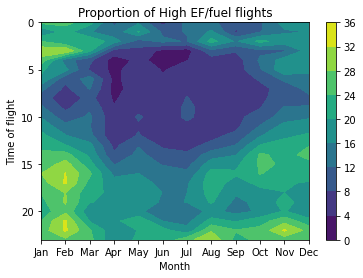

In [286]:
plt.contourf(highefpfmonthhourpro.columns,highefpfmonthhourpro.index,highefpfmonthhourpro.values)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Month')
plt.ylabel('Time of flight')
plt.title('Proportion of High EF/fuel flights')

##### Destination distribution

In [1223]:
for i in dname:
    df = highefpf[highefpf['destination_country'] == i]
    dnamed.loc[i,'High EF/fuel flights'] = len(df.index)
    dnamed.loc[i,'High EF/fuel fuel'] = df['total_fuel_burn'].sum()
    dnamed.loc[i,'High EF/fuel EF'] = df['total_contrail_energy_forcing'].sum()
    dnamed.loc[i,'High EF/fuel average EF/fuel'] = df['EF/fuel'].mean()
    
dnamed['Proportion of flights in High EF/fuel (%)'] = dnamed['High EF/fuel flights']/dnamed['No. flights']*100

In [124]:
dhighefpff = dnamed.copy()
dhighefpff = dhighefpff.dropna()
dhighefpff.sort_values(by=['High EF/fuel flights'], inplace = True, ascending=True)
dhighefpfftop10 = dhighefpff.tail(10)
dhighefpfftop10 

,No. flights,Annual fuel demand,Annual EF,ISO3,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proprtion of flights in High EF/fuel (%)
GR,21907.0,1.748606e+08,1.308185e+18,GRC,4247.0,3.553128e+07,1.379926e+18,3.948887e+10,19.386497
FR,55424.0,1.453544e+08,6.549809e+17,FRA,4998.0,1.560010e+07,7.613632e+17,4.892831e+10,9.017754
PL,24468.0,1.098279e+08,1.589122e+18,POL,5076.0,2.300743e+07,1.661683e+18,7.259389e+10,20.745463
PT,28850.0,1.641782e+08,1.302321e+18,PRT,5253.0,3.050804e+07,1.465599e+18,4.882112e+10,18.207972
TR,18767.0,1.894537e+08,2.376106e+18,TUR,5687.0,5.618524e+07,2.406563e+18,4.526972e+10,30.303192
IT,56357.0,2.367983e+08,1.752259e+18,ITA,9310.0,3.934684e+07,1.908525e+18,4.963136e+10,16.519687
DE,65804.0,1.881998e+08,1.439363e+18,DEU,9586.0,2.859485e+07,1.565657e+18,5.666805e+10,14.567503
GB,183696.0,2.805953e+08,9.549837e+17,GBR,10894.0,2.339659e+07,1.075946e+18,4.540592e+10,5.930450
US,61420.0,3.383175e+09,1.364965e+19,USA,13805.0,7.886830e+08,1.244490e+19,1.676974e+10,22.476392
ES,136328.0,8.319381e+08,4.841423e+18,ESP,23274.0,1.467982e+08,5.673500e+18,4.184335e+10,17.072061


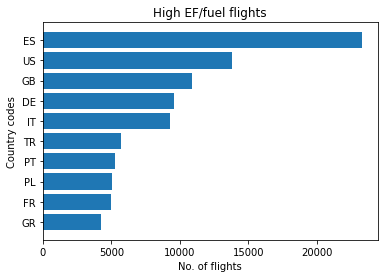

In [286]:
plt.barh(dhighefpfftop10.index,dhighefpfftop10['High EF/fuel flights'])
plt.title('High EF/fuel flights')
plt.ylabel('Country codes')
plt.xlabel('No. of flights')
plt.show()

In [1487]:
dhighefpfef = dnamed.copy()
dhighefpfef = dhighefpfef.dropna()
dhighefpfef.sort_values(by=['High EF/fuel EF'], inplace = True, ascending=True)
dhighefpfeftop10 = dhighefpfef.tail(10)
dhighefpfeftop10 

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),ISO3,Luton flights,Luton EF/fuel
PL,24468.0,1.098279e+08,1.589122e+18,1.440368e+10,3461.0,1.590505e+07,1.584723e+18,1.012989e+11,24468.0,1.094268e+08,1.298159e+18,1.277215e+10,100.0,POL,5117.0,2.485258e+10
AE,12050.0,7.093414e+08,1.371235e+18,2.128364e+09,3018.0,1.779366e+08,1.336331e+18,8.263201e+09,12050.0,7.087914e+08,1.302008e+18,2.048745e+09,100.0,ARE,97.0,7.114000e+09
SG,3159.0,4.155193e+08,1.351607e+18,3.323037e+09,2039.0,2.698398e+08,1.360206e+18,5.176423e+09,3159.0,4.155155e+08,1.350435e+18,3.288477e+09,100.0,SGP,1.0,-1.091206e+09
DE,65804.0,1.881998e+08,1.439363e+18,7.547695e+09,4737.0,1.525641e+07,1.376599e+18,9.882930e+10,65804.0,1.880140e+08,1.361153e+18,8.130225e+09,100.0,DEU,2189.0,6.104969e+09
IT,56357.0,2.367983e+08,1.752259e+18,7.534472e+09,5364.0,2.345014e+07,1.729823e+18,7.745404e+10,56357.0,2.359512e+08,1.472705e+18,7.559124e+09,100.0,ITA,3675.0,6.260292e+09
CN,4679.0,2.906797e+08,1.880203e+18,6.409309e+09,2405.0,1.581176e+08,1.894568e+18,1.254082e+10,4679.0,2.904567e+08,1.788906e+18,6.036536e+09,100.0,CHN,12.0,1.792982e+08
HK,3928.0,3.390291e+08,2.008648e+18,5.837906e+09,2556.0,2.292082e+08,2.015337e+18,8.988332e+09,3928.0,3.388423e+08,1.979359e+18,6.072529e+09,100.0,HKG,28.0,3.461375e+09
TR,18767.0,1.894537e+08,2.376106e+18,1.350584e+10,5139.0,5.203689e+07,2.374001e+18,4.929453e+10,18767.0,1.889463e+08,2.133520e+18,1.476836e+10,100.0,TUR,507.0,5.138031e+09
ES,136328.0,8.319381e+08,4.841423e+18,6.246212e+09,16320.0,1.102189e+08,5.323729e+18,5.534284e+10,136328.0,8.299758e+08,4.340736e+18,5.939789e+09,100.0,ESP,7274.0,5.937399e+09
US,61420.0,3.383175e+09,1.364965e+19,4.082188e+09,23843.0,1.438041e+09,1.442720e+19,1.103035e+10,61420.0,3.380162e+09,1.285899e+19,3.998926e+09,100.0,USA,1002.0,5.203324e+09


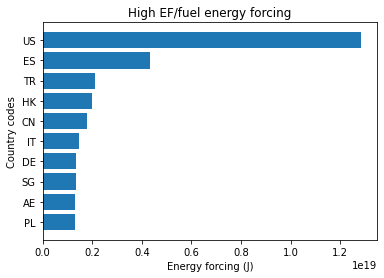

In [1492]:
plt.barh(dhighefpfeftop10.index,dhighefpfeftop10['High EF/fuel EF'])
plt.title('High EF/fuel energy forcing')
plt.ylabel('Country codes')
plt.xlabel('Energy forcing (J)')
plt.show()

In [1187]:
dhighefpfefpf = dnamed.copy()
dhighefpfefpf = dhighefpfefpf.dropna()
dhighefpfefpf = dhighefpfefpf[dhighefpfefpf['No. flights'] > 1000]
dhighefpfefpf.sort_values(by=['High EF/fuel average EF/fuel'], inplace = True, ascending=True)
dhighefpfefpftop10 = dhighefpfefpf.tail(10)
dhighefpfefpftop10 

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),ISO3,Luton flights,Luton EF/fuel
AT,8823.0,3.466363e+07,4.141228e+17,1.202450e+10,1083.0,4.423468e+06,4.098833e+17,9.674305e+10,1830.0,7.289844e+06,4.431414e+17,6.211745e+10,20.741244,AUT,371.0,7.370138e+09
LB,1154.0,1.597024e+07,3.306002e+17,2.531333e+10,459.0,5.611611e+06,3.276510e+17,6.311838e+10,463.0,5.530402e+06,3.275694e+17,6.268444e+10,40.121317,LBN,19.0,5.035168e+08
SK,2071.0,9.660677e+06,1.270973e+17,1.311100e+10,291.0,1.394621e+06,1.323562e+17,9.566162e+10,436.0,2.036135e+06,1.389282e+17,6.744032e+10,21.052632,SVK,727.0,2.343243e+10
LV,2766.0,1.388954e+07,1.604126e+17,1.181582e+10,354.0,1.790393e+06,1.612516e+17,9.271393e+10,504.0,2.535591e+06,1.683083e+17,6.796032e+10,18.221258,LVA,606.0,1.994154e+10
SE,10168.0,4.272411e+07,3.897942e+17,8.797511e+09,869.0,3.846799e+06,3.924250e+17,1.032355e+11,1377.0,5.904836e+06,4.152809e+17,6.943454e+10,13.542486,SWE,282.0,6.582102e+09
RO,9682.0,6.196058e+07,1.405638e+18,2.261110e+10,2568.0,1.678364e+07,1.410204e+18,8.551760e+10,3170.0,2.059094e+07,1.443519e+18,7.096450e+10,32.741169,ROU,5288.0,2.369875e+10
LT,3110.0,1.638037e+07,2.585254e+17,1.538972e+10,543.0,2.932885e+06,2.672918e+17,9.099199e+10,721.0,3.836374e+06,2.763113e+17,7.102843e+10,23.183280,LTU,1479.0,1.671486e+10
HU,7901.0,3.773690e+07,7.195242e+17,1.879173e+10,1527.0,7.509466e+06,7.121019e+17,9.604101e+10,2127.0,1.035960e+07,7.411381e+17,7.187365e+10,26.920643,HUN,1785.0,3.078260e+10
PL,24468.0,1.098279e+08,1.589122e+18,1.440368e+10,3461.0,1.590505e+07,1.584723e+18,1.012989e+11,5076.0,2.300743e+07,1.661683e+18,7.259389e+10,20.745463,POL,5117.0,2.485258e+10
RU,4704.0,4.040189e+07,1.057921e+18,2.831490e+10,1579.0,1.414333e+07,1.072956e+18,8.497773e+10,1784.0,1.527410e+07,1.083470e+18,7.641165e+10,37.925170,RUS,515.0,4.920888e+10


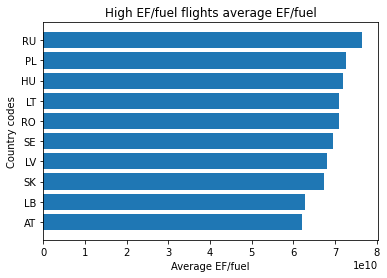

In [1188]:
plt.barh(dhighefpfefpftop10.index,dhighefpfefpftop10['High EF/fuel average EF/fuel'])
plt.title('High EF/fuel flights average EF/fuel')
plt.ylabel('Country codes')
plt.xlabel('Average EF/fuel')
plt.show()

In [126]:
dhighefpfpro = dnamed.copy()
dhighefpfpro = dhighefpfpro.dropna()
dhighefpfpro = dhighefpfpro[dhighefpfpro['No. flights'] > 1000]
dhighefpfpro.sort_values(by=['Proportion of flights in High EF/fuel (%)'], inplace = True, ascending=True)
dhighefpfprotop10 = dhighefpfpro.tail(10)
dhighefpfprotop10 

,No. flights,Annual fuel demand,Annual EF,ISO3,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proprtion of flights in High EF/fuel (%)
BG,5253.0,3.569396e+07,4.769670e+17,BGR,1426.0,9.722095e+06,5.020516e+17,5.176239e+10,27.146393
TH,1732.0,1.645649e+08,7.266409e+17,THA,479.0,4.445342e+07,5.870211e+17,1.356236e+10,27.655889
ZA,3031.0,2.572994e+08,1.004180e+18,ZAF,862.0,6.495878e+07,7.023487e+17,1.137879e+10,28.439459
TR,18767.0,1.894537e+08,2.376106e+18,TUR,5687.0,5.618524e+07,2.406563e+18,4.526972e+10,30.303192
PK,1240.0,5.732011e+07,3.747006e+17,PAK,376.0,1.792489e+07,3.369275e+17,1.902550e+10,30.322581
CN,4679.0,2.906797e+08,1.880203e+18,CHN,1505.0,9.652701e+07,1.697485e+18,1.811506e+10,32.164993
RO,9682.0,6.196058e+07,1.405638e+18,ROU,3170.0,2.059094e+07,1.443519e+18,7.096450e+10,32.741169
HK,3928.0,3.390291e+08,2.008648e+18,HKG,1456.0,1.294806e+08,1.727301e+18,1.358027e+10,37.067210
RU,4704.0,4.040189e+07,1.057921e+18,RUS,1784.0,1.527410e+07,1.083470e+18,7.641165e+10,37.925170
LB,1154.0,1.597024e+07,3.306002e+17,LBN,463.0,5.530402e+06,3.275694e+17,6.268444e+10,40.121317


In [374]:
dhighefpfprotop10['Annual fuel demand'].sum()

5350560884.835543

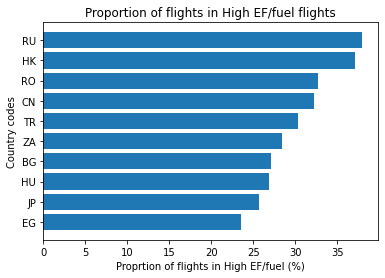

In [367]:
plt.barh(dhighefpfprotop10.index,dhighefpfprotop10['Proportion of flights in High EF/fuel (%)'])
plt.title('Proportion of flights in High EF/fuel flights')
plt.ylabel('Country codes')
plt.xlabel('Proprtion of flights in High EF/fuel (%)')
plt.show()

In [762]:
diso3 = coco. CountryConverter().pandas_convert(series = pd.Series(dname), to='ISO3')
dnamed['ISO3'] = diso3.values

In [79]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
table = world.merge(dnamed.copy(), how="left", left_on=['iso_a3'], right_on=['ISO3'])
table = table.dropna(subset=['Proprtion of flights in High EF/fuel (%)'])
my_map = folium.Map()
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['ISO3','Proprtion of flights in High EF/fuel (%)'],
    key_on='feature.properties.ISO3',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Proprtion of flights in High EF/fuel (%)'
).add_to(my_map)
my_map

C:\Users\user\AppData\Local\Temp/ipykernel_47256/795209112.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [98]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
table = world.merge(dnamed.copy(), how="left", left_on=['iso_a3'], right_on=['ISO3'])
table = table.dropna(subset=['Proprtion of flights in High EF/fuel (%)'])
table = table[table['No. flights'] > 1000]
my_map = folium.Map()
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['ISO3','Proprtion of flights in High EF/fuel (%)'],
    key_on='feature.properties.ISO3',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Proprtion of flights in High EF/fuel (%)'
).add_to(my_map)
my_map.save('1000flights.html')

C:\Users\user\AppData\Local\Temp/ipykernel_47256/2976477758.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [115]:
fig = go.Figure(data=go.Choropleth(
    locations = dnamed['ISO3'],
    z = dnamed['Proprtion of flights in High EF/fuel (%)'],
    text = dnamed['ISO3'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Proprtion of flights<br>in High EF/fuel (%)',
))

fig.update_layout(
    title_text='2019 High EF/fuel flights',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

In [767]:
fig = go.Figure(data=go.Choropleth(
    locations = dnamed['ISO3'],
    z = dnamed[dnamed['No. flights'] > 000]['EF/fuel'],
    text = dnamed['ISO3'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = 'J',
    colorbar_title = 'Average EF/fuel (J)',
))

fig.update_layout(
    title_text='2019 flights',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

# Allocation


### Run through files

#### SAF2

In [ ]:
longmonth = [1,3,5,7,8,10,12]
shortmonth = [4,6,9,11]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
saf2 = {}
allsaf2 = pd.DataFrame()
col = [5,6,7,8,9,12,13,15,16,18,19,23,25,26,43]
a = 0

for i, month in enumerate(range(1,13)):
    jetflights = pd.DataFrame()
    flights = pd.DataFrame()
    if month < 10 :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF2/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF2/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
                    
        elif month in shortmonth: 
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF2/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF2/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,29)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF2/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF2/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    else :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF2/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF2/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF2/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF2/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    flights = flights.reset_index()
    flights = flights.drop(columns = ['index'])
    saf2[months[i]] = flights
    allsaf2 = pd.concat([allsaf2,flights])
allsaf2 = allsaf2.reset_index()
allsaf2 = allsaf2.drop(columns = ['index'])

#### SAF10

In [143]:
longmonth = [1,3,5,7,8,10,12]
shortmonth = [4,6,9,11]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
saf10 = {}
allsaf10 = pd.DataFrame()
col = [5,6,7,8,9,12,13,15,16,18,19,23,25,26,43]
a = 0

for i, month in enumerate(range(1,13)):
    jetflights = pd.DataFrame()
    flights = pd.DataFrame()
    if month < 10 :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF10/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF10/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
                    
        elif month in shortmonth: 
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF10/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF10/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,29)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF10/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF10/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    else :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF10/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF10/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF10/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF10/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    flights = flights.reset_index()
    flights = flights.drop(columns = ['index'])
    saf10[months[i]] = flights
    allsaf10 = pd.concat([allsaf10,flights])
allsaf10 = allsaf10.reset_index()
allsaf10 = allsaf10.drop(columns = ['index'])

365/365 Fetching 31/12/2019 data ... 


#### SAF30

In [ ]:
longmonth = [1,3,5,7,8,10,12]
shortmonth = [4,6,9,11]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
saf30 = {}
allsaf30 = pd.DataFrame()
col = [5,6,7,8,9,12,13,15,16,18,19,23,25,26,43]
a = 0

for i, month in enumerate(range(1,13)):
    jetflights = pd.DataFrame()
    flights = pd.DataFrame()
    if month < 10 :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF30/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF30/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
                    
        elif month in shortmonth: 
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF30/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF30/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,29)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF30/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF30/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    else :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF30/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF30/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF30/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF30/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    flights = flights.reset_index()
    flights = flights.drop(columns = ['index'])
    saf30[months[i]] = flights
    allsaf30 = pd.concat([allsaf30,flights])
allsaf30 = allsaf30.reset_index()
allsaf30 = allsaf30.drop(columns = ['index'])

#### SAF50

In [55]:
longmonth = [1,3,5,7,8,10,12]
shortmonth = [4,6,9,11]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
saf50 = {}
allsaf50 = pd.DataFrame()
col = [5,6,7,8,9,12,13,15,16,18,19,23,25,26,43]
a = 0

for i, month in enumerate(range(1,13)):
    jetflights = pd.DataFrame()
    flights = pd.DataFrame()
    if month < 10 :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
                    
        elif month in shortmonth: 
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,29)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF50/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    else :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF50/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF50/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF50/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    flights = flights.reset_index()
    flights = flights.drop(columns = ['index'])
    saf50[months[i]] = flights
    allsaf50 = pd.concat([allsaf50,flights])
allsaf50 = allsaf50.reset_index()
allsaf50 = allsaf50.drop(columns = ['index'])

365/365 Fetching 31/12/2019 data ... 


In [56]:
saf50monthly = allsaf50.copy()
saf50monthly = saf50monthly.set_index(saf50monthly['first_waypoint_time'].values)
count = saf50monthly.resample('M').count()
saf50monthly = saf50monthly.resample('M', label = 'right').sum()
saf50monthly['No. flights'] = count['aircraft_type_icao'].values
saf50monthly

,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,No. flights
2019-01-31,195586.78,1.543361e+08,57991.083797,8.957484e+08,6.211592e+09,5.627166e+19,4.187582e+18,70439
2019-02-28,183564.28,1.429599e+08,56864.784451,8.182537e+08,5.802957e+09,5.467451e+19,3.710143e+18,68400
2019-03-31,209276.11,1.629247e+08,67170.638904,9.253149e+08,6.621118e+09,6.281272e+19,3.331524e+18,79692
2019-04-30,227767.29,1.751906e+08,76153.521957,9.559366e+08,7.109838e+09,7.091660e+19,1.730549e+18,89507
2019-05-31,246426.74,1.929914e+08,77173.688436,1.029989e+09,7.586388e+09,7.493111e+19,2.187391e+18,91187
2019-06-30,251953.95,1.936441e+08,80010.027872,1.033196e+09,7.585772e+09,7.761588e+19,1.694517e+18,92080
2019-07-31,260658.46,2.041462e+08,85221.662647,1.088156e+09,7.995348e+09,8.162733e+19,1.879745e+18,96591
2019-08-31,277903.54,2.196459e+08,84920.534987,1.208347e+09,8.483629e+09,7.939538e+19,2.165176e+18,96679
2019-09-30,266896.63,2.062668e+08,93715.370513,1.052137e+09,8.168230e+09,8.650905e+19,2.887168e+18,110349
2019-10-31,251261.06,1.924527e+08,89134.388462,1.000316e+09,7.853902e+09,8.277484e+19,4.015266e+18,105574


#### SAF100

In [583]:
longmonth = [1,3,5,7,8,10,12]
shortmonth = [4,6,9,11]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
saf100 = {}
allsaf100 = pd.DataFrame()
col = [5,6,7,8,9,12,13,15,16,18,19,23,25,26,43]
a = 0

for i, month in enumerate(range(1,13)):
    jetflights = pd.DataFrame()
    flights = pd.DataFrame()
    if month < 10 :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF100/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF100/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
                    
        elif month in shortmonth: 
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF100/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF100/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,29)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF100/20190{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF100/20190{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    else :
        if month in longmonth:
            for j, day in enumerate(range(1,32)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF100/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF100/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1

        else :
            for j, day in enumerate(range(1,31)) :
                if day < 10 :
                    df = pd.read_parquet(f'2019 - SAF100/2019{month}0{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)

                else :
                    df = pd.read_parquet(f'2019 - SAF100/2019{month}{day}-summary.pq', engine = 'pyarrow')
                    df = df.iloc[:,col]
                    df = df[df['origin_country'] == 'GB']
                    flights = pd.concat([flights,df])
                    print(f'{a+1}/365 Fetching {day}/{month}/2019 data ... ')
                    clear_output(wait=True)
                a = a + 1
    flights = flights.reset_index()
    flights = flights.drop(columns = ['index'])
    saf100[months[i]] = flights
    allsaf100 = pd.concat([allsaf100,flights])
allsaf100 = allsaf100.reset_index()
allsaf100 = allsaf100.drop(columns = ['index'])

FileNotFoundError: [Errno 2] No such file or directory: '2019 - SAF100/20190101-summary.pq'

### Even scenario

In [155]:
saf10monthlyef = []

for i in months:
    df = saf10[i]
    saf10monthlyef.append(df['total_contrail_energy_forcing'].sum())

In [156]:
(np.sum(monthlyef) - np.sum(saf10monthlyef))/np.sum(monthlyef)*100

7.936746718112514

7.94% EF Reduction

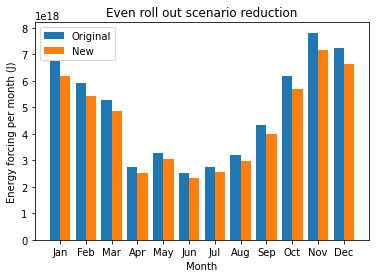

In [157]:
monthnum = np.arange(len(months))
plt.title("Even roll out scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, monthlyef,0.4)
plt.bar(monthnum + 0.2, saf10monthlyef,0.4)
plt.legend(['Original','New'])

### Temporal scenario

In [ ]:
np.sum(nightfuel)

##### SAF30

In [ ]:
nightflightsaf = {}

for i in months:
    ind = nigfliind[i]
    df = saf30[i]
    df = df.loc[ind,:]
    df1 = dayflight[i]
    nightflightsaf[i] = pd.concat([df,df1]).sort_index()

In [ ]:
nightflightsafmonthlyef = []

for i in months:
    df = nightflightsaf[i]
    nightflightsafmonthlyef.append(df['total_contrail_energy_forcing'].sum())

nightflightsafmonthlyef

In [ ]:
(np.sum(monthlyef) - np.sum(nightflightsafmonthlyef))/np.sum(monthlyef)*100

8.68% EF Reduction

In [ ]:
monthnum = np.arange(len(months))
plt.title("Night flights SAF30 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, monthlyef,0.4)
plt.bar(monthnum + 0.2, nightflightsafmonthlyef,0.4)
plt.legend(['Original','New'])

##### SAF50

In [ ]:
nightflightsaf = {}

for i in months:
    ind = nigfliind[i]
    df = saf50[i]
    df = df.loc[ind,:]
    df1 = dayflight[i]
    nightflightsaf[i] = pd.concat([df,df1]).sort_index()

In [ ]:
nightflightsafmonthlyef = []

for i in months:
    df = nightflightsaf[i]
    nightflightsafmonthlyef.append(df['total_contrail_energy_forcing'].sum())

In [ ]:
(np.sum(monthlyef) - np.sum(nightflightsafmonthlyef))/np.sum(monthlyef)*100

13.18% EF Reduction

In [ ]:
monthnum = np.arange(len(months))
plt.title("Night flights SAF30 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, monthlyef,0.4)
plt.bar(monthnum + 0.2, nightflightsafmonthlyef,0.4)
plt.legend(['Original','New'])

### Hourly reduction

In [149]:
jetahourlydata.sort_values(by = ['EF/fuel'],ascending = False)

,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel,No. flights
22,63844.46,54117571.31,12100.08887,371290616.826484,1895359211.884124,20947063413728133120.0,2496841167880936960.0,11727250848.852945,14274.0
16,168597.87,129074062.03,57487.118127,697948984.304531,5289958635.615964,96043185021816307712.0,6288472763573807104.0,11138179085.658596,67447.0
17,149287.04,112797144.16,58457.869733,542470065.161048,4910839091.578609,98590186817778319360.0,5207281703331120128.0,10847841423.955023,68710.0
19,117762.08,90166477.84,48265.933089,528251047.014365,4431353068.007868,91253174010825277440.0,4239483498843850240.0,10585948793.698755,56739.0
18,126221.2,95819374.6,52321.601126,505502704.546887,4453782554.071173,89392631624540372992.0,4377150508094473728.0,10509110567.974936,61470.0
23,11930.6,9630685.12,3464.474598,53937805.551717,380130255.131614,6250797291435131904.0,445235085955783616.0,10437557867.136925,4090.0
21,132396.11,112422117.52,25254.782961,827125664.895083,4024632064.882972,42642005300102250496.0,4376634096846330880.0,10252778087.171225,29706.0
15,176349.37,136208750.27,56354.44872,712368838.731524,5195526185.9904,102393961914500055040.0,5543827952396718080.0,10052002096.739544,66118.0
20,125168.23,101202903.37,38599.668853,671374601.162642,4435626829.23045,70461353634800205824.0,3593112062454121984.0,10014573478.544868,45429.0
14,188751.41,147964742.81,56433.521237,812207640.618514,5656089127.64947,97369067432209661952.0,5123120961056928768.0,8188289432.679451,66260.0


In [154]:
hourlyscenario = alljeta.copy()

hourlyscenariohours = [22,16,17,19,23]
hourlyscenarioflights = pd.DataFrame()

for i in hourlyscenariohours:
    df = hourlyscenario[hourlyscenario['first_waypoint_time'].dt.hour == i]
    hourlyscenarioflights = pd.concat([hourlyscenarioflights,df])

hourlyscenarioflights['total_fuel_burn'].sum()

2193898518.8581457

In [155]:
hourlyindex = hourlyscenarioflights.index
replace = allsaf50.loc[hourlyindex,:]
hourlyscenario = pd.DataFrame()
hourlyscenario = alljeta.drop(index = hourlyindex)
hourlyscenario = pd.concat([hourlyscenario,replace]).sort_index()
hourlyscenario

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1244.392841,CFM56-7B27E,64242.485876,3.822508e+14,0.000000e+00,NaN
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,3.235051e+14,0.000000e+00,NaN
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


In [156]:
hourlyscenariomonthly = hourlyscenario.copy()
hourlyscenariomonthly = hourlyscenariomonthly.set_index(hourlyscenariomonthly['first_waypoint_time'].values)
hourlyscenariomonthly = hourlyscenariomonthly.resample('M').sum()

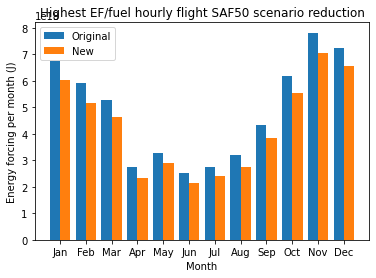

In [157]:
monthnum = np.arange(len(months))
plt.title("Highest EF/fuel hourly flight SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, hourlyscenariomonthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [158]:
(jetamonthly['total_contrail_energy_forcing'].sum()-hourlyscenariomonthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

11.332048443441012

11.33% EF Reduction

### Seasonal scenario

##### Dec-Feb

In [1196]:
jetamonthly['total_fuel_burn'][0:2].sum() + jetamonthly['total_fuel_burn'][11]

2593019228.993971

In [1209]:
(2593019228.993971/2 - 1179000000)/1179000000

0.09966888422136169

Dec-Feb fuel demand = 2,593,019,228.993971

In [1197]:
seasonal = pd.DataFrame()

a = [0,1,11]

df = saf50monthly.iloc[a,:].copy()
df1 = jetamonthly.iloc[2:11,:].copy()
seasonal = pd.concat([df,df1])
seasonal = seasonal.sort_index()

In [1198]:
(jetamonthly['total_contrail_energy_forcing'].sum()-seasonal['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()

0.12996280631751186

13.0% EF Reduction

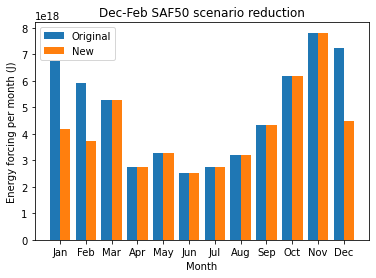

In [1199]:
monthnum = np.arange(len(months))
plt.title("Dec-Feb SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, seasonal['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

##### Nov - Jan

In [1200]:
jetamonthly['total_fuel_burn'][0] + jetamonthly['total_fuel_burn'][10:12].sum()

2609555814.9964314

Nov-Jan fuel demand = 2,609,555,814.9964314

In [1203]:
seasonal2 = pd.DataFrame()

a = [0,10,11]

df = saf50monthly.iloc[a,:].copy()
df1 = jetamonthly.iloc[1:10,:].copy()
seasonal2 = pd.concat([df,df1])
seasonal2 = seasonal2.sort_index()

In [1204]:
(jetamonthly['total_contrail_energy_forcing'].sum()-seasonal2['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

14.36061281339111

14.4% EF Reduction

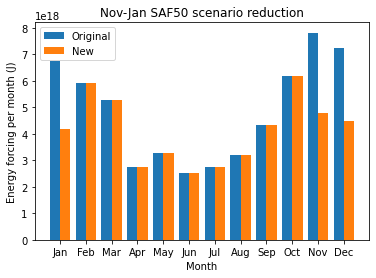

In [1205]:
monthnum = np.arange(len(months))
plt.title("Nov-Jan SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, seasonal2['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

### High EF flights scenario

In [1255]:
sixpercent = alljeta['total_contrail_energy_forcing'].quantile(0.9421)
highef50 = alljeta[alljeta['total_contrail_energy_forcing'] > sixpercent]
highef50['total_fuel_burn'].sum()

2358102422.648911

In [1256]:
highef50scenarioind = highef50.index
replace = allsaf50.loc[highef50scenarioind,:]
highef50test = alljeta.drop(index = highef50scenarioind)
highef50test = pd.concat([highef50test,replace]).sort_index()
highef50test

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.000000e+00


In [1257]:
highef50testmonthly = highef50test.copy()
highef50testmonthly = highef50testmonthly.set_index(highef50testmonthly['first_waypoint_time'].values)
highef50testmonthly = highef50testmonthly.resample('M').sum()

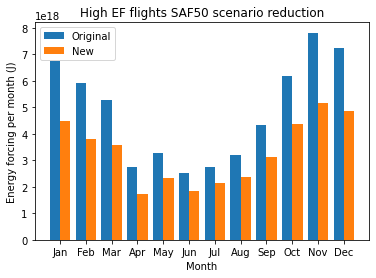

In [1260]:
monthnum = np.arange(len(months))
plt.title("High EF flights SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, highef50testmonthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1259]:
(jetamonthly['total_contrail_energy_forcing'].sum()-highef50testmonthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

31.47039414912125

31.47% ER reduction

### High EF/Fuel flights scenario

In [1265]:
highefpf['total_fuel_burn'].sum()

2396938960.368633

In [1267]:
highefpfscenarioind = highefpf.index
replace = allsaf50.loc[highefpfscenarioind,:]
highefpftest = alljeta.drop(index = highefpfscenarioind)
highefpftest = pd.concat([highefpftest,replace]).sort_index()
highefpftest

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.000000e+00


In [1268]:
highefpftestmonthly = highefpftest.copy()
highefpftestmonthly = highefpftestmonthly.set_index(highefpftestmonthly['first_waypoint_time'].values)
highefpftestmonthly = highefpftestmonthly.resample('M').sum()

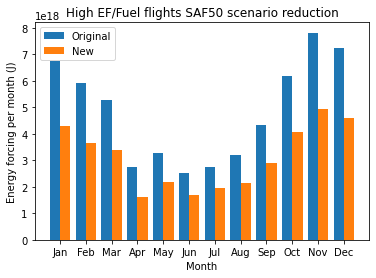

In [1269]:
monthnum = np.arange(len(months))
plt.title("High EF/Fuel flights SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, highefpftestmonthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1270]:
(jetamonthly['total_contrail_energy_forcing'].sum()-highefpftestmonthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

35.51954597046623

35.52% EF reduction

### Targeted airports

#### Heathrow scenario

In [136]:
aps['Annual fuel demand']['London Heathrow Airport']/totalfuel

0.5753137269367792

In [142]:
aps['Annual fuel demand']['London Heathrow Airport']*0.1

678092523.3187598

##### 1. Allocated evenly

In [1273]:
heathrow1 = {}

for i in months:
    jetadf = jeta[i]
    saf50df = saf50[i]
    df1 = saf50df[saf50df['origin_airport'] == 'EGLL']
    df2 = jetadf[jetadf['origin_airport'] != 'EGLL']
    heathrow1[i] = pd.concat([df1,df2]).sort_index()

In [1280]:
heathrow1monthlyef = []

for i in months:
    df = heathrow1[i]
    heathrow1monthlyef.append(df['total_contrail_energy_forcing'].sum())

In [1282]:
monthlyef = jetamonthly['total_contrail_energy_forcing']
monthlyef

2019-01-31    6.729758e+18
2019-02-28    5.932153e+18
2019-03-31    5.279200e+18
2019-04-30    2.736977e+18
2019-05-31    3.268986e+18
2019-06-30    2.512626e+18
2019-07-31    2.738179e+18
2019-08-31    3.202698e+18
2019-09-30    4.324326e+18
2019-10-31    6.175390e+18
2019-11-30    7.815811e+18
2019-12-31    7.245607e+18
Freq: M, Name: total_contrail_energy_forcing, dtype: float64

In [1279]:
for i in range(0,12):
    print((monthlyef[i]-heathrow1monthlyef[i])/monthlyef[i])

0.24572432483387907
0.22038436470101722
0.2167712427309021
0.24363624389380395
0.16854994563201506
0.15295207471905617
0.1550311606235441
0.1540455037515005
0.16485069558665644
0.16407230466967682
0.22468361830281566
0.21630389867936


In [1278]:
(np.sum(monthlyef) - np.sum(heathrow1monthlyef))/np.sum(monthlyef)*100

20.142269411976088

4.52% EF Reduction

In [ ]:
monthnum = np.arange(len(months))
plt.title("Heathrow all SAF20 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, monthlyef,0.4)
plt.bar(monthnum + 0.2, heathrow1monthlyef,0.4)
plt.legend(['Original','New'])

##### 2. Allocated at SAF 50 to night flights only

In [1283]:
heathrownight = {}
heathrownightfuel = []

for i in months:
    df1 = jeta[i]

    ind = nigfliind[i]
    df = saf50[i] 
    df = df.loc[ind,:]
    df = df[df['origin_airport'] == 'EGLL']
    heathrownightfuel.append(df['total_fuel_burn'].sum())
    nightind = df.index

    df1 = df1.drop(nightind)
    heathrownight[i] = pd.concat([df1,df]).sort_index()

np.sum(heathrownightfuel)

2258685432.5679865

In [1284]:
heathrow2monthlyef = []

for i in months:
    df = heathrownight[i]
    heathrow2monthlyef.append(df['total_contrail_energy_forcing'].sum())

heathrow2monthlyef

[5.952381988877273e+18,
 5.345097377268697e+18,
 4.933619818837905e+18,
 2.5112187570617846e+18,
 3.129396846316239e+18,
 2.419890123207285e+18,
 2.6546755355699364e+18,
 3.0555589884664033e+18,
 4.06721216509929e+18,
 5.786460056932863e+18,
 7.025247233125708e+18,
 6.468087806327081e+18]

In [1285]:
(np.sum(monthlyef) - np.sum(heathrow2monthlyef))/np.sum(monthlyef)

0.07958467913611997

7.96% EF Reduction

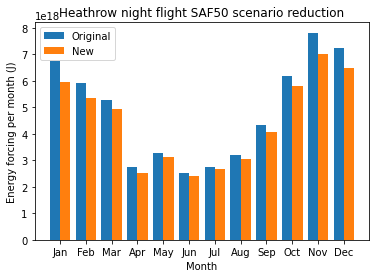

In [1296]:
monthnum = np.arange(len(months))
plt.title("Heathrow night flight SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, monthlyef,0.4)
plt.bar(monthnum + 0.2, heathrow2monthlyef,0.4)
plt.legend(['Original','New'])

##### 3. Targeted Heathrow High EF/fuel Flights

In [1320]:
heathrowpercent = alljeta['EF/fuel'].quantile(0.82)
heathrowhighef = alljeta[alljeta['EF/fuel'] > heathrowpercent]
heathrowhighef[heathrowhighef['origin_airport'] == 'EGLL']['total_fuel_burn'].sum()

2328058887.6318164

In [1321]:
heathrowindex = heathrowhighef[heathrowhighef['origin_airport'] == 'EGLL'].index
replace = allsaf50.loc[heathrowindex,:]
heathrow3 = pd.DataFrame()
heathrow3 = alljeta.drop(index = heathrowindex)
heathrow3 = pd.concat([heathrow3,replace]).sort_index()
heathrow3

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.000000e+00


In [1322]:
heathrow3monthly = heathrow3.copy()
heathrow3monthly = heathrow3monthly.set_index(heathrow3monthly['first_waypoint_time'].values)
heathrow3monthly = heathrow3monthly.resample('M').sum()

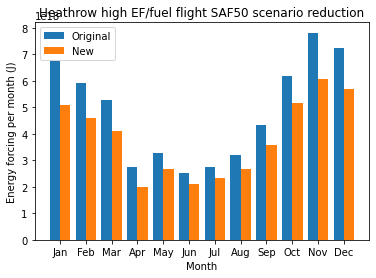

In [1323]:
monthnum = np.arange(len(months))
plt.title("Heathrow high EF/fuel flight SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, heathrow3monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1324]:
(jetamonthly['total_contrail_energy_forcing'].sum()-heathrow3monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

20.471420477370405

20.04% EF Reduction

##### 4. Targeted Heathrow 15:00 - 21:00

In [1303]:
heathrow4 = alljeta.copy()
heathrow4 = heathrow4[heathrow4['origin_airport'] == 'EGLL']

heathrow4hours = np.arange(15,21)
heathrow4flights = pd.DataFrame()

for i in heathrow4hours:
    df = heathrow4[heathrow4['first_waypoint_time'].dt.hour == i]
    heathrow4flights = pd.concat([heathrow4flights,df])

heathrow4flights['total_fuel_burn'].sum()

2380113103.7264895

In [1304]:
heathrowindex = heathrow4flights.index
replace = allsaf50.loc[heathrowindex,:]
heathrow4 = pd.DataFrame()
heathrow4 = alljeta.drop(index = heathrowindex)
heathrow4 = pd.concat([heathrow4,replace]).sort_index()
heathrow4

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.000000e+00


In [1305]:
heathrow4monthly = heathrow4.copy()
heathrow4monthly = heathrow4monthly.set_index(heathrow4monthly['first_waypoint_time'].values)
heathrow4monthly = heathrow4monthly.resample('M').sum()

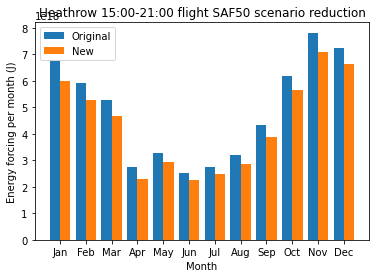

In [1306]:
monthnum = np.arange(len(months))
plt.title("Heathrow 15:00-21:00 flight SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, heathrow4monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1307]:
(jetamonthly['total_contrail_energy_forcing'].sum()-heathrow4monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

10.086068931920378

10.09% EF reduction

#### London other airports

In [1308]:
aps.sort_values(by = ['No. flights'], ascending = False).head(20)

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10,10.733075
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10,11.867102,4.247587e+09,5.439489e+10,7.338070
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10,7.966643
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,3.292883e+09,4.643022e+10,7.254897
London City Airport,EGLC,31585,6.752292e+07,5.070162e+16,348,1.126197e+06,1.456943e+14,1.095711e+17,2092,5.309836e+06,2.108178e+10,6.623397,1.370084e+09,5.166048e+10,1.101789
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10,11.123259,4.276552e+09,6.085028e+10,6.691964


In [1309]:
a = ['London Gatwick Airport' , 'London Stansted Airport' , 'London Luton Airport','London City Airport','Southend Airport']
aps.loc[a]['Annual fuel demand'].sum()

2484450272.78498

In [1310]:
a = ['EGKK','EGSS','EGGW','EGLC','EGMC']
londonaflights = pd.DataFrame()

for i in a:
    df = alljeta[alljeta['origin_airport'] == i]
    londonaflights = pd.concat([londonaflights,df])

In [1311]:
londonaind = londonaflights.index
replace = allsaf50.loc[londonaind,:]
londona = alljeta.drop(index = londonaind)
londona = pd.concat([londona,replace]).sort_index()
londona

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,69863.709320,Trent 1000-J3,212993.600171,2.286080e+14,1.243435e+14,NaN
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-80788.070365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


In [1312]:
londonamonthly = londona.copy()
londonamonthly = londonamonthly.set_index(londonamonthly['first_waypoint_time'].values)
londonamonthly = londonamonthly.resample('M').sum()

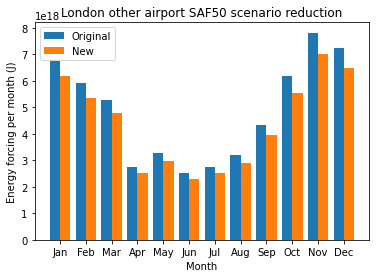

In [1313]:
monthnum = np.arange(len(months))
plt.title("London other airport SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, londonamonthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1314]:
(jetamonthly['total_contrail_energy_forcing'].sum()-londonamonthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

9.323426210445444

9.32% EF reduction 

#### Highest EF/fuel airports

In [465]:
aps.sort_values(by = ['EF/fuel'],ascending = False).head(10)

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel
Teesside International Airport,EGNV,1655,1.847785e+06,7.573287e+15,16,8.829492e+04,4.733304e+14,9.511004e+15,100,1.978162e+05,4.470544e+10,6.042296,4.108848e+11
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,4.920888e+10
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,2.656712e+10
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,2.240668e+10
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,2.001760e+10
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,1.646906e+10
Exeter International Airport,EGTE,4783,1.016632e+07,2.921049e+16,120,8.666621e+05,2.434207e+14,3.336150e+16,219,1.248226e+06,3.029258e+10,4.578716,1.033459e+10
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,6.502078e+09
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,6.221919e+09
Wick Airport,EGPC,265,1.280624e+05,0.000000e+00,0,0.000000e+00,NaN,8.819645e+13,6,3.389227e+03,2.603467e+10,2.264151,4.308353e+09


In [469]:
a = ['Teesside International Airport' , 
     'London Luton Airport' , 
     'London Gatwick Airport',
     'London Stansted Airport'
     ]
aps.loc[a]['Annual fuel demand'].sum()

2391340249.2321267

In [471]:
a = ['EGNV','EGGW','EGKK','EGSS']
highefpfflights = pd.DataFrame()

for i in a:
    df = alljeta[alljeta['origin_airport'] == i]
    highefpfflights = pd.concat([highefpfflights,df])

In [472]:
highefpfproind = highefpfflights.index
replace = allsaf50.loc[highefpfproind,:]
highefpf = alljeta.drop(index = highefpfproind)
highefpf = pd.concat([highefpf,replace]).sort_index()
highefpf

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,69863.709320,Trent 1000-J3,212993.600171,2.286080e+14,1.243435e+14,NaN
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-80788.070365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


In [473]:
highefpfmonthly = highefpf.copy()
highefpfmonthly = highefpfmonthly.set_index(highefpfmonthly['first_waypoint_time'].values)
highefpfmonthly = highefpfmonthly.resample('M').sum()

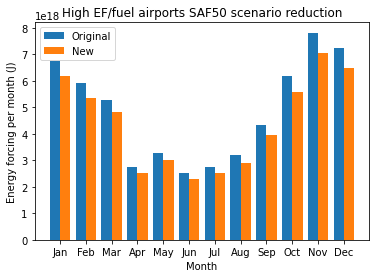

In [474]:
monthnum = np.arange(len(months))
plt.title("High EF/fuel airports SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, highefpfmonthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [475]:
(jetamonthly['total_contrail_energy_forcing'].sum()-highefpfmonthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

9.177841189580692

9.18% EF Reduction

#### Highest EF/fuel proportion airports

In [133]:
ahighefpfpro

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%)
Southampton Airport,EGHI,7590,8.034860e+06,4.728909e+15,17,8.759826e+04,2.781711e+14,7.397106e+15,90,2.564734e+05,2.923172e+10,1.185771
Humberside Airport,EGNJ,1626,1.726265e+06,6.988136e+15,8,6.640034e+04,8.735169e+14,7.575247e+15,31,1.010845e+05,4.530576e+10,1.906519
Newquay Cornwall Airport,EGHQ,2550,2.500845e+06,9.336828e+15,29,1.295535e+05,3.219596e+14,1.000804e+16,50,1.990792e+05,4.652159e+10,1.960784
George Best Belfast City Airport,EGAC,10274,1.440693e+07,2.240235e+16,125,3.266444e+05,1.792188e+14,3.088129e+16,367,8.133130e+05,4.055807e+10,3.572124
Exeter International Airport,EGTE,4783,1.016632e+07,2.921049e+16,120,8.666621e+05,2.434207e+14,3.336150e+16,219,1.248226e+06,3.029258e+10,4.578716
Norwich International Airport,EGSH,2769,5.061929e+06,1.898681e+16,61,4.792338e+05,3.112591e+14,2.148082e+16,158,6.298939e+05,3.470518e+10,5.706031
Teesside International Airport,EGNV,1655,1.847785e+06,7.573287e+15,16,8.829492e+04,4.733304e+14,9.511004e+15,100,1.978162e+05,4.470544e+10,6.042296
London City Airport,EGLC,31585,6.752292e+07,5.070162e+16,348,1.126197e+06,1.456943e+14,1.095711e+17,2092,5.309836e+06,2.108178e+10,6.623397
Aberdeen Dyce Airport,EGPD,13836,2.543262e+07,1.294435e+17,411,1.619992e+06,3.149477e+14,1.533781e+17,1126,3.196672e+06,4.648126e+10,8.138190
Southend Airport,EGMC,8677,2.743489e+07,1.123077e+17,389,1.966729e+06,2.887086e+14,1.258900e+17,724,3.138736e+06,3.945191e+10,8.343898


In [135]:
a = ['Robin Hood Doncaster Sheffield Airport' , 
     'Glasgow Prestwick Airport' , 
     'London Luton Airport',
     'London Stansted Airport',
     'London Gatwick Airport'
     ]
aps.loc[a]['Annual fuel demand'].sum()

2437956017.9662027

In [136]:
a = ['EGCN','EGPK','EGGW','EGSS','EGKK']
highefproflights = pd.DataFrame()

for i in a:
    df = alljeta[alljeta['origin_airport'] == i]
    highefproflights = pd.concat([highefproflights,df])

In [137]:
highefproind = highefproflights.index
replace = allsaf50.loc[highefproind,:]
highefpro = alljeta.drop(index = highefproind)
highefpro = pd.concat([highefpro,replace]).sort_index()
highefpro

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,69863.709320,Trent 1000-J3,212993.600171,2.286080e+14,1.243435e+14,NaN
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-80788.070365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


In [138]:
highefpromonthly = highefpro.copy()
highefpromonthly = highefpromonthly.set_index(highefpromonthly['first_waypoint_time'].values)
highefpromonthly = highefpromonthly.resample('M').sum()

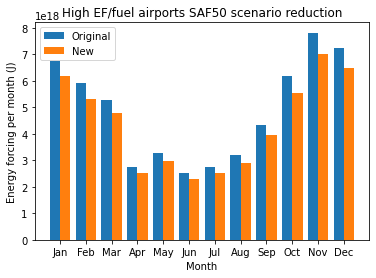

In [139]:
monthnum = np.arange(len(months))
plt.title("High EF/fuel airports SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, highefpromonthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [140]:
(jetamonthly['total_contrail_energy_forcing'].sum()-highefpromonthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

9.435380059743387

9.44% EF Reduction

### Destination scenario

#### 1. EF/Fuel Proportion

In [1231]:
dnamed[dnamed['No. flights'] > 1000].sort_values(by = ['Proportion of flights in High EF/fuel (%)']).tail(18)

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),ISO3,Luton flights,Luton EF/fuel
DK,14217.0,4.246562e+07,3.088758e+17,7.142470e+09,921.0,2.915715e+06,2.974537e+17,1.048300e+11,14217.0,4.236087e+07,2.737449e+17,7.441441e+09,100.0,DNK,304.0,7.432197e+09
NO,10173.0,3.480449e+07,2.768800e+17,6.975347e+09,736.0,2.987414e+06,2.724213e+17,9.284410e+10,10173.0,3.469016e+07,2.288836e+17,6.141209e+09,100.0,NOR,249.0,2.241946e+10
CH,26305.0,7.300307e+07,5.080887e+17,6.965593e+09,1813.0,5.375495e+06,4.779147e+17,9.370185e+10,26305.0,7.294219e+07,4.694453e+17,6.891753e+09,100.0,CHE,2308.0,6.452350e+09
BG,5253.0,3.569396e+07,4.769670e+17,1.336650e+10,1107.0,7.626320e+06,4.840108e+17,6.415450e+10,5253.0,3.553414e+07,3.883938e+17,1.135265e+10,100.0,BGR,1230.0,2.167933e+10
PT,28850.0,1.641782e+08,1.302321e+18,7.966225e+09,3804.0,2.254961e+07,1.390429e+18,6.370210e+10,28850.0,1.636823e+08,1.115202e+18,7.310899e+09,100.0,PRT,2465.0,1.167301e+10
LT,3110.0,1.638037e+07,2.585254e+17,1.538972e+10,543.0,2.932885e+06,2.672918e+17,9.099199e+10,3110.0,1.628164e+07,1.970798e+17,1.425047e+10,100.0,LTU,1479.0,1.671486e+10
UA,1906.0,1.172254e+07,1.297196e+17,1.091462e+10,346.0,2.228826e+06,1.382811e+17,6.386826e+10,1906.0,1.163933e+07,8.944026e+16,3.386603e+09,100.0,UKR,385.0,1.253308e+10
SK,2071.0,9.660677e+06,1.270973e+17,1.311100e+10,291.0,1.394621e+06,1.323562e+17,9.566162e+10,2071.0,9.610131e+06,9.150572e+16,7.611307e+09,100.0,SVK,727.0,2.343243e+10
MA,4690.0,3.443626e+07,3.366056e+17,9.628672e+09,817.0,6.210731e+06,3.481416e+17,5.681926e+10,4690.0,3.428265e+07,2.770169e+17,1.107762e+10,100.0,MAR,193.0,5.430791e+09
TN,1161.0,8.216943e+06,3.142175e+16,4.335946e+09,141.0,9.705186e+05,4.336724e+16,4.614587e+10,1161.0,8.200726e+06,2.953678e+16,4.652765e+09,100.0,TUN,26.0,7.206121e+09


In [1243]:
highefpfind = dnamed[dnamed['No. flights'] > 1000].sort_values(by = ['Proportion of flights in High EF/fuel (%)']).tail(24).index
destinationflights = pd.DataFrame()

for i in highefpfind:
    df = alljeta[alljeta['destination_country'] == i]
    destinationflights = pd.concat([destinationflights,df])

destinationflights['total_fuel_burn'].sum()

2389826569.543384

In [1244]:
destinationind = destinationflights.index
replace = allsaf50.loc[destinationind,:]
destination = alljeta.drop(index = destinationind)
destination = pd.concat([destination,replace]).sort_index()
destination

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1244.392841,CFM56-7B27E,64242.485876,3.822508e+14,0.000000e+00,NaN
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,3.235051e+14,0.000000e+00,NaN
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


In [1245]:
destinationmonthly = destination.copy()
destinationmonthly = destinationmonthly.set_index(destinationmonthly['first_waypoint_time'].values)
destinationmonthly = destinationmonthly.resample('M').sum()

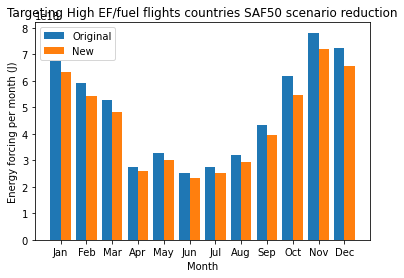

In [1246]:
monthnum = np.arange(len(months))
plt.title("Targeting High EF/fuel flights countries SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, destinationmonthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1247]:
(jetamonthly['total_contrail_energy_forcing'].sum()-destinationmonthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

8.248739673962778

8.25% EF Reduction

#### 2. High EF/Fuel

In [442]:
dnamed

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%)
US,61420.0,3.383175e+09,1.364965e+19,4.082188e+09,23843.0,1.438041e+09,1.442720e+19,1.103035e+10,13805.0,7.886830e+08,1.244490e+19,1.676974e+10,22.476392
SG,3159.0,4.155193e+08,1.351607e+18,3.323037e+09,2039.0,2.698398e+08,1.360206e+18,5.176423e+09,656.0,8.418039e+07,9.027646e+17,1.076383e+10,20.766065
KR,1402.0,9.548339e+07,3.388512e+17,3.830452e+09,504.0,3.501152e+07,3.382096e+17,1.065525e+10,288.0,1.877277e+07,2.932176e+17,1.648638e+10,20.542083
PK,1240.0,5.732011e+07,3.747006e+17,6.422828e+09,577.0,2.742937e+07,3.688901e+17,1.357261e+10,376.0,1.792489e+07,3.369275e+17,1.902550e+10,30.322581
CN,4679.0,2.906797e+08,1.880203e+18,6.409309e+09,2405.0,1.581176e+08,1.894568e+18,1.254082e+10,1505.0,9.652701e+07,1.697485e+18,1.811506e+10,32.164993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ML,1.0,1.453404e+04,6.725588e+12,4.627473e+08,0.0,0.000000e+00,0.000000e+00,NaN,0.0,0.000000e+00,0.000000e+00,NaN,0.000000
CW,1.0,4.801227e+04,9.495953e+14,1.977818e+10,1.0,4.801227e+04,9.495953e+14,1.977818e+10,1.0,4.801227e+04,9.495953e+14,1.977818e+10,100.000000
CI,2.0,1.369196e+04,1.102562e+14,9.311802e+09,1.0,5.917183e+03,1.100180e+14,1.859297e+10,1.0,5.917183e+03,1.100180e+14,1.859297e+10,50.000000
MM,2.0,3.135156e+04,8.846253e+13,2.822304e+09,0.0,0.000000e+00,0.000000e+00,NaN,0.0,0.000000e+00,0.000000e+00,NaN,0.000000


In [450]:
dnamed[dnamed['No. flights'] > 1000].sort_values(by = ['EF/fuel']).tail(30)

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%)
ES,136328.0,8.319381e+08,4.841423e+18,6.246212e+09,16320.0,1.102189e+08,5.323729e+18,5.534284e+10,23274.0,1.467982e+08,5.673500e+18,4.184335e+10,17.072061
CN,4679.0,2.906797e+08,1.880203e+18,6.409309e+09,2405.0,1.581176e+08,1.894568e+18,1.254082e+10,1505.0,9.652701e+07,1.697485e+18,1.811506e+10,32.164993
PK,1240.0,5.732011e+07,3.747006e+17,6.422828e+09,577.0,2.742937e+07,3.688901e+17,1.357261e+10,376.0,1.792489e+07,3.369275e+17,1.902550e+10,30.322581
CH,26305.0,7.300307e+07,5.080887e+17,6.965593e+09,1813.0,5.375495e+06,4.779147e+17,9.370185e+10,3916.0,1.113094e+07,5.605816e+17,5.159334e+10,14.886904
NO,10173.0,3.480449e+07,2.768800e+17,6.975347e+09,736.0,2.987414e+06,2.724213e+17,9.284410e+10,1345.0,5.005332e+06,2.974956e+17,5.703588e+10,13.221272
EG,2756.0,4.465008e+07,2.761512e+17,7.099839e+09,684.0,1.159608e+07,2.769589e+17,2.872516e+10,649.0,1.012868e+07,2.715957e+17,3.014600e+10,23.548621
DK,14217.0,4.246562e+07,3.088758e+17,7.142470e+09,921.0,2.915715e+06,2.974537e+17,1.048300e+11,1830.0,5.535115e+06,3.334129e+17,6.002718e+10,12.871914
GR,21907.0,1.748606e+08,1.308185e+18,7.246250e+09,3472.0,2.947055e+07,1.333346e+18,4.654344e+10,4247.0,3.553128e+07,1.379926e+18,3.948887e+10,19.386497
CY,8979.0,9.640368e+07,7.209073e+17,7.513574e+09,1891.0,2.092178e+07,7.409716e+17,3.658011e+10,2078.0,2.254396e+07,7.526720e+17,3.391201e+10,23.142889
IT,56357.0,2.367983e+08,1.752259e+18,7.534472e+09,5364.0,2.345014e+07,1.729823e+18,7.745404e+10,9310.0,3.934684e+07,1.908525e+18,4.963136e+10,16.519687


In [452]:
highefpfind2 = dnamed[dnamed['No. flights'] > 1000].sort_values(by = ['EF/fuel']).tail(29).index
destinationflights2 = pd.DataFrame()

for i in highefpfind2:
    df = alljeta[alljeta['destination_country'] == i]
    destinationflights2 = pd.concat([destinationflights2,df])

destinationflights2['total_fuel_burn'].sum()

2208838857.028564

In [453]:
destination2ind = destinationflights2.index
replace = allsaf50.loc[destination2ind,:]
destination2 = alljeta.drop(index = destination2ind)
destination2 = pd.concat([destination2,replace]).sort_index()
destination2

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


In [454]:
destination2monthly = destination2.copy()
destination2monthly = destination2monthly.set_index(destination2monthly['first_waypoint_time'].values)
destination2monthly = destination2monthly.resample('M').sum()

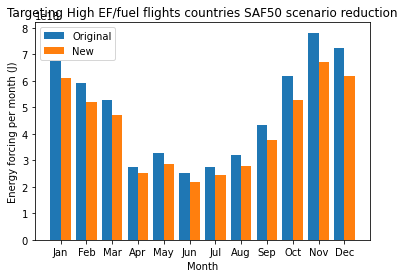

In [455]:
monthnum = np.arange(len(months))
plt.title("Targeting High EF/fuel flights countries SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, destination2monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [456]:
(jetamonthly['total_contrail_energy_forcing'].sum()-destination2monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

12.308275899026794

12.3% EF Reduction

#### 3. European routes

In [1249]:
dnamed[dnamed['No. flights'] > 1000].sort_values(by = ['EF/fuel']).tail(40)

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),ISO3,Luton flights,Luton EF/fuel
US,61420.0,3.383175e+09,1.364965e+19,4.082188e+09,23843.0,1.438041e+09,1.442720e+19,1.103035e+10,61420.0,3.380162e+09,1.285899e+19,3.998926e+09,100.0,USA,1002.0,5.203324e+09
JP,2325.0,1.726588e+08,7.906150e+17,4.173416e+09,1138.0,9.581851e+07,7.972474e+17,8.579777e+09,2325.0,1.726588e+08,7.906987e+17,4.184165e+09,100.0,JPN,11.0,-7.041741e+08
TN,1161.0,8.216943e+06,3.142175e+16,4.335946e+09,141.0,9.705186e+05,4.336724e+16,4.614587e+10,1161.0,8.200726e+06,2.953678e+16,4.652765e+09,100.0,TUN,26.0,7.206121e+09
NG,1133.0,4.691219e+07,1.602033e+17,4.403274e+09,420.0,1.762046e+07,1.569381e+17,1.158349e+10,1133.0,4.690928e+07,1.581766e+17,3.566107e+09,100.0,NGA,38.0,2.231403e+10
ZA,3031.0,2.572994e+08,1.004180e+18,4.424414e+09,2013.0,1.672832e+08,9.902525e+17,6.556014e+09,3031.0,2.572294e+08,9.827309e+17,4.394912e+09,100.0,ZAF,3.0,5.418055e+07
MT,5563.0,3.726622e+07,1.716462e+17,4.581752e+09,560.0,3.869905e+06,1.754527e+17,4.607181e+10,5563.0,3.716393e+07,1.503271e+17,4.058526e+09,100.0,MLT,368.0,4.132581e+09
TH,1732.0,1.645649e+08,7.266409e+17,4.593819e+09,998.0,9.593020e+07,7.218669e+17,7.906981e+09,1732.0,1.645484e+08,7.265483e+17,4.728075e+09,100.0,THA,12.0,1.256460e+09
HR,5525.0,2.823239e+07,1.275221e+17,4.799627e+09,468.0,2.388701e+06,1.316073e+17,5.771218e+10,5525.0,2.814261e+07,1.125724e+17,4.997784e+09,100.0,HRV,418.0,9.505251e+09
GI,1719.0,9.607939e+06,5.501336e+16,5.630523e+09,185.0,1.069204e+06,7.368089e+16,6.925223e+10,1719.0,9.577085e+06,4.811624e+16,6.165872e+09,100.0,GIB,86.0,8.829615e+09
HK,3928.0,3.390291e+08,2.008648e+18,5.837906e+09,2556.0,2.292082e+08,2.015337e+18,8.988332e+09,3928.0,3.388423e+08,1.979359e+18,6.072529e+09,100.0,HKG,28.0,3.461375e+09


In [1250]:
eucountries = ['EL',
               'AD',
               'AT',
               'BY',
               'BE',
               'BA',
               'BG',
               'HR',
               'CY'
               'CZ',
               'DK',
               'EE',
               'FI',
               'FR',
               'DE',
               'GE',
               'GR',
               'HU',
               'IS',
               'IT',
               'LV',
               'LI',
               'LT',
               'LU',
               'MT',
               'MD',
               'MC',
               'ME',
               'NL',
               'MK',
               'NO',
               'PL',
               'PT',
               'RO',
               'RU',
               'SM',
               'RS',
               'SK',
               'SI',
               'ES',
               'SE',
               'CH',
               'TR',
               'UA',
              ]               

In [1251]:
euflights = pd.DataFrame()

for i in eucountries:
    df = alljeta[alljeta['destination_country'] == i]
    euflights = pd.concat([euflights,df])

euflights['total_fuel_burn'].sum()

2751225746.5009055

In [1215]:
euflights[euflights['first_waypoint_time'].dt.month == 6]['total_fuel_burn'].sum()

1038884445.3823425

In [559]:
euflightsind = euflights.index
replace = allsaf50.loc[euflightsind,:]
euflights = alljeta.drop(index = euflightsind)
euflights = pd.concat([euflights,replace]).sort_index()
euflights

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,3.235051e+14,0.000000e+00,NaN
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


In [560]:
euflightsmonthly = euflights.copy()
euflightsmonthly = euflightsmonthly.set_index(euflightsmonthly['first_waypoint_time'].values)
euflightsmonthly = euflightsmonthly.resample('M').sum()

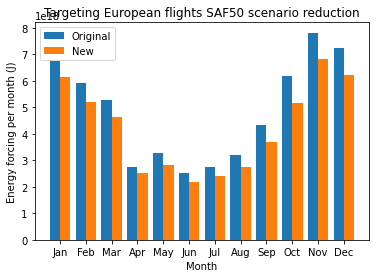

In [1253]:
monthnum = np.arange(len(months))
plt.title("Targeting European flights SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, euflightsmonthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [562]:
(jetamonthly['total_contrail_energy_forcing'].sum()-euflightsmonthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

12.738423300950913

12.74% EF Reduction

#### 4. Large Asian Routes

In [565]:
dnamed[dnamed['No. flights'] > 1000].sort_values(by = ['No. flights']).tail(70)

,No. flights,Annual fuel demand,Annual EF,EF/fuel,High EF flights,High EF fuel,High EF EF,High EF average EF/fuel,High EF/fuel flights,High EF/fuel fuel,High EF/fuel EF,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%)
NG,1133.0,4.691219e+07,1.602033e+17,4.403274e+09,420.0,1.762046e+07,1.569381e+17,1.158349e+10,234.0,8.785859e+06,1.273408e+17,1.819606e+10,20.653133
KW,1151.0,4.285189e+07,1.433036e+17,3.186869e+09,370.0,1.486340e+07,1.368465e+17,9.353190e+09,221.0,8.653904e+06,1.147281e+17,1.330256e+10,19.200695
LB,1154.0,1.597024e+07,3.306002e+17,2.531333e+10,459.0,5.611611e+06,3.276510e+17,6.311838e+10,463.0,5.530402e+06,3.275694e+17,6.268444e+10,40.121317
TN,1161.0,8.216943e+06,3.142175e+16,4.335946e+09,141.0,9.705186e+05,4.336724e+16,4.614587e+10,187.0,1.277281e+06,4.596539e+16,3.690623e+10,16.106804
PK,1240.0,5.732011e+07,3.747006e+17,6.422828e+09,577.0,2.742937e+07,3.688901e+17,1.357261e+10,376.0,1.792489e+07,3.369275e+17,1.902550e+10,30.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
IT,56357.0,2.367983e+08,1.752259e+18,7.534472e+09,5364.0,2.345014e+07,1.729823e+18,7.745404e+10,9310.0,3.934684e+07,1.908525e+18,4.963136e+10,16.519687
US,61420.0,3.383175e+09,1.364965e+19,4.082188e+09,23843.0,1.438041e+09,1.442720e+19,1.103035e+10,13805.0,7.886830e+08,1.244490e+19,1.676974e+10,22.476392
DE,65804.0,1.881998e+08,1.439363e+18,7.547695e+09,4737.0,1.525641e+07,1.376599e+18,9.882930e+10,9586.0,2.859485e+07,1.565657e+18,5.666805e+10,14.567503
ES,136328.0,8.319381e+08,4.841423e+18,6.246212e+09,16320.0,1.102189e+08,5.323729e+18,5.534284e+10,23274.0,1.467982e+08,5.673500e+18,4.184335e+10,17.072061


In [575]:
asiancountries = ['AE',
'TR',
'QA',
'IN',
'CN',
'HK',
'SG',
'JP',
'TH',
'KR',
'BH',
'OM',
'MY',
'PK',
'KW']

In [577]:
asianflights = pd.DataFrame()

for i in asiancountries:
    df = alljeta[alljeta['destination_country'] == i]
    asianflights = pd.concat([asianflights,df])

asianflights['total_fuel_burn'].sum()

3182258701.5723257

In [579]:
asianflightsind = asianflights.index
replace = allsaf50.loc[asianflightsind,:]
asianflights = alljeta.drop(index = asianflightsind)
asianflights = pd.concat([asianflights,replace]).sort_index()
asianflights

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.0
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.0
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.0
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,69863.709320,Trent 1000-J3,212993.600171,2.286080e+14,1.243435e+14,NaN
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,61947.414538,Trent XWB-84,224787.094430,2.325863e+14,-6.209031e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.0
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.0
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.0


In [580]:
asianflightsmonthly = asianflights.copy()
asianflightsmonthly = asianflightsmonthly.set_index(asianflightsmonthly['first_waypoint_time'].values)
asianflightsmonthly = asianflightsmonthly.resample('M').sum()

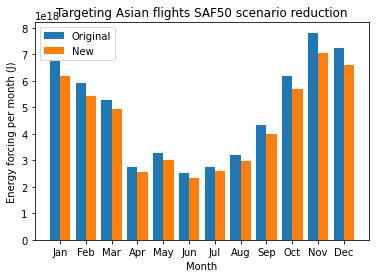

In [1254]:
monthnum = np.arange(len(months))
plt.title("Targeting Asian flights SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, asianflightsmonthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [582]:
(jetamonthly['total_contrail_energy_forcing'].sum()-asianflightsmonthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

7.930768356725637

7.93% EF Reduction

#### 5. US Routes

In [1217]:
usflights = pd.DataFrame()

usflights = alljeta[alljeta['destination_country'] == 'US']

usflights['total_fuel_burn'].sum()

3383174974.008797

In [1218]:
usflightsind = usflights.index
replace = allsaf50.loc[usflightsind,:]
usflights = alljeta.drop(index = usflightsind)
usflights = pd.concat([usflights,replace]).sort_index()
usflights

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48428.682093,Trent 892,215515.305705,2.452942e+14,0.000000e+00,NaN
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81476.857435,CF6-80C2B1F,283658.699389,5.120932e+14,0.000000e+00,NaN
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58363.781882,GE90-115B,262594.172313,1.549884e+14,0.000000e+00,NaN
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.000000e+00


In [1219]:
usflightsmonthly = usflights.copy()
usflightsmonthly = usflightsmonthly.set_index(usflightsmonthly['first_waypoint_time'].values)
usflightsmonthly = usflightsmonthly.resample('M').sum()

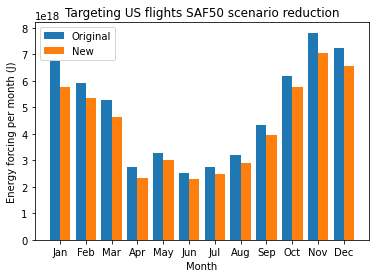

In [1220]:
monthnum = np.arange(len(months))
plt.title("Targeting US flights SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, usflightsmonthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1221]:
(jetamonthly['total_contrail_energy_forcing'].sum()-usflightsmonthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

10.084075586138013

10.08% EF Reduction

### Mixed scenarios

#### 1. High EF/fuel hours

In [1339]:
mixed1 = alljeta.copy()
mixed1flights = pd.DataFrame()
screen = highefpfmonthhourefpf > 5.15e10

for i in monthnum:
    for j in hours:
        if screen.iloc[j,i] == True:
            dfm = mixed1[mixed1['first_waypoint_time'].dt.month == i+1]
            dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
            mixed1flights = pd.concat([mixed1flights,dfh])

mixed1flights['total_fuel_burn'].sum()

2266085192.528937

In [1340]:
mixed1count = pd.DataFrame(index = hours,columns = months)

for i in np.arange(0,12):
    dfm = mixed1flights[mixed1flights['first_waypoint_time'].dt.month == i+1]
    for j in hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed1count.iloc[j,i] = len(dfh.index)

mixed1count

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,242,0,0,0,177,203
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,5875,0
9,0,0,0,0,0,0,0,0,0,0,0,0


In [1341]:
mixed1ind = mixed1flights.index
replace = allsaf50.loc[mixed1ind,:]
mixed1 = alljeta.drop(index = mixed1ind)
mixed1 = pd.concat([mixed1,replace]).sort_index()
mixed1

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.000000e+00


In [1342]:
mixed1monthly = mixed1.copy()
mixed1monthly = mixed1monthly.set_index(mixed1monthly['first_waypoint_time'].values)
mixed1monthly = mixed1monthly.resample('M').sum()

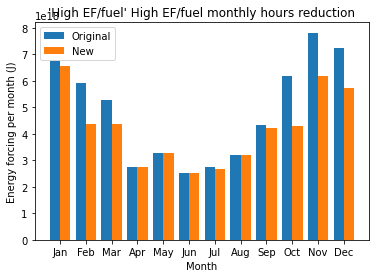

In [1361]:
monthnum = np.arange(len(months))
plt.title("'High EF/fuel' High EF/fuel monthly hours reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, mixed1monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1344]:
(jetamonthly['total_contrail_energy_forcing'].sum()-mixed1monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

13.562152135924624

13.56% EF Reduction

#### 2. Oct-Feb 14:00-05:00

In [365]:
highefpfmonthhourpro[highefpfmonthhourpro > 23]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,25.165563,25.503356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.870968,NaN,23.308271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.769231,31.818182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.315789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1346]:
mixed2 = alljeta.copy()
mixed2month = [1,2,10,11,12]

mixed2hours1 = np.arange(0,5)
mixed2hours2 = np.arange(14,24)
mixed2hours = np.hstack((mixed2hours1,mixed2hours2))

mixed2flights = pd.DataFrame()

for i in mixed2month:
    dfm = mixed2[mixed2['first_waypoint_time'].dt.month == i]
    for j in mixed2hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed2flights = pd.concat([mixed2flights,dfh])

mixed2flights['total_fuel_burn'].sum()

2330123181.7144175

In [1347]:
mixed2count = pd.DataFrame(index = hours,columns = months)

for i in np.arange(0,12):
    dfm = mixed2flights[mixed2flights['first_waypoint_time'].dt.month == i+1]
    for j in hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed2count.iloc[j,i] = len(dfh.index)

mixed2count

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,151,149,0,0,0,0,0,0,0,288,177,203
1,148,163,0,0,0,0,0,0,0,205,245,243
2,155,141,0,0,0,0,0,0,0,128,167,201
3,91,88,0,0,0,0,0,0,0,205,105,119
4,95,107,0,0,0,0,0,0,0,611,196,182
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0


In [1348]:
mixed2ind = mixed2flights.index
replace = allsaf50.loc[mixed2ind,:]
mixed2 = alljeta.drop(index = mixed2ind)
mixed2 = pd.concat([mixed2,replace]).sort_index()
mixed2

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48428.682093,Trent 892,215515.305705,2.452942e+14,0.000000e+00,NaN
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81476.857435,CF6-80C2B1F,283658.699389,5.120932e+14,0.000000e+00,NaN
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58363.781882,GE90-115B,262594.172313,1.549884e+14,0.000000e+00,NaN
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,69863.709320,Trent 1000-J3,212993.600171,2.286080e+14,1.243435e+14,NaN
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,61947.414538,Trent XWB-84,224787.094430,2.325863e+14,-6.209031e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1244.392841,CFM56-7B27E,64242.485876,3.822508e+14,0.000000e+00,NaN
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,3.235051e+14,0.000000e+00,NaN
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


In [1349]:
mixed2monthly = mixed2.copy()
mixed2monthly = mixed2monthly.set_index(mixed2monthly['first_waypoint_time'].values)
mixed2monthly = mixed2monthly.resample('M').sum()

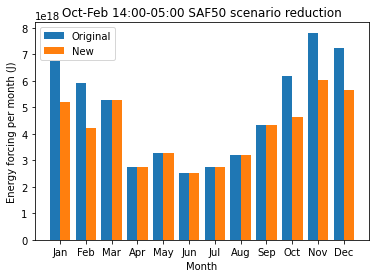

In [1352]:
monthnum = np.arange(len(months))
plt.title("Oct-Feb 14:00-05:00 SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, mixed2monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1351]:
(jetamonthly['total_contrail_energy_forcing'].sum()-mixed2monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

14.077886882652695

14.1% EF Reduction

#### 3. Highest average EF/fuel hours

In [1353]:
monthhourefpf[monthhourefpf > 1e10]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12895420512.942747,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1355]:
mixed3 = alljeta.copy()
mixed3flights = pd.DataFrame()
screen = monthhourefpf > 1.1e10

for i in monthnum:
    for j in hours:
        if screen.iloc[j,i] == True:
            dfm = mixed3[mixed3['first_waypoint_time'].dt.month == i+1]
            dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
            mixed3flights = pd.concat([mixed3flights,dfh])

mixed3flights['total_fuel_burn'].sum()

2353796934.1635213

In [1356]:
mixed3count = pd.DataFrame(index = hours,columns = months)

for i in np.arange(0,12):
    dfm = mixed3flights[mixed3flights['first_waypoint_time'].dt.month == i+1]
    for j in hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed3count.iloc[j,i] = len(dfh.index)

mixed3count

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,177,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0


In [1357]:
mixed3ind = mixed3flights.index
replace = allsaf50.loc[mixed3ind,:]
mixed3 = alljeta.drop(index = mixed3ind)
mixed3 = pd.concat([mixed3,replace]).sort_index()
mixed3

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.000000e+00


In [1358]:
mixed3monthly = mixed3.copy()
mixed3monthly = mixed3monthly.set_index(mixed3monthly['first_waypoint_time'].values)
mixed3monthly = mixed3monthly.resample('M').sum()

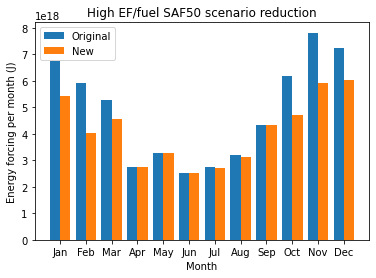

In [1360]:
monthnum = np.arange(len(months))
plt.title("High EF/fuel SAF50 scenario reduction")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, mixed3monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [432]:
(jetamonthly['total_contrail_energy_forcing'].sum()-mixed3monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

14.815975344523608

14.82% EF Reduction

#### 4. London airports winter months

In [1405]:
mixed4 = pd.DataFrame()
mixedairports = ['EGLL','EGKK','EGSS','EGGW','EGLC','EGMC']

for a in mixedairports:
    df = alljeta[alljeta['origin_airport'] == a]
    mixed4 = pd.concat([mixed4,df])

mixed4month = [1,2,3,10,11,12]

mixed4hours1 = np.arange(0,4)
mixed4hours2 = np.arange(14,24)
mixed4hours = np.hstack((mixed4hours1,mixed4hours2))

mixed4flights = pd.DataFrame()

for i in mixed4month:
    dfm = mixed4[mixed4['first_waypoint_time'].dt.month == i]
    for j in mixed4hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed4flights = pd.concat([mixed4flights,dfh])

mixed4flights['total_fuel_burn'].sum()

2117668757.9262052

In [1363]:
mixed4count = pd.DataFrame(index = hours,columns = months)

for i in np.arange(0,12):
    dfm = mixed4flights[mixed4flights['first_waypoint_time'].dt.month == i+1]
    for j in hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed4count.iloc[j,i] = len(dfh.index)

mixed4count

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,103,97,105,0,0,0,0,0,0,79,77,98
1,34,37,49,0,0,0,0,0,0,35,56,72
2,50,61,51,0,0,0,0,0,0,47,49,46
3,49,50,66,0,0,0,0,0,0,46,36,35
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0


In [1364]:
mixed4ind = mixed4flights.index
replace = allsaf50.loc[mixed4ind,:]
mixed4 = alljeta.drop(index = mixed4ind)
mixed4 = pd.concat([mixed4,replace]).sort_index()
mixed4

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48428.682093,Trent 892,215515.305705,2.452942e+14,0.000000e+00,NaN
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81476.857435,CF6-80C2B1F,283658.699389,5.120932e+14,0.000000e+00,NaN
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58363.781882,GE90-115B,262594.172313,1.549884e+14,0.000000e+00,NaN
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,69863.709320,Trent 1000-J3,212993.600171,2.286080e+14,1.243435e+14,NaN
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,61947.414538,Trent XWB-84,224787.094430,2.325863e+14,-6.209031e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.0
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,3.235051e+14,0.000000e+00,NaN
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


In [1365]:
mixed4monthly = mixed4.copy()
mixed4monthly = mixed4monthly.set_index(mixed4monthly['first_waypoint_time'].values)
mixed4monthly = mixed4monthly.resample('M').sum()

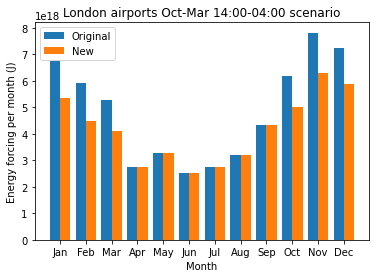

In [1369]:
monthnum = np.arange(len(months))
plt.title("London airports Oct-Mar 14:00-04:00 scenario")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, mixed4monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1370]:
(jetamonthly['total_contrail_energy_forcing'].sum()-mixed4monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

13.86821118142877

13.87% EF Reduction

#### 5. High EF/fuel countries screen flights

In [1371]:
monthhourefpf[monthhourefpf > 9e9]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12895420512.942747,9135578829.037746
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9211051313.423759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1373]:
mixed5 = pd.DataFrame()
mixed5countries = dnamed[dnamed['No. flights'] > 00].sort_values(by = ['EF/fuel']).tail(80).index

for a in mixed5countries:
    df = alljeta[alljeta['destination_country'] == a]
    mixed5 = pd.concat([mixed5,df])

screen = monthhourefpf > 9e9
mixed5flights = pd.DataFrame()

for i in monthnum:
    for j in hours:
        if screen.iloc[j,i-1] == True:
            dfm = mixed5[mixed5['first_waypoint_time'].dt.month == i]
            dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
            mixed5flights = pd.concat([mixed5flights,dfh])

mixed5flights['total_fuel_burn'].sum()

2110601287.4341407

In [1374]:
mixed5count = pd.DataFrame(index = hours,columns = months)

for i in np.arange(0,12):
    dfm = mixed5flights[mixed5flights['first_waypoint_time'].dt.month == i+1]
    for j in hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed5count.iloc[j,i] = len(dfh.index)

mixed5count

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,73,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,62,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0


In [1375]:
mixed5flights

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
52446,B734,Jet,EGNX,East Midlands Airport,GB,FR,2019-01-24 03:24:36.000,1.24,876.24,0.823906,3076.433389,CFM56-3C-1,54530.148678,9.146866e+14,0.000000e+00,0.000000e+00
68186,B734,Jet,EGNX,East Midlands Airport,GB,FR,2019-01-31 03:26:17.000,1.26,886.09,0.826235,3029.666681,CFM56-3C-1,54450.449610,1.017878e+15,0.000000e+00,0.000000e+00
39059,B748,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-18 03:14:31.000,9.79,8857.43,0.821910,81185.469706,GEnx-2B67/P,355391.277405,3.819284e+12,5.942980e+13,7.320250e+08
2042,B763,Jet,EGNX,East Midlands Airport,GB,US,2019-01-02 03:50:08.651,8.14,6481.00,0.824372,39440.505031,CF6-80C2B6F,152471.926908,6.953570e+14,4.070546e+14,1.032072e+10
4477,B763,Jet,EGNX,East Midlands Airport,GB,US,2019-01-03 03:56:49.359,7.72,5808.04,0.824106,34682.841796,CF6-80C2B6F,148212.156989,6.230133e+14,2.448468e+14,7.059594e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903755,A320,Jet,EGGW,London Luton Airport,GB,MD,2019-11-01 23:12:32.000,2.59,2196.31,0.840573,6048.957909,V2527-A5,64160.337062,4.196860e+15,5.190816e+14,8.581339e+10
940757,A321,Jet,EGGW,London Luton Airport,GB,RU,2019-11-14 23:03:40.000,2.67,2191.72,0.836681,7127.066753,V2533-A5,72680.633896,3.943376e+15,3.189133e+13,4.474678e+09
952045,A321,Jet,EGGW,London Luton Airport,GB,RU,2019-11-18 23:02:26.000,2.79,2140.99,0.837619,7482.648613,V2533-A5,72994.661509,3.744797e+15,0.000000e+00,0.000000e+00
954696,F2TH,Jet,EGGW,London Luton Airport,GB,RU,2019-11-19 23:48:04.116,3.12,2511.59,0.838032,2583.195618,PW308C BS 1289,14753.505707,4.505498e+15,2.451901e+14,9.491735e+10


In [1376]:
mixed5ind = mixed5flights.sort_index().index
replace = allsaf50.loc[mixed5ind,:]
mixed5 = alljeta.drop(index = mixed5ind)
mixed5 = pd.concat([mixed5,replace]).sort_index()
mixed5

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48589.087594,Trent 892,215605.104395,8.274506e+14,0.000000e+00,0.000000e+00
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81485.297912,CF6-80C2B1F,283659.878159,8.032157e+14,0.000000e+00,0.000000e+00
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58388.405387,GE90-115B,262598.787908,3.021422e+14,0.000000e+00,0.000000e+00
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.000000e+00


In [1377]:
mixed5monthly = mixed5.copy()
mixed5monthly = mixed5monthly.set_index(mixed5monthly['first_waypoint_time'].values)
mixed5monthly = mixed5monthly.resample('M').sum()

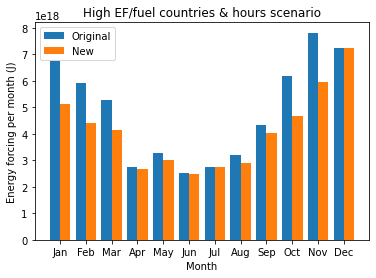

In [1379]:
monthnum = np.arange(len(months))
plt.title("High EF/fuel countries & hours scenario")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, mixed5monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1380]:
(jetamonthly['total_contrail_energy_forcing'].sum()-mixed5monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

14.84376014559681

14.84% EF reduction

#### 6. High EF/fuel countries winter 13:00-08:00 flights

In [1381]:
dnamed[dnamed['No. flights'] > 00].sort_values(by = ['EF/fuel']).tail(80).index

Index(['BD', 'FR', 'KR', 'FO', 'BA', 'US', 'JP', 'AG', 'TN', 'NG', 'ZA', 'MT',
       'TH', 'HR', 'GH', 'LK', 'DZ', 'AR', 'GI', 'EE', 'HK', 'LY', 'ES', 'TT',
       'CN', 'PK', 'AI', 'CH', 'NO', 'EG', 'DK', 'SI', 'GR', 'CL', 'CY', 'IT',
       'IL', 'DE', 'MR', 'GP', 'BY', 'PT', 'SE', 'UZ', 'IS', 'MO', 'CI', 'MV',
       'FI', 'MA', 'CZ', 'BM', 'KZ', 'UA', 'IQ', 'LV', 'AT', 'SK', 'BG', 'GE',
       'TR', 'MK', 'CO', 'TM', 'PL', 'AO', 'LT', 'RS', 'HU', 'GA', 'CW', 'GD',
       'RO', 'MD', 'JO', 'LB', 'VG', 'RU', 'AL', 'KY'],
      dtype='object')

In [1382]:
mixed6countries = dnamed[dnamed['No. flights'] > 00].sort_values(by = ['EF/fuel']).tail(80).index

In [1384]:
mixed6 = pd.DataFrame()

for a in mixed6countries:
    df = alljeta[alljeta['destination_country'] == a]
    mixed6 = pd.concat([mixed6,df])

mixed6month = [1,2,3,10,11,12]
mixed6hours1 = np.arange(0,8)
mixed6hours2 = np.arange(13,24)
mixed6hours = np.hstack((mixed6hours1,mixed6hours2))
mixed6flights = pd.DataFrame()

for i in mixed6month:
    dfm = mixed6[mixed6['first_waypoint_time'].dt.month == i]
    for j in mixed6hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed6flights = pd.concat([mixed6flights,dfh])

mixed6flights['total_fuel_burn'].sum()

2294761372.963583

In [1385]:
mixed6ind = mixed6flights.sort_index().index
replace = allsaf50.loc[mixed6ind,:]
mixed6 = alljeta.drop(index = mixed6ind)
mixed6 = pd.concat([mixed6,replace]).sort_index()
mixed6

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48428.682093,Trent 892,215515.305705,2.452942e+14,0.000000e+00,NaN
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81476.857435,CF6-80C2B1F,283658.699389,5.120932e+14,0.000000e+00,NaN
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58363.781882,GE90-115B,262594.172313,1.549884e+14,0.000000e+00,NaN
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,61947.414538,Trent XWB-84,224787.094430,2.325863e+14,-6.209031e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


In [1386]:
mixed6monthly = mixed6.copy()
mixed6monthly = mixed6monthly.set_index(mixed6monthly['first_waypoint_time'].values)
mixed6monthly = mixed6monthly.resample('M').sum()

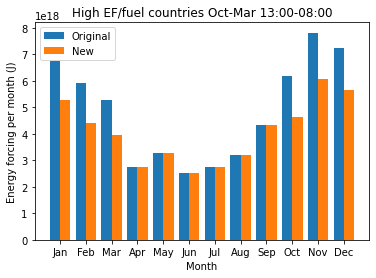

In [1389]:
monthnum = np.arange(len(months))
plt.title("High EF/fuel countries Oct-Mar 13:00-08:00")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, mixed6monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1388]:
(jetamonthly['total_contrail_energy_forcing'].sum()-mixed6monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

15.779102027207351

15.78% EF Reduction

#### 7. London and busy airports winter high EF/fuel destinations

In [1390]:
aps.sort_values(by = ['Annual fuel demand']).tail(10)

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
East Midlands Airport,EGNX,20948,1.280745e+08,7.163839e+17,2216,3.100627e+07,3.232779e+14,7.346856e+17,2921,2.907607e+07,3.226842e+10,13.944052,4.065776e+09,3.856864e+10,10.578576
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10,11.123259,4.276552e+09,6.085028e+10,6.691964
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,3.292883e+09,4.643022e+10,7.254897
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10,11.867102,4.247587e+09,5.439489e+10,7.338070
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10,7.966643
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10,10.733075
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127


In [1391]:
dnamed[dnamed['No. flights'] > 00].sort_values(by = ['EF/fuel']).tail(80).index

Index(['BD', 'FR', 'KR', 'FO', 'BA', 'US', 'JP', 'AG', 'TN', 'NG', 'ZA', 'MT',
       'TH', 'HR', 'GH', 'LK', 'DZ', 'AR', 'GI', 'EE', 'HK', 'LY', 'ES', 'TT',
       'CN', 'PK', 'AI', 'CH', 'NO', 'EG', 'DK', 'SI', 'GR', 'CL', 'CY', 'IT',
       'IL', 'DE', 'MR', 'GP', 'BY', 'PT', 'SE', 'UZ', 'IS', 'MO', 'CI', 'MV',
       'FI', 'MA', 'CZ', 'BM', 'KZ', 'UA', 'IQ', 'LV', 'AT', 'SK', 'BG', 'GE',
       'TR', 'MK', 'CO', 'TM', 'PL', 'AO', 'LT', 'RS', 'HU', 'GA', 'CW', 'GD',
       'RO', 'MD', 'JO', 'LB', 'VG', 'RU', 'AL', 'KY'],
      dtype='object')

In [1392]:
monthhourefpf[monthhourefpf > 1e10]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12895420512.942747,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


User defined

In [1394]:
mixed7 = pd.DataFrame()
mixed7airports = ['EGLL','EGKK','EGSS','EGGW','EGLC','EGMC','EGCC'] #

for a in mixed7airports:
    df = alljeta[alljeta['origin_airport'] == a]
    mixed7 = pd.concat([mixed7,df])

mixed7inter = pd.DataFrame()
mixed7countries = dnamed[dnamed['No. flights'] > 00].sort_values(by = ['EF/fuel']).tail(80).index

for a in mixed7countries:
    df = mixed7[mixed7['destination_country'] == a]
    mixed7inter = pd.concat([mixed7inter,df])

mixed7month = [1,2,10,11,12]
mixed7hours1 = np.arange(0,6)
mixed7hours2 = np.arange(13,24)
mixed7hours = np.hstack((mixed7hours1,mixed7hours2))
mixed7flights = pd.DataFrame()

for i in mixed7month:
    dfm = mixed7inter[mixed7inter['first_waypoint_time'].dt.month == i]
    for j in mixed7hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed7flights = pd.concat([mixed7flights,dfh])

mixed7flights['total_fuel_burn'].sum()

1576992660.3528006

Screen

In [1395]:
mixed7 = pd.DataFrame()
mixed7airports = ['EGLL','EGKK','EGSS','EGGW','EGLC','EGMC','EGCC','EGBB'] #

for a in mixed7airports:
    df = alljeta[alljeta['origin_airport'] == a]
    mixed7 = pd.concat([mixed7,df])

mixed7inter = pd.DataFrame()
mixed7countries = dnamed[dnamed['No. flights'] > 00].sort_values(by = ['EF/fuel']).tail(80).index

for a in mixed7countries:
    df = mixed7[mixed7['destination_country'] == a]
    mixed7inter = pd.concat([mixed7inter,df])

screen = monthhourefpf > 0.8e10
mixed7flights = pd.DataFrame()

for i in monthnum:
    for j in hours:
        if screen.iloc[j,i-1] == True:
            dfm = mixed7inter[mixed7inter['first_waypoint_time'].dt.month == i]
            dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
            mixed7flights = pd.concat([mixed7flights,dfh])

mixed7flights['total_fuel_burn'].sum()

2390598061.9760504

In [1396]:
mixed7ind = mixed7flights.sort_index().index
replace = allsaf50.loc[mixed7ind,:]
mixed7 = alljeta.drop(index = mixed7ind)
mixed7 = pd.concat([mixed7,replace]).sort_index()
mixed7

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48428.682093,Trent 892,215515.305705,2.452942e+14,0.000000e+00,NaN
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81476.857435,CF6-80C2B1F,283658.699389,5.120932e+14,0.000000e+00,NaN
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58363.781882,GE90-115B,262594.172313,1.549884e+14,0.000000e+00,NaN
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,62305.994605,Trent XWB-84,224968.344431,3.936597e+14,-5.033581e+09,-8.078807e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1244.400242,CFM56-7B26E,68333.306410,1.166228e+15,0.000000e+00,0.000000e+00
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,3.468509e+14,0.000000e+00,0.000000e+00


In [1397]:
mixed7monthly = mixed7.copy()
mixed7monthly = mixed7monthly.set_index(mixed7monthly['first_waypoint_time'].values)
mixed7monthly = mixed7monthly.resample('M').sum()
monthnum = np.arange(len(months))

plt.title("London & busy airports High EF/fuel countries & hours")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, mixed7monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1402]:
(jetamonthly['total_contrail_energy_forcing'].sum()-mixed7monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

15.630261700840464

15.63% EF Reduction

#### 8. EU Countries

In [1419]:
af.tail(10)

,Airport Code,No. flights,Annual fuel demand,High EF flights EF,High EF flights,High EF fuel,High EF flights EF/flight,High EF/fuel EF,High EF/fuel flights,High EF/fuel fuel,High EF/fuel average EF/fuel,Proportion of flights in High EF/fuel (%),EF/fuel,High EF flights EF/fuel,Proportion of flights in High EF(%)
Bristol Airport,EGGD,31097,1.291653e+08,6.264606e+17,2081,1.195760e+07,3.010382e+14,6.870053e+17,3459,1.754405e+07,4.164928e+10,11.123259,4.276552e+09,6.085028e+10,6.691964
London City Airport,EGLC,31585,6.752292e+07,5.070162e+16,348,1.126197e+06,1.456943e+14,1.095711e+17,2092,5.309836e+06,2.108178e+10,6.623397,1.370084e+09,5.166048e+10,1.101789
Glasgow International Airport,EGPF,36913,1.944832e+08,8.809615e+17,2678,4.483293e+07,3.289625e+14,8.861227e+17,3775,3.478695e+07,3.816714e+10,10.226749,3.292883e+09,4.643022e+10,7.254897
Birmingham International Airport,EGBB,52883,3.319361e+08,1.501096e+18,4213,5.209056e+07,3.563010e+14,1.549834e+18,6067,4.729609e+07,4.054986e+10,11.472496,4.261354e+09,5.214580e+10,7.966643
Edinburgh Airport,EGPH,57849,2.622328e+08,1.262822e+18,4245,4.127029e+07,2.974845e+14,1.352235e+18,6865,4.284120e+07,3.947559e+10,11.867102,4.247587e+09,5.439489e+10,7.338070
London Luton Airport,EGGW,66921,3.119234e+08,4.194604e+18,8602,5.246247e+07,4.876312e+14,4.364268e+18,12324,6.828538e+07,6.534399e+10,18.415744,1.130984e+10,8.815125e+10,12.853962
Manchester Airport,EGCC,95229,9.657645e+08,4.035210e+18,10221,2.159734e+08,3.947960e+14,3.934623e+18,12377,1.451380e+08,4.004890e+10,12.997091,4.786817e+09,4.453024e+10,10.733075
London Stansted Airport,EGSS,98727,5.226892e+08,3.470410e+18,10433,1.135158e+08,3.326378e+14,3.666997e+18,15974,1.159516e+08,4.098274e+10,16.179971,6.201278e+09,5.568095e+10,10.567525
London Gatwick Airport,EGKK,149517,1.554880e+09,7.872270e+18,18427,4.316034e+08,4.272138e+14,7.677795e+18,23053,2.921997e+08,4.494717e+10,15.418314,6.410826e+09,5.160988e+10,12.324351
London Heathrow Airport,EGLL,265085,6.780925e+09,3.149858e+19,55867,2.859868e+09,5.638136e+14,2.783253e+19,46034,1.512908e+09,4.253262e+10,17.365751,7.082756e+09,3.384097e+10,21.075127


In [1412]:
mixed8 = pd.DataFrame()
mixed8airports = ['EGLL','EGKK','EGSS','EGGW','EGLC','EGMC','EGCC','EGBB'] #

for a in mixed8airports:
    df = alljeta[alljeta['origin_airport'] == a]
    mixed8 = pd.concat([mixed8,df])

mixed8inter = pd.DataFrame()
mixed8countries = eucountries

for a in mixed7countries:
    df = mixed8[mixed8['destination_country'] == a]
    mixed8inter = pd.concat([mixed8inter,df])

mixed8month = [1,2,3,9,10,11,12]
mixed8hours1 = np.arange(0,6)
mixed8hours2 = np.arange(13,24)
mixed8hours = np.hstack((mixed8hours1,mixed8hours2))
mixed8flights = pd.DataFrame()

for i in mixed8month:
    dfm = mixed8inter[mixed8inter['first_waypoint_time'].dt.month == i]
    for j in mixed8hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed8flights = pd.concat([mixed8flights,dfh])

mixed8flights['total_fuel_burn'].sum()

2311016659.1485457

In [1413]:
mixed8ind = mixed8flights.sort_index().index
replace = allsaf50.loc[mixed8ind,:]
mixed8 = alljeta.drop(index = mixed8ind)
mixed8 = pd.concat([mixed8,replace]).sort_index()
mixed8

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48428.682093,Trent 892,215515.305705,2.452942e+14,0.000000e+00,NaN
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81476.857435,CF6-80C2B1F,283658.699389,5.120932e+14,0.000000e+00,NaN
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58363.781882,GE90-115B,262594.172313,1.549884e+14,0.000000e+00,NaN
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,61947.414538,Trent XWB-84,224787.094430,2.325863e+14,-6.209031e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


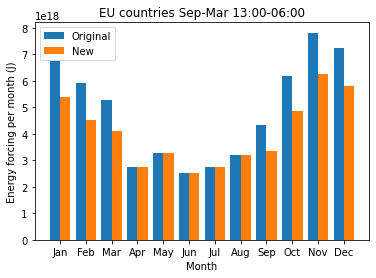

In [1421]:
mixed8monthly = mixed8.copy()
mixed8monthly = mixed8monthly.set_index(mixed8monthly['first_waypoint_time'].values)
mixed8monthly = mixed8monthly.resample('M').sum()
monthnum = np.arange(len(months))

plt.title("EU countries Sep-Mar 13:00-06:00")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, mixed8monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1415]:
(jetamonthly['total_contrail_energy_forcing'].sum()-mixed8monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

15.880480140397538

15.88% EF Reduction

#### 9. European winter 13:00-06:00

In [1486]:
mixed9 = pd.DataFrame()
mixed9countries = eucountries

for a in mixed7countries:
    df = alljeta[alljeta['destination_country'] == a]
    mixed9 = pd.concat([mixed9,df])

mixed9month = [1,2,3,9,10,11,12]
mixed9hours1 = np.arange(0,6)
mixed9hours2 = np.arange(13,24)
mixed9hours = np.hstack((mixed9hours1,mixed9hours2))
mixed9flights = pd.DataFrame()

for i in mixed9month:
    dfm = mixed9[mixed9['first_waypoint_time'].dt.month == i]
    for j in mixed9hours:
        dfh = dfm[dfm['first_waypoint_time'].dt.hour == j]
        mixed9flights = pd.concat([mixed9flights,dfh])

mixed9flights['total_fuel_burn'].sum()

2497875145.0218196

In [1483]:
mixed9ind = mixed9flights.sort_index().index
replace = allsaf50.loc[mixed9ind,:]
mixed9 = alljeta.drop(index = mixed9ind)
mixed9 = pd.concat([mixed9,replace]).sort_index()
mixed9

,aircraft_type_icao,aircraft_engine_type,origin_airport,origin_airport_name,origin_country,destination_country,first_waypoint_time,flight_duration_h,total_flight_distance_km,load_factor,total_fuel_burn,engine_name,mean_aircraft_mass,mean_nvpm_ei_n,total_contrail_energy_forcing,EF/fuel
0,B772,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:01:31.000,7.21,6339.88,0.824638,48428.682093,Trent 892,215515.305705,2.452942e+14,0.000000e+00,NaN
1,B744,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:03:53.000,9.45,8458.73,0.824638,81476.857435,CF6-80C2B1F,283658.699389,5.120932e+14,0.000000e+00,NaN
2,B77W,Jet,EGLL,London Heathrow Airport,GB,US,2019-01-01 00:26:51.000,8.64,7623.37,0.824638,58363.781882,GE90-115B,262594.172313,1.549884e+14,0.000000e+00,NaN
3,B789,Jet,EGKK,London Gatwick Airport,GB,SG,2019-01-01 00:10:50.830,12.30,11307.92,0.824638,70392.013002,Trent 1000-J3,212688.545999,3.917605e+14,1.650239e+14,2.344355e+09
4,A359,Jet,EGLL,London Heathrow Airport,GB,KR,2019-01-01 01:15:54.000,10.03,8857.46,0.824638,61947.414538,Trent XWB-84,224787.094430,2.325863e+14,-6.209031e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068373,B738,Jet,EGGD,Bristol Airport,GB,GB,2019-12-31 23:29:49.434,0.43,226.60,0.842934,1245.993677,CFM56-7B27E,64249.277050,5.557713e+14,0.000000e+00,0.000000e+00
1068374,E190,Jet,EGLL,London Heathrow Airport,GB,NL,2019-12-31 23:01:15.478,0.64,407.50,0.842934,1059.751644,CF34-10E6,41916.718549,9.788776e+14,0.000000e+00,0.000000e+00
1068375,B738,Jet,EGSS,London Stansted Airport,GB,TR,2019-12-31 23:44:56.823,3.23,2596.43,0.842934,1234.174174,CFM56-7B26E,68259.483833,9.104289e+14,0.000000e+00,NaN
1068376,E190,Jet,EGKK,London Gatwick Airport,GB,UA,2019-12-31 23:01:39.430,2.82,2187.07,0.842934,2099.158746,CF34-10E6,43214.601777,1.413405e+14,0.000000e+00,NaN


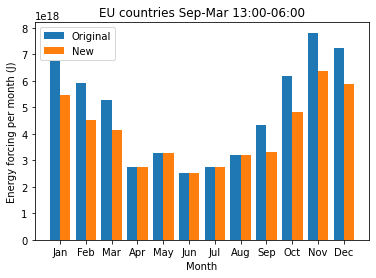

In [1484]:
mixed9monthly = mixed9.copy()
mixed9monthly = mixed9monthly.set_index(mixed9monthly['first_waypoint_time'].values)
mixed9monthly = mixed9monthly.resample('M').sum()
monthnum = np.arange(len(months))

plt.title("EU countries Sep-Mar 13:00-06:00")
plt.xlabel("Month")
plt.ylabel("Energy forcing per month (J)")
plt.xticks(monthnum, months)
plt.bar(monthnum - 0.2, jetamonthly['total_contrail_energy_forcing'],0.4)
plt.bar(monthnum + 0.2, mixed9monthly['total_contrail_energy_forcing'],0.4)
plt.legend(['Original','New'])

In [1485]:
(jetamonthly['total_contrail_energy_forcing'].sum()-mixed9monthly['total_contrail_energy_forcing'].sum())/jetamonthly['total_contrail_energy_forcing'].sum()*100

15.463393885189145